<a href="https://colab.research.google.com/github/NathanielRose/eeg-294/blob/master/Project_Report_SH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [2]:
!pip install git+git://github.com/gumpy-bci/gumpy.git

  Cloning git://github.com/gumpy-bci/gumpy.git to /tmp/pip-req-build-9d42h5g0
  Running command git clone -q git://github.com/gumpy-bci/gumpy.git /tmp/pip-req-build-9d42h5g0
  Created wheel for gumpy: filename=gumpy-0.5.0-cp36-none-any.whl size=32999 sha256=a6561d5580112c5bfe539195fc7a87175ce93d6a3202607a3849c3f69aa5edc0
  Stored in directory: /tmp/pip-ephem-wheel-cache-2b3v2lu7/wheels/cf/ee/4d/dfa04a0d04ffb1ca36f436f3fef4817e9e23bfec03dd772913
Successfully built gumpy


In [3]:
!git clone https://github.com/NathanielRose/eeg-294.git

Cloning into 'eeg-294'...
remote: Enumerating objects: 215, done.
remote: Counting objects: 100% (215/215), done.
remote: Compressing objects: 100% (194/194), done.
remote: Total 215 (delta 91), reused 89 (delta 13), pack-reused 0
Receiving objects: 100% (215/215), 5.48 MiB | 5.88 MiB/s, done.
Resolving deltas: 100% (91/91), done.


In [4]:
##Import packages##

%reset
%matplotlib inline

from __future__ import print_function
import os; os.environ["THEANO_FLAGS"] = "device=gpu0"
import os.path
from datetime import datetime
import sys

import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [5]:
##import gumpy modules##
sys.path.append('gumpy/gumpy/')
import gumpy

# sys.path.append('eeg-294/gumpy-deeplearning')
# import models

sys.path.append('eeg-294/gumpy-deeplearning/models/')
import utils

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
Using TensorFlow backend.


In [0]:
##Setup parameters##
DEBUG = True
CLASS_COUNT = 2
DROPOUT = 0.2   # dropout rate in float

# parameters for filtering data
FS = 250
LOWCUT = 2
HIGHCUT = 60
ANTI_DRIFT = 0.5
CUTOFF = 50.0 # freq to be removed from signal (Hz) for notch filter
Q = 30.0  # quality factor for notch filter 
W0 = CUTOFF/(FS/2)
AXIS = 0

#set random seed
SEED = 42
KFOLD = 5

# Get Data

In [7]:
%%bash
%%capture 

export fileid=1DS64UOrt9wzswke5wiFtat94-s1YcRmb
export filename=grazdata.zip


wget --save-cookies cookies.txt 'https://docs.google.com/uc?export=download&id='$fileid -O- \
     | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1/p' > confirm.txt

wget --load-cookies cookies.txt -O $filename \
     'https://docs.google.com/uc?export=download&id='$fileid'&confirm='$(<confirm.txt)

bash: line 1: fg: no job control
--2019-12-23 12:51:27--  https://docs.google.com/uc?export=download&id=1DS64UOrt9wzswke5wiFtat94-s1YcRmb
Resolving docs.google.com (docs.google.com)... 172.217.203.139, 172.217.203.138, 172.217.203.100, ...
Connecting to docs.google.com (docs.google.com)|172.217.203.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

     0K ...                                                    20.5M=0s

2019-12-23 12:51:27 (20.5 MB/s) - written to stdout [3247]

--2019-12-23 12:51:27--  https://docs.google.com/uc?export=download&id=1DS64UOrt9wzswke5wiFtat94-s1YcRmb&confirm=p5la
Resolving docs.google.com (docs.google.com)... 173.194.217.138, 173.194.217.102, 173.194.217.101, ...
Connecting to docs.google.com (docs.google.com)|173.194.217.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-94-docs.googleusercontent.com/docs/securesc/ha0ro937gc

In [8]:
!unzip grazdata.zip

Archive:  grazdata.zip
mapname:  conversion of  failed
 extracting: B03T.mat                
 extracting: B05E.mat                
 extracting: B04T.mat                
 extracting: B01E.mat                
 extracting: B04E.mat                
 extracting: B06T.mat                
 extracting: B08T.mat                
 extracting: B07T.mat                
 extracting: B02T.mat                
 extracting: B03E.mat                
 extracting: B09T.mat                
 extracting: B05T.mat                
 extracting: B09E.mat                
 extracting: B01T.mat                
 extracting: B06E.mat                
 extracting: B07E.mat                
 extracting: B08E.mat                
 extracting: B02E.mat                


In [9]:
!unzip grazdata

Archive:  grazdata.zip
mapname:  conversion of  failed
replace B03T.mat? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: B03T.mat                
 extracting: B05E.mat                
 extracting: B04T.mat                
 extracting: B01E.mat                
 extracting: B04E.mat                
 extracting: B06T.mat                
 extracting: B08T.mat                
 extracting: B07T.mat                
 extracting: B02T.mat                
 extracting: B03E.mat                
 extracting: B09T.mat                
 extracting: B05T.mat                
 extracting: B09E.mat                
 extracting: B01T.mat                
 extracting: B06E.mat                
 extracting: B07E.mat                
 extracting: B08E.mat                
 extracting: B02E.mat                


In [10]:
#load data
subj = 'B01'

grazb_data = gumpy.data.GrazB('', subj)
grazb_data.load()


In [11]:
grazb_data.print_stats()

Data identification: GrazB-B01
EEG-data shape: (1626266, 3)
Trials data shape:  (324,)
Labels shape:  (324,)
Total length of single trial:  8
Sampling frequency of EEG data: 250
Interval for motor imagery in trial:  [4, 7]
Classes possible:  [0 1]


# Functions

In [0]:
#train data follos format [x, y].  Same with val_data
def run_model(model, model_name, epochs, train_data, val_split, batch_size, monitor_index):
    # save best weights
    if os.path.isdir('logs'):
      log_dir="logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    else:
      os.mkdir('logs')
      log_dir="logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    
    if not os.path.isdir('checkpoints'):
      os.mkdir('checkpoints')
    checkpointer = ModelCheckpoint('checkpoints/' + '%s.h5'%model_name, monitor=monitor_index, verbose=1,save_best_only=True, mode='auto', period=1)
    

    # stop if the model does not improve for 15 epoches
    stoppointer = EarlyStopping(monitor=monitor_index, min_delta=0, patience=15, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

    # run model
    history = model.fit(train_data[0], train_data[1], epochs=epochs,
                   shuffle=True,
                   batch_size=batch_size, validation_split = val_split,
                   callbacks=[checkpointer, stoppointer], verbose=2)
    return history


#saves model to json file saves model weights to h5 file
def save_model(model, model_name, working_dir):

    model_json = model.to_json()
    if os.path.isdir('models'):
      # save model to json
      with open(working_dir + 'models/' + "%s.json"%model_name, "w") as json_file:
        json_file.write(model_json)
    else:
      os.mkdir('models')
      with open(working_dir + 'models/' + "%s.json"%model_name, "w") as json_file:
        json_file.write(model_json)

    #save model weights
    model.save_weights(working_dir +'models/' + '%s_weights.h5'%model_name)

# draw the training curves
def draw_graphs(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0,max(plt.ylim())])
    plt.title('Training and Validation Loss')
    plt.show()

# sCNN

## og sCNN

In [0]:
import keras
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Conv2D, Dropout, BatchNormalization, \
                         Reshape, Activation, Flatten, AveragePooling2D, Conv3D

In [14]:
# now that the dataset is setup, we can load the data. This will be handled from within the utils function, 
# which will first load the data and subsequently filter it using a notch and a bandpass filter.
# the utility function will then return the training data.
x_train, y_train = utils.load_preprocess_data(grazb_data, True, LOWCUT, HIGHCUT, W0, Q, ANTI_DRIFT, CLASS_COUNT, CUTOFF, AXIS, FS)

Band-pass filtering the data in frequency range from 2.0 Hz to 60.0 Hz... 
Data loaded and processed successfully!


In [0]:
#Augment Data
x_augmented, y_augmented = gumpy.signal.sliding_window(data = x_train[:,:,:],
                                                          labels = y_train[:,:],
                                                          window_sz = 4 * FS,
                                                          n_hop = FS // 10,
                                                          n_start = FS * 1)
x_subject = x_augmented
y_subject = y_augmented
x_subject = np.rollaxis(x_subject, 2, 1)
x_subject = np.rollaxis(x_subject, 1)
x_subject = np.rollaxis(x_subject, 2, 1)



In [16]:
x_subject = x_augmented
y_subject = y_augmented
x_subject = np.rollaxis(x_subject, 2, 1)
# x_subject = np.rollaxis(x_subject, 1)
# x_subject = np.rollaxis(x_subject, 2, 1)
x_subject.shape

(10044, 3, 1000)

In [31]:
x_subject = np.expand_dims(x_subject, axis =3)
x_subject.shape

(10044, 3, 1000, 1)

In [0]:
###MODEL###

model = Sequential()
# Conv Block 1
model.add(Conv2D(input_shape=(3, 1000, 1), filters=40, kernel_size=(1, 25), strides=(1, 1),
                padding='valid', activation=None))
model.add(Reshape(target_shape=(3, 976, 40, 1)))
# model.add(Dropout(0.5))

# Conv Block 2
model.add(Conv3D(filters=40, kernel_size=(3, 1, 40), padding='valid',
                data_format='channels_last'))
model.add(BatchNormalization())
model.add(Activation(keras.backend.square))  # custom squaring activation function
model.add(Flatten())
model.add(Reshape(target_shape=(976, 40, 1)))
# model.add(Dropout(0.5))
# Pooling
model.add(AveragePooling2D(pool_size=(75, 1), strides=(15, 1), data_format='channels_last'))
model.add(Activation(keras.backend.log))  # custom log function

# Classification
model.add(Flatten())
model.add(Dense(2))
model.add(Activation('softmax'))

  # compile the model
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 3, 976, 40)        1040      
_________________________________________________________________
reshape_12 (Reshape)         (None, 3, 976, 40, 1)     0         
_________________________________________________________________
conv3d_6 (Conv3D)            (None, 1, 976, 1, 40)     4840      
_________________________________________________________________
batch_normalization_6 (Batch (None, 1, 976, 1, 40)     160       
_________________________________________________________________
activation_12 (Activation)   (None, 1, 976, 1, 40)     0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 39040)             0         
_________________________________________________________________
reshape_13 (Reshape)         (None, 976, 40, 1)       

Run 1...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 47s - loss: 0.2155 - acc: 0.9163 - val_loss: 1.2668 - val_acc: 0.5249

Epoch 00001: val_loss improved from inf to 1.26677, saving model to checkpoints/GRAZ_sCNN__run_1.h5
Epoch 2/100
 - 47s - loss: 0.2098 - acc: 0.9161 - val_loss: 1.0650 - val_acc: 0.5808

Epoch 00002: val_loss improved from 1.26677 to 1.06497, saving model to checkpoints/GRAZ_sCNN__run_1.h5
Epoch 3/100
 - 47s - loss: 0.1934 - acc: 0.9220 - val_loss: 0.7508 - val_acc: 0.7052

Epoch 00003: val_loss improved from 1.06497 to 0.75080, saving model to checkpoints/GRAZ_sCNN__run_1.h5
Epoch 4/100
 - 47s - loss: 0.1834 - acc: 0.9282 - val_loss: 1.2760 - val_acc: 0.5137

Epoch 00004: val_loss did not improve from 0.75080
Epoch 5/100
 - 46s - loss: 0.1665 - acc: 0.9394 - val_loss: 0.6120 - val_acc: 0.7724

Epoch 00005: val_loss improved from 0.75080 to 0.61198, saving model to checkpoints/GRAZ_sCNN__run_1.h5
Epoch 6/100
 - 46s - loss: 0.1834 - acc: 0.9256 - v

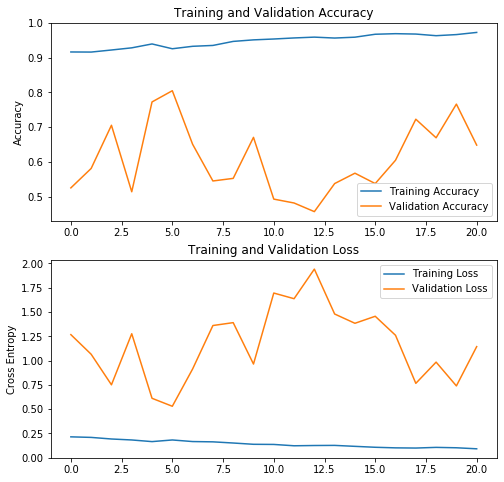

Training Acc:  [0.9163324575077332, 0.9160558705820514, 0.9220024893234716, 0.9282256949658447, 0.9394274651386022, 0.9255981192254473, 0.9326510856448657, 0.9351403679183007, 0.9467570184177588, 0.9511824090967796, 0.953671691345486, 0.9567141474620416, 0.9590651362520286, 0.9564375605363599, 0.9589268427685804, 0.9673627437669498, 0.9690222652633397, 0.9679159175853416, 0.9632139400136106, 0.966394689547671, 0.9726178951982871]



Evaluating model on test set...
Result on test set: 89.70%
Run 2...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 47s - loss: 0.1812 - acc: 0.9267 - val_loss: 0.0782 - val_acc: 0.9751

Epoch 00001: val_loss improved from inf to 0.07824, saving model to checkpoints/GRAZ_sCNN__run_2.h5
Epoch 2/100
 - 47s - loss: 0.1702 - acc: 0.9368 - val_loss: 0.2149 - val_acc: 0.9353

Epoch 00002: val_loss did not improve from 0.07824
Epoch 3/100
 - 47s - loss: 0.1521 - acc: 0.9412 - val_loss: 0.9075 - val_acc: 0.6878

Epoch 00003: val_loss did not improve f

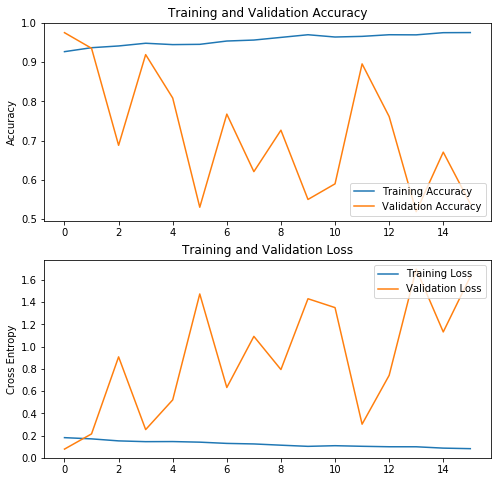

Training Acc:  [0.9267044669364172, 0.9367998894146906, 0.9412252800772256, 0.9481399530131958, 0.944682616512239, 0.9453740838388077, 0.9538099848289342, 0.9562992670529117, 0.9630756465631342, 0.9698520260238991, 0.964043700765927, 0.9657032222870457, 0.9698520259991702, 0.9695754390899743, 0.9751071774387504, 0.975383764389161]



Evaluating model on test set...
Result on test set: 71.13%
Run 3...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 47s - loss: 0.1764 - acc: 0.9317 - val_loss: 0.1449 - val_acc: 0.9353

Epoch 00001: val_loss improved from inf to 0.14491, saving model to checkpoints/GRAZ_sCNN__run_3.h5
Epoch 2/100
 - 47s - loss: 0.1529 - acc: 0.9432 - val_loss: 0.1975 - val_acc: 0.9291

Epoch 00002: val_loss did not improve from 0.14491
Epoch 3/100
 - 47s - loss: 0.1530 - acc: 0.9466 - val_loss: 0.1945 - val_acc: 0.9316

Epoch 00003: val_loss did not improve from 0.14491
Epoch 4/100
 - 47s - loss: 0.1395 - acc: 0.9487 - val_loss: 0.5559 - val_acc: 0.7998

Epo

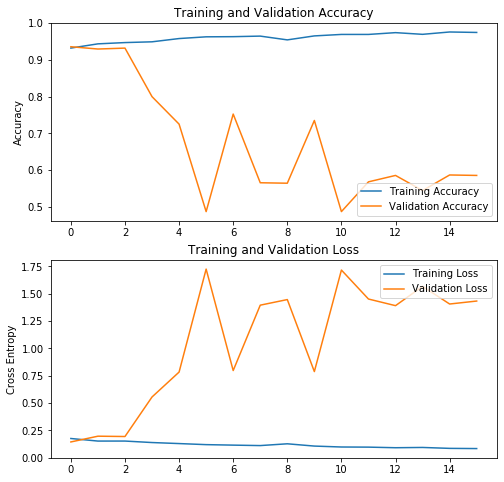

Training Acc:  [0.9316830314255868, 0.943161388532269, 0.9466187249755252, 0.9486931268398304, 0.9575439082143581, 0.9622458857696031, 0.9626607661704901, 0.9641819942328894, 0.9539482783041394, 0.9647351680347953, 0.9687456783459009, 0.9687456783541438, 0.973585949392837, 0.9690222652550967, 0.9753837643561892, 0.9741391232606864]



Evaluating model on test set...
Result on test set: 78.00%
Run 4...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 47s - loss: 0.1607 - acc: 0.9376 - val_loss: 0.0756 - val_acc: 0.9701

Epoch 00001: val_loss improved from inf to 0.07556, saving model to checkpoints/GRAZ_sCNN__run_4.h5
Epoch 2/100
 - 46s - loss: 0.1430 - acc: 0.9483 - val_loss: 0.0840 - val_acc: 0.9639

Epoch 00002: val_loss did not improve from 0.07556
Epoch 3/100
 - 46s - loss: 0.1358 - acc: 0.9506 - val_loss: 0.2753 - val_acc: 0.9030

Epoch 00003: val_loss did not improve from 0.07556
Epoch 4/100
 - 47s - loss: 0.1427 - acc: 0.9436 - val_loss: 0.3310 - val_acc: 0.8893

Ep

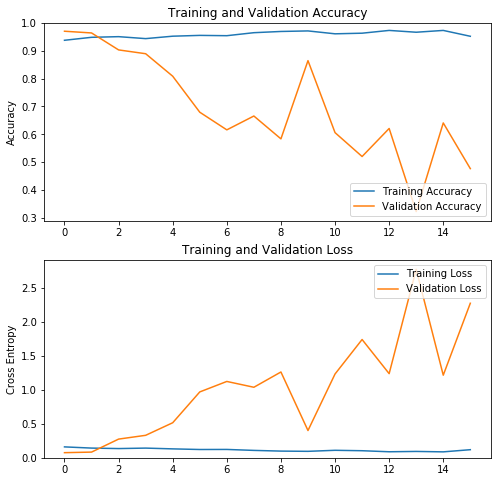

Training Acc:  [0.9376296501422783, 0.9482782464471864, 0.9506292353278455, 0.9435762688836984, 0.9522887567912637, 0.9551929193913994, 0.9540865717216442, 0.9648734615100005, 0.9692988521890215, 0.9712349606028501, 0.9608629512153808, 0.9630756465219195, 0.9730327755744453, 0.9665329829899045, 0.9730327756074171, 0.9520121698490961]



Evaluating model on test set...
Result on test set: 72.47%
Run 5...
Train on 7232 samples, validate on 804 samples
Epoch 1/100
 - 47s - loss: 0.1567 - acc: 0.9407 - val_loss: 0.0324 - val_acc: 0.9851

Epoch 00001: val_loss improved from inf to 0.03242, saving model to checkpoints/GRAZ_sCNN__run_5.h5
Epoch 2/100
 - 47s - loss: 0.1363 - acc: 0.9509 - val_loss: 0.2013 - val_acc: 0.9254

Epoch 00002: val_loss did not improve from 0.03242
Epoch 3/100
 - 46s - loss: 0.1292 - acc: 0.9567 - val_loss: 1.0561 - val_acc: 0.6667

Epoch 00003: val_loss did not improve from 0.03242
Epoch 4/100
 - 47s - loss: 0.1258 - acc: 0.9555 - val_loss: 0.6201 - val_acc: 0.7923



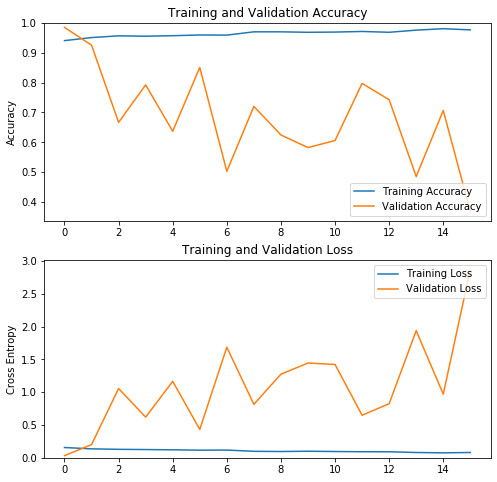

Training Acc:  [0.9406803097345132, 0.9509126106194691, 0.9567201327433629, 0.9554756637168141, 0.9571349557522124, 0.9596238938053098, 0.959070796460177, 0.9701327433628318, 0.9701327433628318, 0.9686117256637168, 0.9693030973451328, 0.9713772123893806, 0.9686117256637168, 0.9758019911504425, 0.980641592920354, 0.9766316371681416]



Evaluating model on test set...
Result on test set: 65.94%
75.45% (+/- 8.09%)
Saving CV values to file....
CV values successfully saved!



In [0]:
from sklearn.model_selection import StratifiedKFold
from models import LSTM
import datetime
from keras.callbacks import ModelCheckpoint,TensorBoard,EarlyStopping


# define KFOLD-fold cross validation test harness
kfold = StratifiedKFold(n_splits = KFOLD, shuffle = True, random_state = SEED)
cvscores = []
history = []
ii = 1
for train, test in kfold.split(x_subject, y_subject[:, 0]):
    print('Run ' + str(ii) + '...')
    # create callbacks
    model_name_str = 'GRAZ_sCNN_' + \
                     '_run_' + str(ii)

    # initialize and create the model
    
    # fit model. If you specify monitor=True, then the model will create callbacks
    # and write its state to a HDF5 file
    train_data =  [x_subject[train], y_subject[train]]
    monitor_index = 'val_loss'
    h = run_model(model, model_name_str,100, train_data, 0.1, 256, monitor_index)
    save_model(model, model_name_str, '')
    draw_graphs(h)
    history.append(h)

    history.append(h)
    print ('Training Acc: ', h.history['acc'])
    print ('\n\n')
    # evaluate the model
    print('Evaluating model on test set...')
    scores = model.evaluate(x_subject[test], y_subject[test], verbose = 0)
    print("Result on test set: %.2f%%" % ( scores[1] * 100))
    cvscores.append(scores[1] * 100)
    ii += 1
    
try:
  # print some evaluation statistics and write results to file
  print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
  cv_all_subjects = np.asarray(cvscores)
  print('Saving CV values to file....')
  np.savetxt('GRAZ_CV_' + 'LSTM_' + str(DROPOUT) + 'do'+'.csv', 
              cv_all_subjects, delimiter = ',', fmt = '%2.4f')
  print('CV values successfully saved!\n')
except:
  print ('could not save')

In [0]:
train_acc = [0.9766316371681416, 0.9520121698490961,  0.9741391232606864, 0.975383764389161,  0.9726178951982871]

In [0]:
cap_df = pd.DataFrame(columns = ['Capacity (bits)', 'CV Train Acc', 'CV Test Acc'])
cap_df.loc['original sCNN', 'CV Test Acc'] = np.mean(cvscores)
cap_df.loc['original sCNN', 'Capacity (bits)'] = 8360
cap_df.loc['original sCNN', 'CV Train Acc'] = np.mean(train_acc)*100


In [0]:
cap_df

Capacity (bits) CV Train Acc CV Test Acc
original sCNN            8360      97.0157     75.4471

## our sCNN 32220

In [0]:
###MODEL###

model = Sequential()
# Conv Block 1
model.add(Conv2D(input_shape=(3, 1000, 1), filters=90, kernel_size=(1, 25), strides=(1, 1),
                padding='valid', activation=None))
model.add(Reshape(target_shape=(3, 976, 90, 1)))
# model.add(Dropout(0.5))

# Conv Block 2
model.add(Conv3D(filters=90, kernel_size=(3, 1, 90), padding='valid',
                data_format='channels_last'))
model.add(BatchNormalization())
model.add(Activation(keras.backend.square))  # custom squaring activation function
model.add(Flatten())
model.add(Reshape(target_shape=(976, 90, 1)))
# model.add(Dropout(0.5))
# Pooling
model.add(AveragePooling2D(pool_size=(75, 1), strides=(15, 1), data_format='channels_last'))
model.add(Activation(keras.backend.log))  # custom log function

# Classification
model.add(Flatten())
model.add(Dense(2))
model.add(Activation('softmax'))

  # compile the model
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 3, 976, 90)        2340      
_________________________________________________________________
reshape_16 (Reshape)         (None, 3, 976, 90, 1)     0         
_________________________________________________________________
conv3d_8 (Conv3D)            (None, 1, 976, 1, 90)     24390     
_________________________________________________________________
batch_normalization_8 (Batch (None, 1, 976, 1, 90)     360       
_________________________________________________________________
activation_18 (Activation)   (None, 1, 976, 1, 90)     0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 87840)             0         
_________________________________________________________________
reshape_17 (Reshape)         (None, 976, 90, 1)       

Run 1...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 111s - loss: 0.6630 - acc: 0.6865 - val_loss: 0.9037 - val_acc: 0.4838

Epoch 00001: val_loss improved from inf to 0.90372, saving model to checkpoints/GRAZ_sCNN__run_1.h5
Epoch 2/100
 - 109s - loss: 0.3978 - acc: 0.8169 - val_loss: 1.3124 - val_acc: 0.3308

Epoch 00002: val_loss did not improve from 0.90372
Epoch 3/100
 - 109s - loss: 0.3539 - acc: 0.8418 - val_loss: 1.0952 - val_acc: 0.4739

Epoch 00003: val_loss did not improve from 0.90372
Epoch 4/100
 - 110s - loss: 0.3032 - acc: 0.8689 - val_loss: 1.2525 - val_acc: 0.4391

Epoch 00004: val_loss did not improve from 0.90372
Epoch 5/100
 - 109s - loss: 0.2679 - acc: 0.8896 - val_loss: 0.9871 - val_acc: 0.5510

Epoch 00005: val_loss did not improve from 0.90372
Epoch 6/100
 - 109s - loss: 0.2486 - acc: 0.8930 - val_loss: 0.5614 - val_acc: 0.7662

Epoch 00006: val_loss improved from 0.90372 to 0.56140, saving model to checkpoints/GRAZ_sCNN__run_1.h5
Epoch 7/100
 -

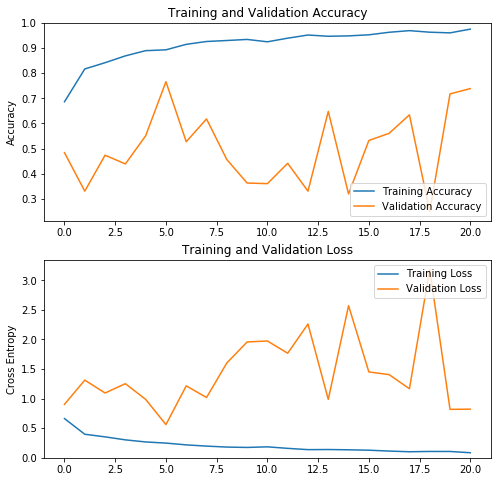

Training Acc:  [0.6864887292232442, 0.8168994607379403, 0.8417922833156757, 0.8688978012081927, 0.8896418199748884, 0.8929608630336118, 0.9148112295030344, 0.9261512930768108, 0.9300235099291969, 0.9343106071659844, 0.9249066519565791, 0.9392891716469111, 0.9518738764151055, 0.9468953118764782, 0.9484165399306346, 0.9527036371591789, 0.9627990596209666, 0.9692988522219932, 0.9630756465878629, 0.9604480708144938, 0.9752454708974698]



Evaluating model on test set...
Result on test set: 87.71%
Run 2...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 110s - loss: 0.2473 - acc: 0.8971 - val_loss: 0.0278 - val_acc: 0.9888

Epoch 00001: val_loss improved from inf to 0.02778, saving model to checkpoints/GRAZ_sCNN__run_2.h5
Epoch 2/100
 - 110s - loss: 0.2181 - acc: 0.9133 - val_loss: 0.0010 - val_acc: 1.0000

Epoch 00002: val_loss improved from 0.02778 to 0.00101, saving model to checkpoints/GRAZ_sCNN__run_2.h5
Epoch 3/100
 - 110s - loss: 0.2017 - acc: 0.9198 - val_loss: 0.0835 

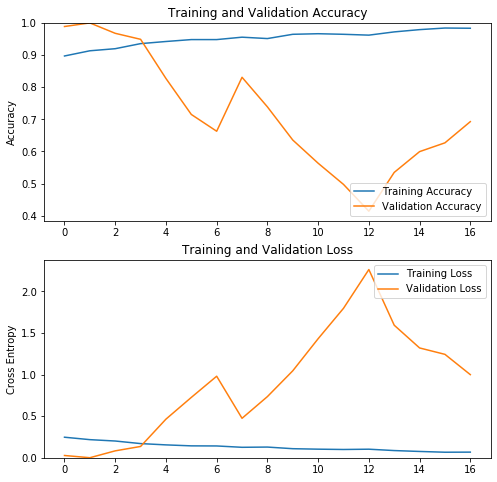

Training Acc:  [0.897109666762222, 0.9132900014159063, 0.9197897939839612, 0.9355552482532443, 0.9421933342717755, 0.948139952988467, 0.9481399530049528, 0.9556077997758006, 0.951320702571985, 0.9645968745760759, 0.966394689547671, 0.9645968746090476, 0.9619692988686501, 0.9720647213386807, 0.979117687758099, 0.9840962522555117, 0.9834047849619146]



Evaluating model on test set...
Result on test set: 55.80%
Run 3...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 111s - loss: 0.2038 - acc: 0.9191 - val_loss: 0.0190 - val_acc: 0.9950

Epoch 00001: val_loss improved from inf to 0.01905, saving model to checkpoints/GRAZ_sCNN__run_3.h5
Epoch 2/100
 - 110s - loss: 0.1784 - acc: 0.9335 - val_loss: 0.0687 - val_acc: 0.9751

Epoch 00002: val_loss did not improve from 0.01905
Epoch 3/100
 - 111s - loss: 0.1641 - acc: 0.9382 - val_loss: 0.2978 - val_acc: 0.8856

Epoch 00003: val_loss did not improve from 0.01905
Epoch 4/100
 - 110s - loss: 0.1591 - acc: 0.9382 - val_loss: 0.5228 

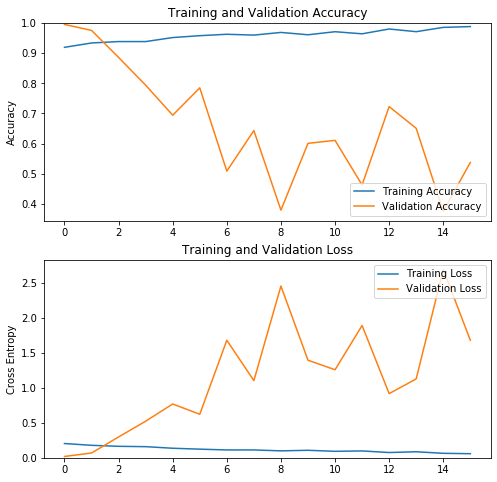

Training Acc:  [0.9190983266986071, 0.9334808464136679, 0.9381828240018847, 0.9381828239771558, 0.9514589960059756, 0.9576822016565916, 0.9623841792365654, 0.9596183100621773, 0.9684690914779197, 0.9607246577484184, 0.9708200802514207, 0.9639054073072076, 0.9798091550434531, 0.9709583736771684, 0.985202599917024, 0.9878301756326926]



Evaluating model on test set...
Result on test set: 62.57%
Run 4...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 110s - loss: 0.1887 - acc: 0.9285 - val_loss: 0.0214 - val_acc: 0.9913

Epoch 00001: val_loss improved from inf to 0.02138, saving model to checkpoints/GRAZ_sCNN__run_4.h5
Epoch 2/100
 - 110s - loss: 0.1638 - acc: 0.9367 - val_loss: 0.0841 - val_acc: 0.9652

Epoch 00002: val_loss did not improve from 0.02138
Epoch 3/100
 - 110s - loss: 0.1531 - acc: 0.9412 - val_loss: 0.3559 - val_acc: 0.8706

Epoch 00003: val_loss did not improve from 0.02138
Epoch 4/100
 - 110s - loss: 0.1338 - acc: 0.9520 - val_loss: 0.2180 - val_acc: 0.929

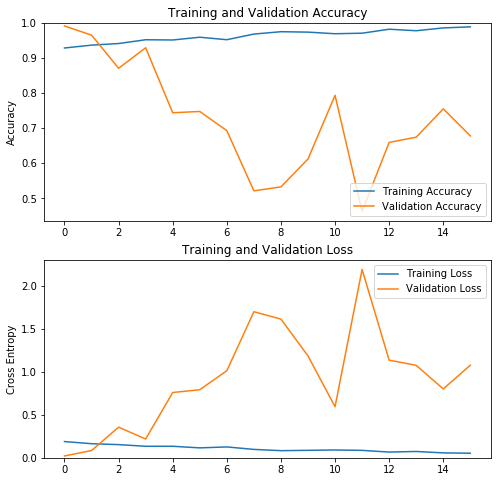

Training Acc:  [0.9285022818997694, 0.9366615959312424, 0.9412252800689827, 0.952012169857339, 0.951320702563742, 0.9592034296942621, 0.9521504633160585, 0.9681925045192662, 0.9749688839965169, 0.9737242428597994, 0.969160558738545, 0.9706817867597296, 0.9820218504159353, 0.9777347531461762, 0.9857557737683874, 0.9887982298437283]



Evaluating model on test set...
Result on test set: 61.27%
Run 5...
Train on 7232 samples, validate on 804 samples
Epoch 1/100
 - 110s - loss: 0.1747 - acc: 0.9313 - val_loss: 9.0142e-04 - val_acc: 1.0000

Epoch 00001: val_loss improved from inf to 0.00090, saving model to checkpoints/GRAZ_sCNN__run_5.h5
Epoch 2/100
 - 111s - loss: 0.1890 - acc: 0.9209 - val_loss: 0.2398 - val_acc: 0.9017

Epoch 00002: val_loss did not improve from 0.00090
Epoch 3/100
 - 110s - loss: 0.1619 - acc: 0.9339 - val_loss: 0.6871 - val_acc: 0.7687

Epoch 00003: val_loss did not improve from 0.00090
Epoch 4/100
 - 110s - loss: 0.1395 - acc: 0.9469 - val_loss: 1.1565 - val_acc: 0.6

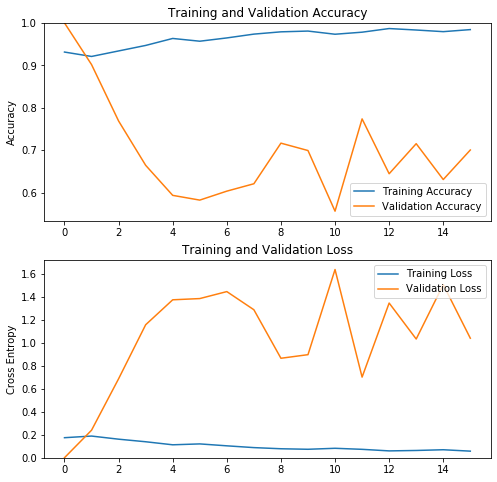

Training Acc:  [0.9312776548672567, 0.9209070796460177, 0.9339048672566371, 0.9469026548672567, 0.9633573008849557, 0.956858407079646, 0.9646017699115044, 0.9735896017699115, 0.9789823008849557, 0.9807798672566371, 0.9733130530973452, 0.9781526548672567, 0.9867256637168141, 0.9832688053097345, 0.9793971238938053, 0.9842367256637168]



Evaluating model on test set...
Result on test set: 57.72%
65.01% (+/- 11.60%)
Saving CV values to file....
CV values successfully saved!



In [43]:
from sklearn.model_selection import StratifiedKFold
import datetime
from keras.callbacks import ModelCheckpoint,TensorBoard,EarlyStopping


# define KFOLD-fold cross validation test harness
kfold = StratifiedKFold(n_splits = KFOLD, shuffle = True, random_state = SEED)
cvscores = []
history = []
ii = 1
for train, test in kfold.split(x_subject, y_subject[:, 0]):
    print('Run ' + str(ii) + '...')
    # create callbacks
    model_name_str = 'GRAZ_sCNN_' + \
                     '_run_' + str(ii)

    # initialize and create the model
    
    # fit model. If you specify monitor=True, then the model will create callbacks
    # and write its state to a HDF5 file
    train_data =  [x_subject[train], y_subject[train]]
    monitor_index = 'val_loss'
    h = run_model(model, model_name_str,100, train_data, 0.1, 256, monitor_index)
    save_model(model, model_name_str, '')
    draw_graphs(h)
    history.append(h)

    history.append(h)
    print ('Training Acc: ', h.history['acc'])
    print ('\n\n')
    # evaluate the model
    print('Evaluating model on test set...')
    scores = model.evaluate(x_subject[test], y_subject[test], verbose = 0)
    print("Result on test set: %.2f%%" % ( scores[1] * 100))
    cvscores.append(scores[1] * 100)
    ii += 1
    
try:
  # print some evaluation statistics and write results to file
  print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
  cv_all_subjects = np.asarray(cvscores)
  print('Saving CV values to file....')
  np.savetxt('GRAZ_CV_' + 'LSTM_' + str(DROPOUT) + 'do'+'.csv', 
              cv_all_subjects, delimiter = ',', fmt = '%2.4f')
  print('CV values successfully saved!\n')
except:
  print ('could not save')

In [45]:
train_acc= [0.9842367256637168, 0.9887982298437283, 0.9878301756326926,  0.9834047849619146, 0.9752454708974698]
print ('testscores: ', np.mean(cvscores))
print('trainscores: ', np.mean(train_acc)*100)

testscores:  65.01321244977012
trainscores:  98.39030773999046


## our sCNN 16080 bits

In [0]:
###MODEL###

model = Sequential()
# Conv Block 1
model.add(Conv2D(input_shape=(3, 1000, 1), filters=60, kernel_size=(1, 25), strides=(1, 1),
                padding='valid', activation=None))
model.add(Reshape(target_shape=(3, 976, 60, 1)))
# model.add(Dropout(0.5))

# Conv Block 2
model.add(Conv3D(filters=60, kernel_size=(3, 1, 60), padding='valid',
                data_format='channels_last'))
model.add(BatchNormalization())
model.add(Activation(keras.backend.square))  # custom squaring activation function
model.add(Flatten())
model.add(Reshape(target_shape=(976, 60, 1)))
# model.add(Dropout(0.5))
# Pooling
model.add(AveragePooling2D(pool_size=(75, 1), strides=(15, 1), data_format='channels_last'))
model.add(Activation(keras.backend.log))  # custom log function

# Classification
model.add(Flatten())
model.add(Dense(2))
model.add(Activation('softmax'))

  # compile the model
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 3, 976, 60)        1560      
_________________________________________________________________
reshape_14 (Reshape)         (None, 3, 976, 60, 1)     0         
_________________________________________________________________
conv3d_7 (Conv3D)            (None, 1, 976, 1, 60)     10860     
_________________________________________________________________
batch_normalization_7 (Batch (None, 1, 976, 1, 60)     240       
_________________________________________________________________
activation_15 (Activation)   (None, 1, 976, 1, 60)     0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 58560)             0         
_________________________________________________________________
reshape_15 (Reshape)         (None, 976, 60, 1)       

Run 1...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 73s - loss: 0.1375 - acc: 0.9462 - val_loss: 0.2219 - val_acc: 0.9279

Epoch 00001: val_loss improved from inf to 0.22191, saving model to checkpoints/GRAZ_sCNN_run_1.h5
Epoch 2/100
 - 73s - loss: 0.1253 - acc: 0.9524 - val_loss: 0.3029 - val_acc: 0.8806

Epoch 00002: val_loss did not improve from 0.22191
Epoch 3/100
 - 73s - loss: 0.1152 - acc: 0.9580 - val_loss: 0.9398 - val_acc: 0.6841

Epoch 00003: val_loss did not improve from 0.22191
Epoch 4/100
 - 73s - loss: 0.1044 - acc: 0.9640 - val_loss: 1.0067 - val_acc: 0.6841

Epoch 00004: val_loss did not improve from 0.22191
Epoch 5/100
 - 73s - loss: 0.0955 - acc: 0.9678 - val_loss: 1.4738 - val_acc: 0.5485

Epoch 00005: val_loss did not improve from 0.22191
Epoch 6/100
 - 73s - loss: 0.0759 - acc: 0.9786 - val_loss: 0.6765 - val_acc: 0.7699

Epoch 00006: val_loss did not improve from 0.22191
Epoch 7/100
 - 73s - loss: 0.0709 - acc: 0.9831 - val_loss: 0.6831 - val_a

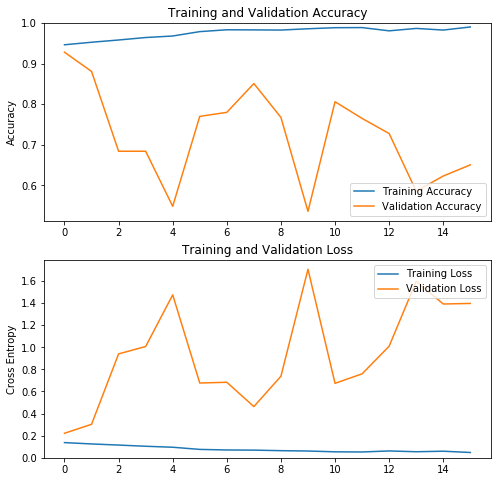

Training Acc:  [0.9462038445911242, 0.9524270502334973, 0.9579587885740304, 0.9640437008153847, 0.9677776241183792, 0.9785645139149785, 0.9831281980444758, 0.982851611127037, 0.9824367307426358, 0.985617480301425, 0.9882450560088508, 0.9885216429427754, 0.980500622345293, 0.9864472410619844, 0.9824367307508788, 0.990042870972203]



Evaluating model on test set...
Result on test set: 86.11%
Run 2...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 73s - loss: 0.1122 - acc: 0.9606 - val_loss: 0.1104 - val_acc: 0.9639

Epoch 00001: val_loss improved from inf to 0.11037, saving model to checkpoints/GRAZ_sCNN_run_2.h5
Epoch 2/100
 - 72s - loss: 0.1127 - acc: 0.9602 - val_loss: 0.2342 - val_acc: 0.9279

Epoch 00002: val_loss did not improve from 0.11037
Epoch 3/100
 - 73s - loss: 0.1078 - acc: 0.9625 - val_loss: 0.7908 - val_acc: 0.7438

Epoch 00003: val_loss did not improve from 0.11037
Epoch 4/100
 - 73s - loss: 0.0949 - acc: 0.9689 - val_loss: 0.2767 - val_acc: 0.9030

Epoch

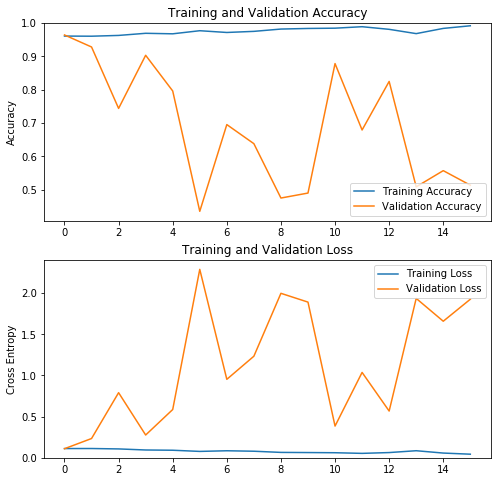

Training Acc:  [0.960586364289699, 0.9601714839217838, 0.9625224727282565, 0.9688839718128632, 0.967362743742221, 0.9766284055258786, 0.971373254127513, 0.9746922970708352, 0.9816069699985623, 0.9834047849701576, 0.9842345457142311, 0.9886599363932519, 0.9807772093039465, 0.9679159175935844, 0.983543078420634, 0.9914258055593971]



Evaluating model on test set...
Result on test set: 78.50%
Run 3...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 73s - loss: 0.1243 - acc: 0.9526 - val_loss: 0.0490 - val_acc: 0.9826

Epoch 00001: val_loss improved from inf to 0.04905, saving model to checkpoints/GRAZ_sCNN_run_3.h5
Epoch 2/100
 - 73s - loss: 0.1099 - acc: 0.9598 - val_loss: 0.5040 - val_acc: 0.8184

Epoch 00002: val_loss did not improve from 0.04905
Epoch 3/100
 - 73s - loss: 0.1079 - acc: 0.9604 - val_loss: 0.5828 - val_acc: 0.8147

Epoch 00003: val_loss did not improve from 0.04905
Epoch 4/100
 - 73s - loss: 0.0894 - acc: 0.9708 - val_loss: 1.2035 - val_acc: 0.6418

Epoch

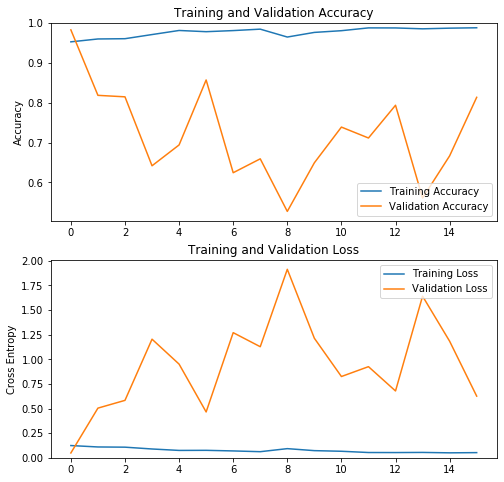

Training Acc:  [0.9525653436757308, 0.9597566035538685, 0.9604480708062508, 0.970820080218449, 0.9810537961636848, 0.978011340071858, 0.980777209238003, 0.9843728391811933, 0.9645968745843188, 0.9762135251249916, 0.9805006223205642, 0.9875535887152538, 0.9874152952565344, 0.9852025999252668, 0.9868621214463855, 0.9878301756409356]



Evaluating model on test set...
Result on test set: 71.88%
Run 4...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 73s - loss: 0.1108 - acc: 0.9610 - val_loss: 0.5158 - val_acc: 0.8458

Epoch 00001: val_loss improved from inf to 0.51578, saving model to checkpoints/GRAZ_sCNN_run_4.h5
Epoch 2/100
 - 73s - loss: 0.0923 - acc: 0.9681 - val_loss: 0.1491 - val_acc: 0.9403

Epoch 00002: val_loss improved from 0.51578 to 0.14909, saving model to checkpoints/GRAZ_sCNN_run_4.h5
Epoch 3/100
 - 73s - loss: 0.0806 - acc: 0.9772 - val_loss: 0.9091 - val_acc: 0.7040

Epoch 00003: val_loss did not improve from 0.14909
Epoch 4/100
 - 72s - loss: 0.0913 - ac

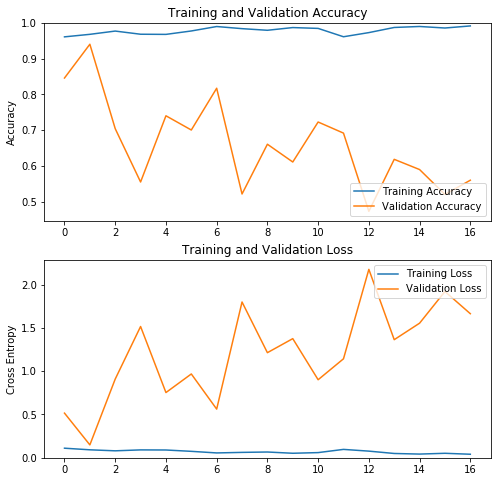

Training Acc:  [0.9610012446493714, 0.968054211044061, 0.9771815793360273, 0.9683307979697426, 0.9679159176018274, 0.9774581662287374, 0.9899045775134836, 0.9839579587967923, 0.9793942746590519, 0.9870004148968621, 0.9846494261316039, 0.9612778315668102, 0.9728944821157259, 0.9872770018225437, 0.9900428710134177, 0.9857557737601444, 0.9915640990263593]



Evaluating model on test set...
Result on test set: 82.48%
Run 5...
Train on 7232 samples, validate on 804 samples
Epoch 1/100
 - 73s - loss: 0.0813 - acc: 0.9747 - val_loss: 0.1083 - val_acc: 0.9552

Epoch 00001: val_loss improved from inf to 0.10828, saving model to checkpoints/GRAZ_sCNN_run_5.h5
Epoch 2/100
 - 73s - loss: 0.0855 - acc: 0.9728 - val_loss: 0.1170 - val_acc: 0.9552

Epoch 00002: val_loss did not improve from 0.10828
Epoch 3/100
 - 73s - loss: 0.0856 - acc: 0.9729 - val_loss: 0.8277 - val_acc: 0.7537

Epoch 00003: val_loss did not improve from 0.10828
Epoch 4/100
 - 73s - loss: 0.0931 - acc: 0.9653 - val_loss: 0.5660 -

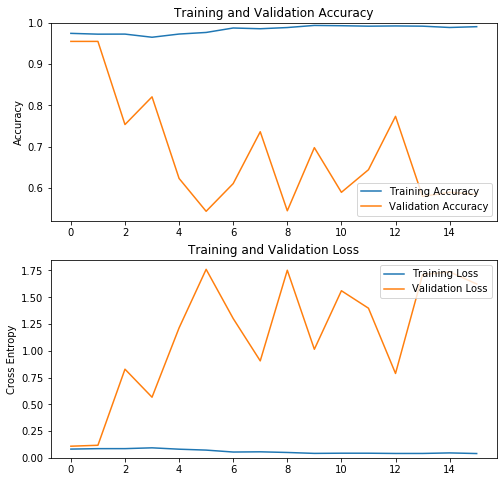

Training Acc:  [0.974695796460177, 0.9727599557522124, 0.9728982300884956, 0.9652931415929203, 0.9730365044247787, 0.9769081858407079, 0.9876935840707964, 0.9858960176991151, 0.988799778761062, 0.9939159292035398, 0.9932245575221239, 0.9921183628318584, 0.9926714601769911, 0.9921183628318584, 0.9889380530973452, 0.9908738938053098]



Evaluating model on test set...
Result on test set: 78.64%


In [37]:
from sklearn.model_selection import StratifiedKFold
import datetime
from keras.callbacks import ModelCheckpoint,TensorBoard,EarlyStopping


# define KFOLD-fold cross validation test harness
kfold = StratifiedKFold(n_splits = KFOLD, shuffle = True, random_state = SEED)
cvscores = []
history= []
ii = 1
for train, test in kfold.split(x_subject, y_subject[:, 0]):
    print('Run ' + str(ii) + '...')
    # create callbacks
    model_name_str = 'GRAZ_sCNN' + \
                     '_run_' + str(ii)

    # initialize and create the model
    
    # fit model. If you specify monitor=True, then the model will create callbacks
    # and write its state to a HDF5 file
    train_data =  [x_subject[train], y_subject[train]]
    monitor_index = 'val_loss'
    h = run_model(model, model_name_str,100, train_data, 0.1, 256, monitor_index)
    save_model(model, model_name_str, '')
    draw_graphs(h)
    history.append(h)

    history.append(h)
    print ('Training Acc: ', h.history['acc'])
    print ('\n\n')
    # evaluate the model
    print('Evaluating model on test set...')
    scores = model.evaluate(x_subject[test], y_subject[test], verbose = 0)
    print("Result on test set: %.2f%%" % ( scores[1] * 100))
    cvscores.append(scores[1] * 100)
    ii += 1
    

In [39]:
train_acc = [0.9908738938053098, 0.9915640990263593, 0.9878301756409356,  0.9914258055593971, 0.990042870972203]
print ('testscores: ', np.mean(cvscores))
print('trainscores: ', np.mean(train_acc)*100)

testscores:  79.52002344804676
trainscores:  99.0347369000841


## our sCNN 2960 bits

In [0]:
###MODEL###

model = Sequential()
# Conv Block 1
model.add(Conv2D(input_shape=(3, 1000, 1), filters=20, kernel_size=(1, 25), strides=(1, 1),
                padding='valid', activation=None))
model.add(Reshape(target_shape=(3, 976, 20, 1)))
# model.add(Dropout(0.5))

# Conv Block 2
model.add(Conv3D(filters=20, kernel_size=(3, 1, 20), padding='valid',
                data_format='channels_last'))
model.add(BatchNormalization())
model.add(Activation(keras.backend.square))  # custom squaring activation function
model.add(Flatten())
model.add(Reshape(target_shape=(976, 20, 1)))
# model.add(Dropout(0.5))
# Pooling
model.add(AveragePooling2D(pool_size=(75, 1), strides=(15, 1), data_format='channels_last'))
model.add(Activation(keras.backend.log))  # custom log function

# Classification
model.add(Flatten())
model.add(Dense(2))
model.add(Activation('softmax'))

  # compile the model
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 3, 976, 20)        520       
_________________________________________________________________
reshape_23 (Reshape)         (None, 3, 976, 20, 1)     0         
_________________________________________________________________
conv3d_14 (Conv3D)           (None, 1, 976, 1, 20)     1220      
_________________________________________________________________
batch_normalization_8 (Batch (None, 1, 976, 1, 20)     80        
_________________________________________________________________
activation_22 (Activation)   (None, 1, 976, 1, 20)     0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 19520)             0         
_________________________________________________________________
reshape_24 (Reshape)         (None, 976, 20, 1)      

Run 1...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 28s - loss: 0.5780 - acc: 0.6916 - val_loss: 0.3481 - val_acc: 0.8669

Epoch 00001: val_loss improved from inf to 0.34811, saving model to checkpoints/GRAZ_sCNN_lowercap_run_1.h5
Epoch 2/100
 - 27s - loss: 0.3822 - acc: 0.8245 - val_loss: 0.9798 - val_acc: 0.4478

Epoch 00002: val_loss did not improve from 0.34811
Epoch 3/100
 - 27s - loss: 0.3319 - acc: 0.8549 - val_loss: 0.7795 - val_acc: 0.6070

Epoch 00003: val_loss did not improve from 0.34811
Epoch 4/100
 - 27s - loss: 0.3010 - acc: 0.8690 - val_loss: 0.3069 - val_acc: 0.8856

Epoch 00004: val_loss improved from 0.34811 to 0.30692, saving model to checkpoints/GRAZ_sCNN_lowercap_run_1.h5
Epoch 5/100
 - 27s - loss: 0.2718 - acc: 0.8899 - val_loss: 0.2041 - val_acc: 0.9328

Epoch 00005: val_loss improved from 0.30692 to 0.20413, saving model to checkpoints/GRAZ_sCNN_lowercap_run_1.h5
Epoch 6/100
 - 27s - loss: 0.2551 - acc: 0.8939 - val_loss: 0.1635 - val_acc: 0.

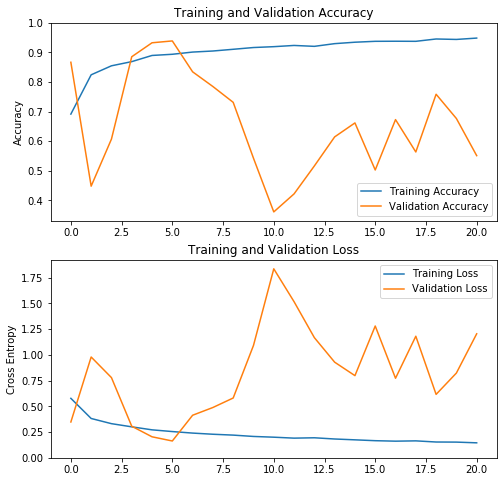

Training Acc:  [0.6916055871546475, 0.8245056009757504, 0.8549301618528043, 0.8690360946339404, 0.8899184069005702, 0.8939289172116758, 0.9013967639660377, 0.9049923939669285, 0.9108007191754429, 0.916747337933349, 0.9196515005169988, 0.923800304278581, 0.920757848194997, 0.9298852164539917, 0.9347254875091708, 0.9377679436504552, 0.9380445305019506, 0.9377679436009977, 0.9456506707727323, 0.9441294427103331, 0.9486931268398304]



Evaluating model on test set...
Result on test set: 80.79%
Run 2...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 27s - loss: 0.2453 - acc: 0.9015 - val_loss: 0.0306 - val_acc: 0.9913

Epoch 00001: val_loss improved from inf to 0.03062, saving model to checkpoints/GRAZ_sCNN_lowercap_run_2.h5
Epoch 2/100
 - 27s - loss: 0.2373 - acc: 0.9000 - val_loss: 0.1352 - val_acc: 0.9602

Epoch 00002: val_loss did not improve from 0.03062
Epoch 3/100
 - 27s - loss: 0.2221 - acc: 0.9119 - val_loss: 0.3271 - val_acc: 0.8731

Epoch 00003: val_loss did not im

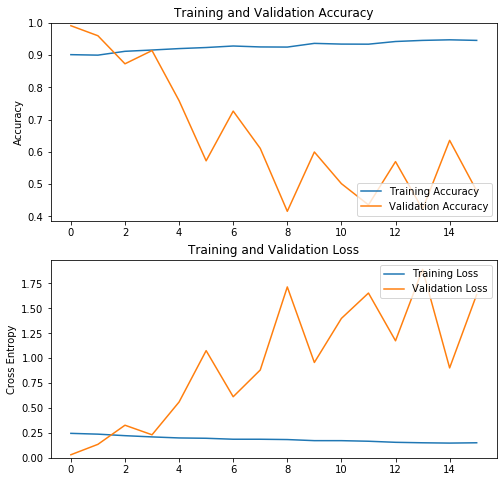

Training Acc:  [0.901535057433, 0.9000138294283012, 0.9119070668122264, 0.915917577131575, 0.9203429678353247, 0.9236620108528333, 0.9283639884163212, 0.9254598257914567, 0.9250449454235414, 0.9365233024972518, 0.9343106071577414, 0.9340340202485455, 0.9423316277222521, 0.94578896419848, 0.9475867791700753, 0.9457889642396947]



Evaluating model on test set...
Result on test set: 65.51%
Run 3...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 27s - loss: 0.2361 - acc: 0.9032 - val_loss: 0.0292 - val_acc: 0.9938

Epoch 00001: val_loss improved from inf to 0.02920, saving model to checkpoints/GRAZ_sCNN_lowercap_run_3.h5
Epoch 2/100
 - 27s - loss: 0.2296 - acc: 0.9075 - val_loss: 0.0801 - val_acc: 0.9677

Epoch 00002: val_loss did not improve from 0.02920
Epoch 3/100
 - 27s - loss: 0.2185 - acc: 0.9138 - val_loss: 0.0323 - val_acc: 0.9950

Epoch 00003: val_loss did not improve from 0.02920
Epoch 4/100
 - 27s - loss: 0.2159 - acc: 0.9130 - val_loss: 0.1648 - val_acc: 0.9341


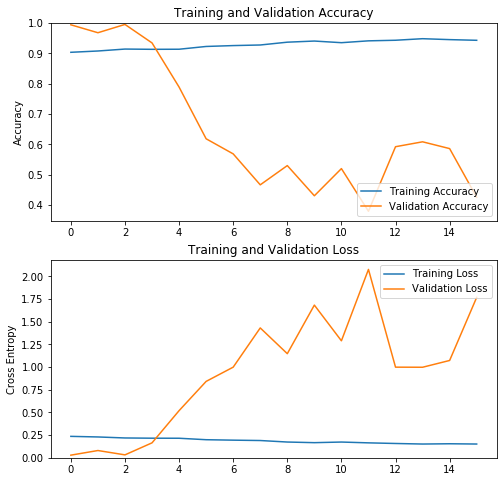

Training Acc:  [0.9031945789706046, 0.9074816761661773, 0.9138431752755127, 0.9130134145067105, 0.9132900014488781, 0.9224173697326016, 0.9253215323492231, 0.9272576407548089, 0.9365233024890088, 0.9402572258909186, 0.9348637809761331, 0.940948693151544, 0.9428848015736155, 0.9480016595379905, 0.9449592034873783, 0.9427465081066532]



Evaluating model on test set...
Result on test set: 65.60%
Run 4...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 27s - loss: 0.2320 - acc: 0.9050 - val_loss: 0.0581 - val_acc: 0.9764

Epoch 00001: val_loss improved from inf to 0.05809, saving model to checkpoints/GRAZ_sCNN_lowercap_run_4.h5
Epoch 2/100
 - 27s - loss: 0.2227 - acc: 0.9105 - val_loss: 0.0376 - val_acc: 0.9913

Epoch 00002: val_loss improved from 0.05809 to 0.03761, saving model to checkpoints/GRAZ_sCNN_lowercap_run_4.h5
Epoch 3/100
 - 27s - loss: 0.2181 - acc: 0.9084 - val_loss: 0.2226 - val_acc: 0.9129

Epoch 00003: val_loss did not improve from 0.03761
Epoch 4/100
 - 27s

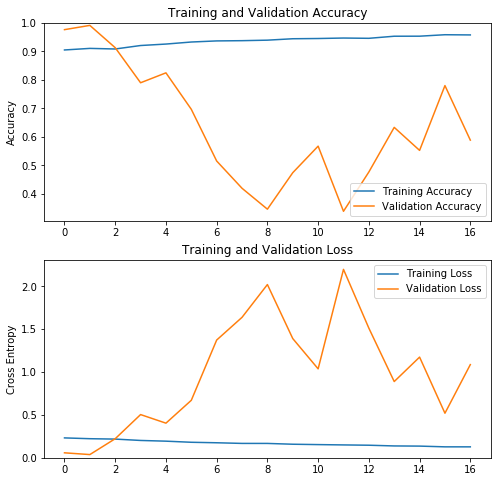

Training Acc:  [0.904992393917471, 0.9105241322497613, 0.9084497304184278, 0.9206195547115488, 0.9257364126759238, 0.9329276725293327, 0.9367998893982048, 0.9376296501422783, 0.9394274651303592, 0.9444060296112861, 0.9452357903718454, 0.9468953118599923, 0.9459272576736854, 0.9532568109693278, 0.9533951044198042, 0.958511962417151, 0.9578204950988252]



Evaluating model on test set...
Result on test set: 68.69%
Run 5...
Train on 7232 samples, validate on 804 samples
Epoch 1/100
 - 27s - loss: 0.2115 - acc: 0.9144 - val_loss: 0.3299 - val_acc: 0.8557

Epoch 00001: val_loss improved from inf to 0.32993, saving model to checkpoints/GRAZ_sCNN_lowercap_run_5.h5
Epoch 2/100
 - 27s - loss: 0.2047 - acc: 0.9168 - val_loss: 0.2213 - val_acc: 0.9005

Epoch 00002: val_loss improved from 0.32993 to 0.22131, saving model to checkpoints/GRAZ_sCNN_lowercap_run_5.h5
Epoch 3/100
 - 27s - loss: 0.1903 - acc: 0.9264 - val_loss: 0.2757 - val_acc: 0.8893

Epoch 00003: val_loss did not improve from 0.22131

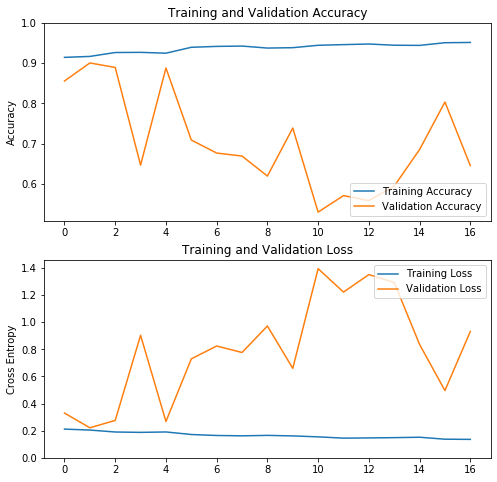

Training Acc:  [0.9144081858407079, 0.9167588495575221, 0.9264380530973452, 0.9268528761061947, 0.9247787610619469, 0.9394358407079646, 0.9416482300884956, 0.9424778761061947, 0.9375, 0.9384679203539823, 0.9444137168141593, 0.9460730088495575, 0.9475940265486725, 0.9445519911504425, 0.9441371681415929, 0.9507743362831859, 0.9514657079646017]



Evaluating model on test set...
Result on test set: 87.95%
73.71% (+/- 9.07%)
Saving CV values to file....
CV values successfully saved!



In [0]:
from sklearn.model_selection import StratifiedKFold
from models import LSTM
import datetime
from keras.callbacks import ModelCheckpoint,TensorBoard,EarlyStopping


# define KFOLD-fold cross validation test harness
kfold = StratifiedKFold(n_splits = KFOLD, shuffle = True, random_state = SEED)
cvscores_lowercap = []
history_lowercap = []
ii = 1
for train, test in kfold.split(x_subject, y_subject[:, 0]):
    print('Run ' + str(ii) + '...')
    # create callbacks
    model_name_str = 'GRAZ_sCNN_lowercap' + \
                     '_run_' + str(ii)

    # initialize and create the model
    
    # fit model. If you specify monitor=True, then the model will create callbacks
    # and write its state to a HDF5 file
    train_data =  [x_subject[train], y_subject[train]]
    monitor_index = 'val_loss'
    h = run_model(model, model_name_str,100, train_data, 0.1, 256, monitor_index)
    save_model(model, model_name_str, '')
    draw_graphs(h)
    history_lowercap.append(h)

    history.append(h)
    print ('Training Acc: ', h.history['acc'])
    print ('\n\n')
    # evaluate the model
    print('Evaluating model on test set...')
    scores = model.evaluate(x_subject[test], y_subject[test], verbose = 0)
    print("Result on test set: %.2f%%" % ( scores[1] * 100))
    cvscores_lowercap.append(scores[1] * 100)
    ii += 1
    
    
try:
  # print some evaluation statistics and write results to file
  print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_lowercap), np.std(cvscores_lowercap)))
  cv_all_subjects = np.asarray(cvscores)
  print('Saving CV values to file....')
  np.savetxt('GRAZ_CV_' + 'LSTM_' + str(DROPOUT) + 'do'+'.csv', 
              cv_all_subjects, delimiter = ',', fmt = '%2.4f')
  print('CV values successfully saved!\n')
except:
  print ('could not save')

In [0]:
scnn_1_train = [0.9514657079646017,  0.9578204950988252, 0.942746508106653,  0.9457889642396947, 0.9486931268398304]

In [0]:
cap_df = pd.DataFrame(columns =['Capacity (bits)', 'CV Train Acc', 'CV Test Acc'] )

In [0]:
cap_df.loc['sCNN_og', 'CV Test Acc'] = 97.157
cap_df.loc['sCNN_og', 'Capacity (bits)'] = 8360
cap_df.loc['sCNN_og', 'CV Train Acc'] = 75.471

cap_df.loc['sCNN_1', 'CV Test Acc'] = np.mean(cvscores_lowercap)
cap_df.loc['sCNN_1', 'Capacity (bits)'] = 2960
cap_df.loc['sCNN_1', 'CV Train Acc'] = np.mean(scnn_1_train)*100


In [0]:
cap_df

Capacity (bits) CV Train Acc CV Test Acc
sCNN_og            8360       75.471      97.157
sCNN_1             2960      94.9303     73.7071

## our sCNN 1770 bits

In [0]:
###MODEL###

model = Sequential()
# Conv Block 1
model.add(Conv2D(input_shape=(3, 1000, 1), filters=15, kernel_size=(1, 25), strides=(1, 1),
                padding='valid', activation=None))
model.add(Reshape(target_shape=(3, 976, 15, 1)))
# model.add(Dropout(0.5))

# Conv Block 2
model.add(Conv3D(filters=15, kernel_size=(3, 1, 15), padding='valid',
                data_format='channels_last'))
model.add(BatchNormalization())
model.add(Activation(keras.backend.square))  # custom squaring activation function
model.add(Flatten())
model.add(Reshape(target_shape=(976, 15, 1)))
# model.add(Dropout(0.5))
# Pooling
model.add(AveragePooling2D(pool_size=(75, 1), strides=(15, 1), data_format='channels_last'))
model.add(Activation(keras.backend.log))  # custom log function

# Classification
model.add(Flatten())
model.add(Dense(2))
model.add(Activation('softmax'))

  # compile the model
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 3, 976, 15)        390       
_________________________________________________________________
reshape_25 (Reshape)         (None, 3, 976, 15, 1)     0         
_________________________________________________________________
conv3d_15 (Conv3D)           (None, 1, 976, 1, 15)     690       
_________________________________________________________________
batch_normalization_9 (Batch (None, 1, 976, 1, 15)     60        
_________________________________________________________________
activation_25 (Activation)   (None, 1, 976, 1, 15)     0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 14640)             0         
_________________________________________________________________
reshape_26 (Reshape)         (None, 976, 15, 1)      

Run 1...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 21s - loss: 0.2959 - acc: 0.8726 - val_loss: 0.0287 - val_acc: 0.9988

Epoch 00001: val_loss improved from inf to 0.02870, saving model to checkpoints/GRAZ_sCNN_2_run_1.h5
Epoch 2/100
 - 21s - loss: 0.2880 - acc: 0.8802 - val_loss: 0.0566 - val_acc: 0.9813

Epoch 00002: val_loss did not improve from 0.02870
Epoch 3/100
 - 22s - loss: 0.2648 - acc: 0.8934 - val_loss: 0.1002 - val_acc: 0.9701

Epoch 00003: val_loss did not improve from 0.02870
Epoch 4/100
 - 22s - loss: 0.2537 - acc: 0.8963 - val_loss: 0.2085 - val_acc: 0.9142

Epoch 00004: val_loss did not improve from 0.02870
Epoch 5/100
 - 22s - loss: 0.2519 - acc: 0.8988 - val_loss: 0.2278 - val_acc: 0.9055

Epoch 00005: val_loss did not improve from 0.02870
Epoch 6/100
 - 22s - loss: 0.2392 - acc: 0.9036 - val_loss: 0.4871 - val_acc: 0.7861

Epoch 00006: val_loss did not improve from 0.02870
Epoch 7/100
 - 22s - loss: 0.2317 - acc: 0.9087 - val_loss: 0.7549 - val

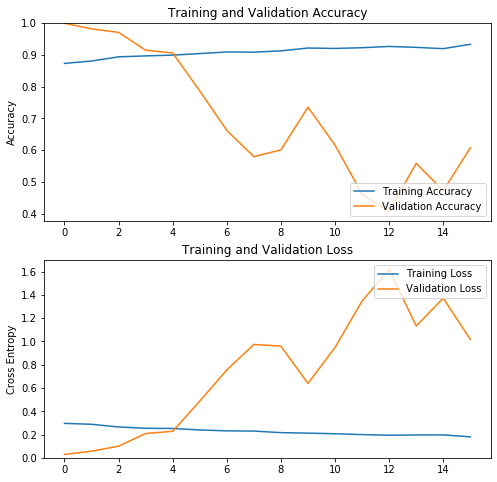

Training Acc:  [0.8726317246183454, 0.880237864790212, 0.8933757433932841, 0.8962799060263915, 0.8987691882915837, 0.9036094593714916, 0.9087263173028949, 0.9080348500010549, 0.9121836537131793, 0.9210344351454075, 0.9197897939592323, 0.9220024893152287, 0.9260129996345772, 0.9231088370097127, 0.9190983266738783, 0.9327893791200709]



Evaluating model on test set...
Result on test set: 61.52%
Run 2...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 22s - loss: 0.2870 - acc: 0.8815 - val_loss: 0.0527 - val_acc: 0.9826

Epoch 00001: val_loss improved from inf to 0.05269, saving model to checkpoints/GRAZ_sCNN_2_run_2.h5
Epoch 2/100
 - 22s - loss: 0.2757 - acc: 0.8867 - val_loss: 0.1129 - val_acc: 0.9652

Epoch 00002: val_loss did not improve from 0.05269
Epoch 3/100
 - 22s - loss: 0.2606 - acc: 0.8956 - val_loss: 0.1098 - val_acc: 0.9689

Epoch 00003: val_loss did not improve from 0.05269
Epoch 4/100
 - 22s - loss: 0.2473 - acc: 0.9011 - val_loss: 0.2016 - val_acc: 0.9341



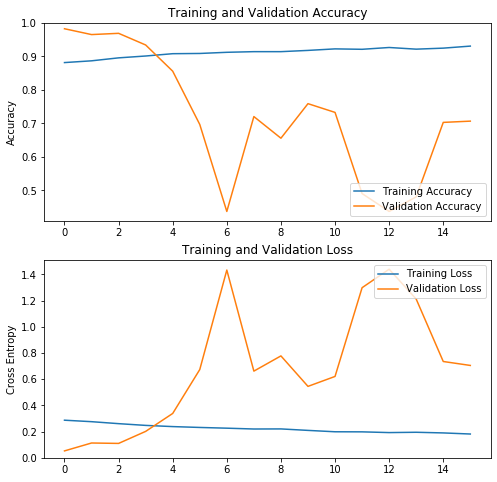

Training Acc:  [0.8814825059434155, 0.886737657350024, 0.8955884387080657, 0.9011201770568418, 0.9080348500175407, 0.9087263173111377, 0.9121836537708798, 0.9141197622094374, 0.9141197621847086, 0.9178536855454037, 0.9224173696831439, 0.9211727285629122, 0.926566173444726, 0.9215876090132569, 0.9246300650391402, 0.9307149772063081]



Evaluating model on test set...
Result on test set: 68.94%
Run 3...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 22s - loss: 0.2805 - acc: 0.8816 - val_loss: 0.1387 - val_acc: 0.9552

Epoch 00001: val_loss improved from inf to 0.13868, saving model to checkpoints/GRAZ_sCNN_2_run_3.h5
Epoch 2/100
 - 22s - loss: 0.2675 - acc: 0.8921 - val_loss: 0.1820 - val_acc: 0.9403

Epoch 00002: val_loss did not improve from 0.13868
Epoch 3/100
 - 22s - loss: 0.2561 - acc: 0.8923 - val_loss: 0.6734 - val_acc: 0.6816

Epoch 00003: val_loss did not improve from 0.13868
Epoch 4/100
 - 22s - loss: 0.2444 - acc: 0.8995 - val_loss: 0.7060 - val_acc: 0.6692

E

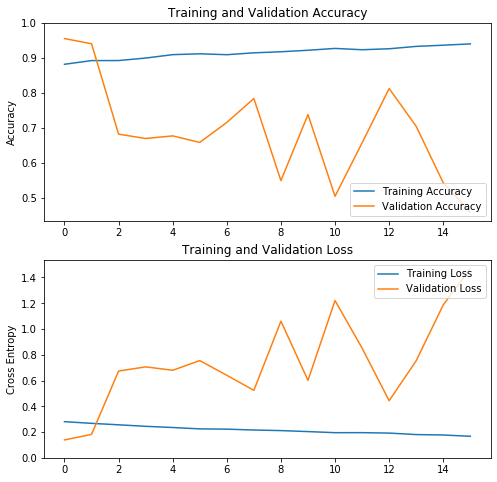

Training Acc:  [0.881620799385649, 0.8921311022648094, 0.8922693957235288, 0.8994606556016665, 0.9091411976460813, 0.9116304798865447, 0.9090029042285765, 0.9143963490939044, 0.9174388052022172, 0.9217259024390045, 0.9269810538126413, 0.9232471304601891, 0.9260129996098484, 0.9327893791200709, 0.9362467155715701, 0.9399806389405081]



Evaluating model on test set...
Result on test set: 79.49%
Run 4...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 22s - loss: 0.2701 - acc: 0.8913 - val_loss: 0.0396 - val_acc: 0.9863

Epoch 00001: val_loss improved from inf to 0.03957, saving model to checkpoints/GRAZ_sCNN_2_run_4.h5
Epoch 2/100
 - 22s - loss: 0.2553 - acc: 0.8955 - val_loss: 0.1692 - val_acc: 0.9391

Epoch 00002: val_loss did not improve from 0.03957
Epoch 3/100
 - 22s - loss: 0.2415 - acc: 0.9042 - val_loss: 0.4227 - val_acc: 0.8172

Epoch 00003: val_loss did not improve from 0.03957
Epoch 4/100
 - 22s - loss: 0.2367 - acc: 0.9086 - val_loss: 0.4338 - val_acc: 0.8197



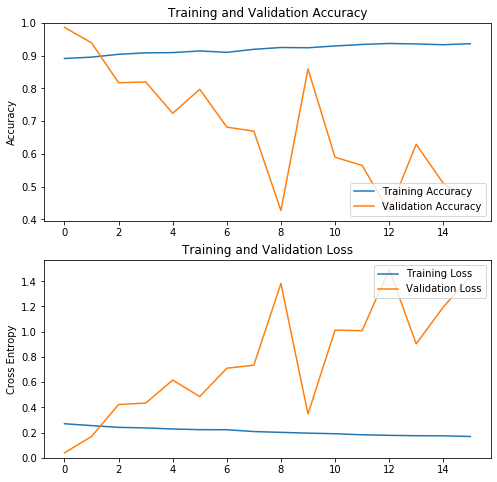

Training Acc:  [0.8913013415042501, 0.895450145282318, 0.9041626331486686, 0.9085880238606613, 0.9092794911130436, 0.9143963490774186, 0.9101092518818459, 0.91937491359956, 0.9249066519483361, 0.9240768912289914, 0.9296086295447958, 0.934172313699022, 0.9372147697743629, 0.9356935417284495, 0.9333425529714343, 0.9365233024560371]



Evaluating model on test set...
Result on test set: 66.50%
Run 5...
Train on 7232 samples, validate on 804 samples
Epoch 1/100
 - 22s - loss: 0.2615 - acc: 0.8924 - val_loss: 0.1887 - val_acc: 0.9303

Epoch 00001: val_loss improved from inf to 0.18868, saving model to checkpoints/GRAZ_sCNN_2_run_5.h5
Epoch 2/100
 - 22s - loss: 0.2437 - acc: 0.9033 - val_loss: 0.3624 - val_acc: 0.8557

Epoch 00002: val_loss did not improve from 0.18868
Epoch 3/100
 - 22s - loss: 0.2344 - acc: 0.9089 - val_loss: 0.4542 - val_acc: 0.8197

Epoch 00003: val_loss did not improve from 0.18868
Epoch 4/100
 - 22s - loss: 0.2342 - acc: 0.9082 - val_loss: 0.3051 - val_acc: 0.8818

Epo

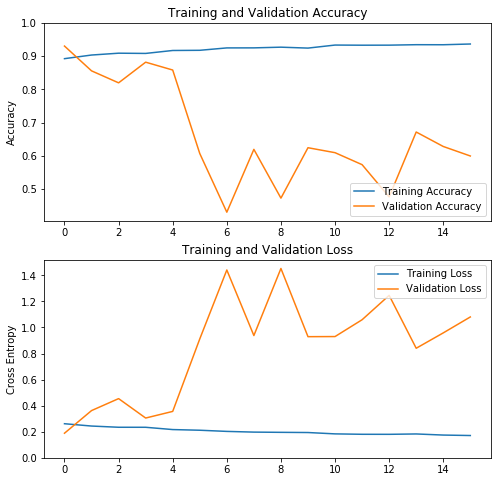

Training Acc:  [0.8924225663716814, 0.9033462389380531, 0.9088772123893806, 0.9081858407079646, 0.9170353982300885, 0.9175884955752213, 0.9247787610619469, 0.9249170353982301, 0.9269911504424779, 0.9242256637168141, 0.9333517699115044, 0.9329369469026548, 0.933075221238938, 0.9344579646017699, 0.9343196902654868, 0.9365320796460177]



Evaluating model on test set...
Result on test set: 80.58%
71.41% (+/- 7.45%)
Saving CV values to file....
CV values successfully saved!



In [0]:
from sklearn.model_selection import StratifiedKFold
from models import LSTM
import datetime
from keras.callbacks import ModelCheckpoint,TensorBoard,EarlyStopping


# define KFOLD-fold cross validation test harness
kfold = StratifiedKFold(n_splits = KFOLD, shuffle = True, random_state = SEED)
cvscores_2 = []
history_2 = []
ii = 1
for train, test in kfold.split(x_subject, y_subject[:, 0]):
    print('Run ' + str(ii) + '...')
    # create callbacks
    model_name_str = 'GRAZ_sCNN_2' + \
                     '_run_' + str(ii)

    # initialize and create the model
    
    # fit model. If you specify monitor=True, then the model will create callbacks
    # and write its state to a HDF5 file
    train_data =  [x_subject[train], y_subject[train]]
    monitor_index = 'val_loss'
    h = run_model(model, model_name_str,100, train_data, 0.1, 256, monitor_index)
    save_model(model, model_name_str, '')
    draw_graphs(h)
    history_2.append(h)

    history.append(h)
    print ('Training Acc: ', h.history['acc'])
    print ('\n\n')
    # evaluate the model
    print('Evaluating model on test set...')
    scores = model.evaluate(x_subject[test], y_subject[test], verbose = 0)
    print("Result on test set: %.2f%%" % ( scores[1] * 100))
    cvscores_2.append(scores[1] * 100)
    ii += 1
    
    
try:
  # print some evaluation statistics and write results to file
  print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_2), np.std(cvscores_2)))
  cv_all_subjects = np.asarray(cvscores)
  print('Saving CV values to file....')
  np.savetxt('GRAZ_CV_' + 'LSTM_' + str(DROPOUT) + 'do'+'.csv', 
              cv_all_subjects, delimiter = ',', fmt = '%2.4f')
  print('CV values successfully saved!\n')
except:
  print ('could not save')

In [0]:
scnn_2_train = [0.9327893791200709, 0.9307149772063081, 0.9399806389405081, 0.9365233024560371, 0.936532079646017]

In [0]:

cap_df.loc['sCNN_og', 'CV Train Acc'] = 97.157
cap_df.loc['sCNN_og', 'CV Test Acc'] = 75.471
cap_df.loc['sCNN_2', 'CV Test Acc'] = np.mean(cvscores_2)
cap_df.loc['sCNN_2', 'Capacity (bits)'] = 1770
cap_df.loc['sCNN_2', 'CV Train Acc'] = np.mean(scnn_1_train)*100
cap_df

Capacity (bits) CV Train Acc CV Test Acc
sCNN_og            8360       97.157      75.471
sCNN_1             2960      94.9303     73.7071
sCNN_2             1770      94.9303     71.4067

## our sCNN 3388 bits

In [0]:
###MODEL###

model = Sequential()
# Conv Block 1
model.add(Conv2D(input_shape=(3, 1000, 1), filters=22, kernel_size=(1, 25), strides=(1, 1),
                padding='valid', activation=None))
model.add(Reshape(target_shape=(3, 976, 22, 1)))
# model.add(Dropout(0.5))

# Conv Block 2
model.add(Conv3D(filters=22, kernel_size=(3, 1, 22), padding='valid',
                data_format='channels_last'))
model.add(BatchNormalization())
model.add(Activation(keras.backend.square))  # custom squaring activation function
model.add(Flatten())
model.add(Reshape(target_shape=(976, 22, 1)))
# model.add(Dropout(0.5))
# Pooling
model.add(AveragePooling2D(pool_size=(75, 1), strides=(15, 1), data_format='channels_last'))
model.add(Activation(keras.backend.log))  # custom log function

# Classification
model.add(Flatten())
model.add(Dense(2))
model.add(Activation('softmax'))

  # compile the model
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 3, 976, 22)        572       
_________________________________________________________________
reshape_43 (Reshape)         (None, 3, 976, 22, 1)     0         
_________________________________________________________________
conv3d_24 (Conv3D)           (None, 1, 976, 1, 22)     1474      
_________________________________________________________________
batch_normalization_16 (Batc (None, 1, 976, 1, 22)     88        
_________________________________________________________________
activation_40 (Activation)   (None, 1, 976, 1, 22)     0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 21472)             0         
_________________________________________________________________
reshape_44 (Reshape)         (None, 976, 22, 1)      

Run 1...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 31s - loss: 0.5764 - acc: 0.6855 - val_loss: 0.2831 - val_acc: 0.8980

Epoch 00001: val_loss improved from inf to 0.28313, saving model to checkpoints/GRAZ_sCNN_0_run_1.h5
Epoch 2/100
 - 30s - loss: 0.3943 - acc: 0.8152 - val_loss: 0.8062 - val_acc: 0.5684

Epoch 00002: val_loss did not improve from 0.28313
Epoch 3/100
 - 30s - loss: 0.3428 - acc: 0.8475 - val_loss: 0.5750 - val_acc: 0.7450

Epoch 00003: val_loss did not improve from 0.28313
Epoch 4/100
 - 29s - loss: 0.3075 - acc: 0.8704 - val_loss: 0.6482 - val_acc: 0.7015

Epoch 00004: val_loss did not improve from 0.28313
Epoch 5/100
 - 29s - loss: 0.2866 - acc: 0.8801 - val_loss: 0.7276 - val_acc: 0.6667

Epoch 00005: val_loss did not improve from 0.28313
Epoch 6/100
 - 29s - loss: 0.2637 - acc: 0.8902 - val_loss: 0.7656 - val_acc: 0.6604

Epoch 00006: val_loss did not improve from 0.28313
Epoch 7/100
 - 29s - loss: 0.2436 - acc: 0.9002 - val_loss: 0.8177 - val

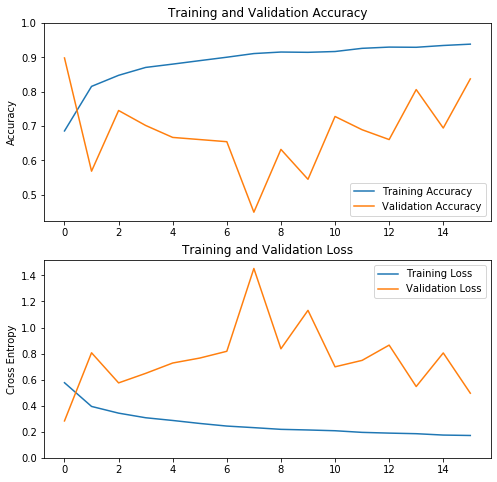

Training Acc:  [0.6855206749627508, 0.8152399392250645, 0.8474623151149283, 0.8704190292458632, 0.8800995713974361, 0.890194993818009, 0.9001521228293201, 0.9108007191507141, 0.9152261098297351, 0.9143963490691757, 0.9167473379086202, 0.9260129996180914, 0.9296086295365529, 0.9290554557099182, 0.9343106071412555, 0.938182823968913]



Evaluating model on test set...
Result on test set: 73.12%
Run 2...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 30s - loss: 0.4124 - acc: 0.8098 - val_loss: 0.1705 - val_acc: 0.9440

Epoch 00001: val_loss improved from inf to 0.17053, saving model to checkpoints/GRAZ_sCNN_0_run_2.h5
Epoch 2/100
 - 29s - loss: 0.3650 - acc: 0.8387 - val_loss: 0.1341 - val_acc: 0.9614

Epoch 00002: val_loss improved from 0.17053 to 0.13409, saving model to checkpoints/GRAZ_sCNN_0_run_2.h5
Epoch 3/100
 - 29s - loss: 0.3389 - acc: 0.8469 - val_loss: 0.4506 - val_acc: 0.8134

Epoch 00003: val_loss did not improve from 0.13409
Epoch 4/100
 - 29s - loss: 0.2995

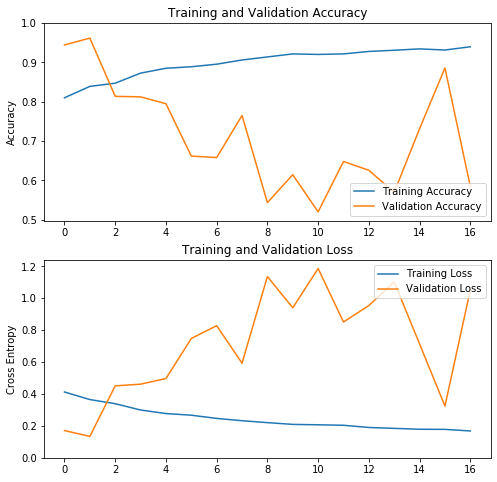

Training Acc:  [0.8098464944009514, 0.8387498272568206, 0.8469091412718077, 0.8724934311184114, 0.8848015489197094, 0.8886737657720956, 0.8951735583319075, 0.9058221546697873, 0.9135665883663169, 0.9213110220298746, 0.9199280874756524, 0.9213110220546034, 0.9275342276722477, 0.9305766838135322, 0.9340340202073308, 0.9311298575989522, 0.9394274650891447]



Evaluating model on test set...
Result on test set: 74.32%
Run 3...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 29s - loss: 0.3459 - acc: 0.8462 - val_loss: 1.1969 - val_acc: 0.4440

Epoch 00001: val_loss improved from inf to 1.19686, saving model to checkpoints/GRAZ_sCNN_0_run_3.h5
Epoch 2/100
 - 29s - loss: 0.3090 - acc: 0.8703 - val_loss: 0.2794 - val_acc: 0.9142

Epoch 00002: val_loss improved from 1.19686 to 0.27943, saving model to checkpoints/GRAZ_sCNN_0_run_3.h5
Epoch 3/100
 - 29s - loss: 0.2825 - acc: 0.8854 - val_loss: 0.8807 - val_acc: 0.5883

Epoch 00003: val_loss did not improve from 0.27943
Epoch 4/100

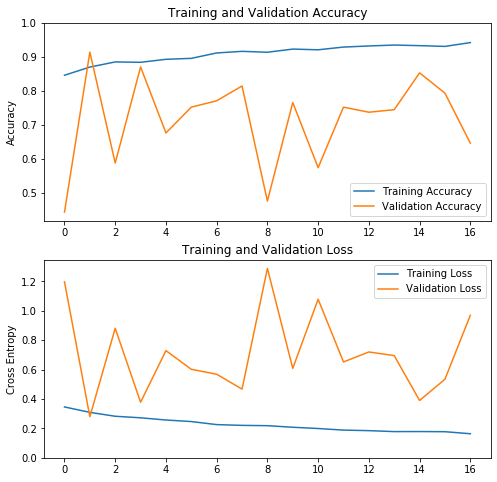

Training Acc:  [0.8462176739452391, 0.8702807358201156, 0.8853547227628299, 0.8842483751342893, 0.8930991564840882, 0.8958650256419904, 0.9117687733699928, 0.9164707509829384, 0.9138431752260552, 0.9231088370014697, 0.92103443509595, 0.929055455734647, 0.9322362052687074, 0.9350020744843102, 0.9332042594550144, 0.9309915641319898, 0.9421933342882615]



Evaluating model on test set...
Result on test set: 84.47%
Run 4...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 29s - loss: 0.2963 - acc: 0.8761 - val_loss: 0.3167 - val_acc: 0.9017

Epoch 00001: val_loss improved from inf to 0.31666, saving model to checkpoints/GRAZ_sCNN_0_run_4.h5
Epoch 2/100
 - 29s - loss: 0.2749 - acc: 0.8827 - val_loss: 0.3981 - val_acc: 0.8595

Epoch 00002: val_loss did not improve from 0.31666
Epoch 3/100
 - 29s - loss: 0.2621 - acc: 0.8906 - val_loss: 0.8725 - val_acc: 0.6405

Epoch 00003: val_loss did not improve from 0.31666
Epoch 4/100
 - 29s - loss: 0.2424 - acc: 0.9006 - val_loss: 0.7086 -

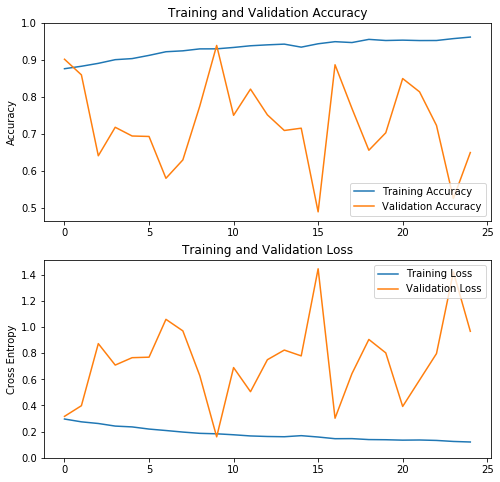

Training Acc:  [0.8760890610863304, 0.882727147080133, 0.890609874218896, 0.9005670032302071, 0.9034711658880434, 0.912183653754394, 0.9220024892987428, 0.9244917715556921, 0.9297469230117582, 0.9298852164869634, 0.9336191398559014, 0.9381828240018847, 0.940672106250591, 0.9426082146644197, 0.934448900591732, 0.9435762688672126, 0.9492463006911939, 0.9468953118682353, 0.9554695063005954, 0.9524270502417401, 0.9533951044198042, 0.9522887567582919, 0.9524270502087685, 0.9575439082061151, 0.9616927119512113]



Evaluating model on test set...
Result on test set: 80.54%
Run 5...
Train on 7232 samples, validate on 804 samples
Epoch 1/100
 - 29s - loss: 0.1893 - acc: 0.9289 - val_loss: 0.6635 - val_acc: 0.7400

Epoch 00001: val_loss improved from inf to 0.66346, saving model to checkpoints/GRAZ_sCNN_0_run_5.h5
Epoch 2/100
 - 29s - loss: 0.1792 - acc: 0.9307 - val_loss: 0.7536 - val_acc: 0.7475

Epoch 00002: val_loss did not improve from 0.66346
Epoch 3/100
 - 29s - loss: 0.1749 - acc: 0.9347

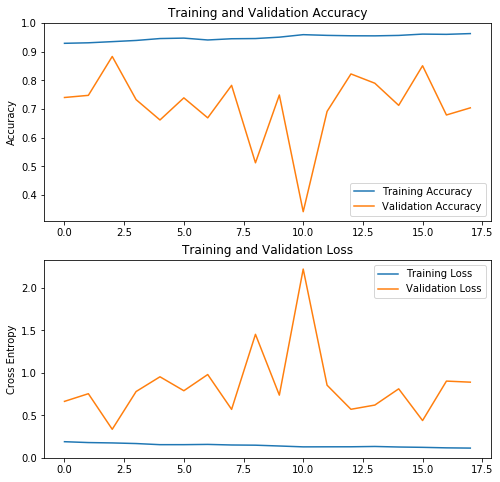

Training Acc:  [0.9289269911504425, 0.9307245575221239, 0.9347345132743363, 0.9388827433628318, 0.9455199115044248, 0.9470409292035398, 0.9405420353982301, 0.9448285398230089, 0.9455199115044248, 0.9503595132743363, 0.959070796460177, 0.9565818584070797, 0.9551991150442478, 0.9549225663716814, 0.9564435840707964, 0.9610066371681416, 0.9601769911504425, 0.962804203539823]



Evaluating model on test set...
Result on test set: 88.30%
80.15% (+/- 5.81%)
Saving CV values to file....
CV values successfully saved!



In [0]:
from sklearn.model_selection import StratifiedKFold
from models import LSTM
import datetime
from keras.callbacks import ModelCheckpoint,TensorBoard,EarlyStopping


# define KFOLD-fold cross validation test harness
kfold = StratifiedKFold(n_splits = KFOLD, shuffle = True, random_state = SEED)
cvscores_0 = []
history_0 = []
ii = 1
for train, test in kfold.split(x_subject, y_subject[:, 0]):
    print('Run ' + str(ii) + '...')
    # create callbacks
    model_name_str = 'GRAZ_sCNN_0' + \
                     '_run_' + str(ii)

    # initialize and create the model
    
    # fit model. If you specify monitor=True, then the model will create callbacks
    # and write its state to a HDF5 file
    train_data =  [x_subject[train], y_subject[train]]
    monitor_index = 'val_loss'
    h = run_model(model, model_name_str,100, train_data, 0.1, 256, monitor_index)
    save_model(model, model_name_str, '')
    draw_graphs(h)
    history_0.append(h)

    history.append(h)
    print ('Training Acc: ', h.history['acc'])
    print ('\n\n')
    # evaluate the model
    print('Evaluating model on test set...')
    scores = model.evaluate(x_subject[test], y_subject[test], verbose = 0)
    print("Result on test set: %.2f%%" % ( scores[1] * 100))
    cvscores_0.append(scores[1] * 100)
    ii += 1
    
    
try:
  # print some evaluation statistics and write results to file
  print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_0), np.std(cvscores_0)))
  cv_all_subjects = np.asarray(cvscores)
  print('Saving CV values to file....')
  np.savetxt('GRAZ_CV_' + 'LSTM_' + str(DROPOUT) + 'do'+'.csv', 
              cv_all_subjects, delimiter = ',', fmt = '%2.4f')
  print('CV values successfully saved!\n')
except:
  print ('could not save')

In [0]:
scnn_0_train = [0.938182823968913, 0.9394274650891447,  0.9421933342882615, 0.9616927119512113, 0.962804203539823]

In [0]:

cap_df.loc['sCNN_0', 'CV Test Acc'] = np.mean(cvscores_0)
cap_df.loc['sCNN_0', 'Capacity (bits)'] = 3388
cap_df.loc['sCNN_0', 'CV Train Acc'] = np.mean(scnn_0_train)*100
cap_df.loc['sCNN_2', 'CV Train Acc'] = np.mean(scnn_2_train)*100

cap_df.sort_values('Capacity (bits)')

Capacity (bits) CV Train Acc CV Test Acc
sCNN_2             1770      93.5308     71.4067
sCNN_1             2960      94.9303     73.7071
sCNN_0             3388       94.886     80.1482
sCNN_og            8360       97.157      75.471

## our sCNN 3611 bits

In [0]:
###MODEL###

model = Sequential()
# Conv Block 1
model.add(Conv2D(input_shape=(3, 1000, 1), filters=23, kernel_size=(1, 25), strides=(1, 1),
                padding='valid', activation=None))
model.add(Reshape(target_shape=(3, 976, 23, 1)))
# model.add(Dropout(0.5))

# Conv Block 2
model.add(Conv3D(filters=23, kernel_size=(3, 1, 23), padding='valid',
                data_format='channels_last'))
model.add(BatchNormalization())
model.add(Activation(keras.backend.square))  # custom squaring activation function
model.add(Flatten())
model.add(Reshape(target_shape=(976, 23, 1)))
# model.add(Dropout(0.5))
# Pooling
model.add(AveragePooling2D(pool_size=(75, 1), strides=(15, 1), data_format='channels_last'))
model.add(Activation(keras.backend.log))  # custom log function

# Classification
model.add(Flatten())
model.add(Dense(2))
model.add(Activation('softmax'))

  # compile the model
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 3, 976, 23)        598       
_________________________________________________________________
reshape_45 (Reshape)         (None, 3, 976, 23, 1)     0         
_________________________________________________________________
conv3d_25 (Conv3D)           (None, 1, 976, 1, 23)     1610      
_________________________________________________________________
batch_normalization_17 (Batc (None, 1, 976, 1, 23)     92        
_________________________________________________________________
activation_43 (Activation)   (None, 1, 976, 1, 23)     0         
_________________________________________________________________
flatten_30 (Flatten)         (None, 22448)             0         
_________________________________________________________________
reshape_46 (Reshape)         (None, 976, 23, 1)      

Run 1...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 31s - loss: 0.5876 - acc: 0.6768 - val_loss: 0.4295 - val_acc: 0.8085

Epoch 00001: val_loss improved from inf to 0.42954, saving model to checkpoints/GRAZ_sCNN_3_run_1.h5
Epoch 2/100
 - 30s - loss: 0.3940 - acc: 0.8249 - val_loss: 0.3573 - val_acc: 0.8632

Epoch 00002: val_loss improved from 0.42954 to 0.35734, saving model to checkpoints/GRAZ_sCNN_3_run_1.h5
Epoch 3/100
 - 30s - loss: 0.3353 - acc: 0.8571 - val_loss: 0.5531 - val_acc: 0.7264

Epoch 00003: val_loss did not improve from 0.35734
Epoch 4/100
 - 30s - loss: 0.3178 - acc: 0.8624 - val_loss: 0.8859 - val_acc: 0.5448

Epoch 00004: val_loss did not improve from 0.35734
Epoch 5/100
 - 31s - loss: 0.2859 - acc: 0.8798 - val_loss: 1.1542 - val_acc: 0.4527

Epoch 00005: val_loss did not improve from 0.35734
Epoch 6/100
 - 31s - loss: 0.2652 - acc: 0.8923 - val_loss: 1.5156 - val_acc: 0.3060

Epoch 00006: val_loss did not improve from 0.35734
Epoch 7/100
 - 30s

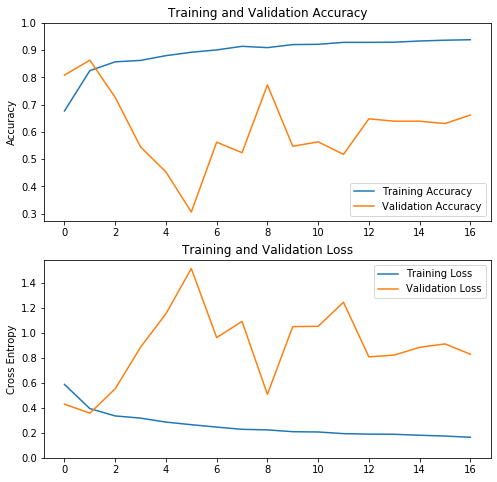

Training Acc:  [0.6768081870964002, 0.8249204813354227, 0.8571428572005577, 0.8623980086648667, 0.8798229844635114, 0.8922693957565005, 0.9008435901394031, 0.9141197621847086, 0.9092794911295295, 0.9204812612858011, 0.921449315488594, 0.9286405753502459, 0.9286405753502459, 0.9291937491933664, 0.9336191398806303, 0.9365233025302235, 0.9383211174523611]



Evaluating model on test set...
Result on test set: 82.23%
Run 2...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 31s - loss: 0.3451 - acc: 0.8571 - val_loss: 0.0251 - val_acc: 0.9988

Epoch 00001: val_loss improved from inf to 0.02511, saving model to checkpoints/GRAZ_sCNN_3_run_2.h5
Epoch 2/100
 - 31s - loss: 0.3144 - acc: 0.8714 - val_loss: 0.0382 - val_acc: 0.9950

Epoch 00002: val_loss did not improve from 0.02511
Epoch 3/100
 - 31s - loss: 0.2995 - acc: 0.8721 - val_loss: 0.0448 - val_acc: 0.9925

Epoch 00003: val_loss did not improve from 0.02511
Epoch 4/100
 - 31s - loss: 0.2782 - acc: 0.8866 - val_loss: 1.0249

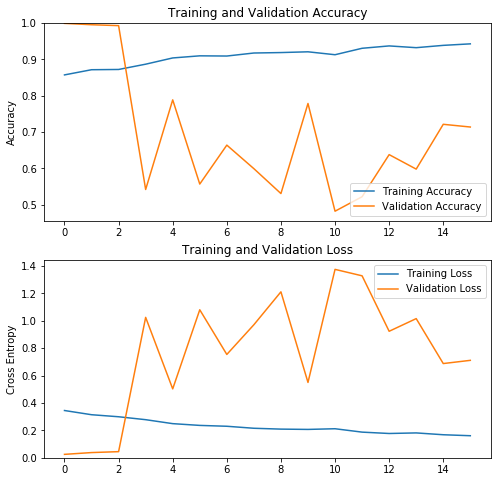

Training Acc:  [0.8571428572170435, 0.8713870834239273, 0.8720785507010385, 0.8865993639325193, 0.9037477528054823, 0.9095560780552112, 0.9090029042368195, 0.917300511718769, 0.9185451528472436, 0.9206195547939782, 0.912598534163524, 0.9303000968631217, 0.9367998893982048, 0.9319596183595116, 0.9383211174441182, 0.9424699211974573]



Evaluating model on test set...
Result on test set: 59.68%
Run 3...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 31s - loss: 0.3174 - acc: 0.8675 - val_loss: 0.0295 - val_acc: 0.9975

Epoch 00001: val_loss improved from inf to 0.02952, saving model to checkpoints/GRAZ_sCNN_3_run_3.h5
Epoch 2/100
 - 31s - loss: 0.2942 - acc: 0.8750 - val_loss: 0.2394 - val_acc: 0.9030

Epoch 00002: val_loss did not improve from 0.02952
Epoch 3/100
 - 31s - loss: 0.2680 - acc: 0.8927 - val_loss: 0.5068 - val_acc: 0.7774

Epoch 00003: val_loss did not improve from 0.02952
Epoch 4/100
 - 31s - loss: 0.2566 - acc: 0.8977 - val_loss: 0.4453 - val_acc: 0.8134

E

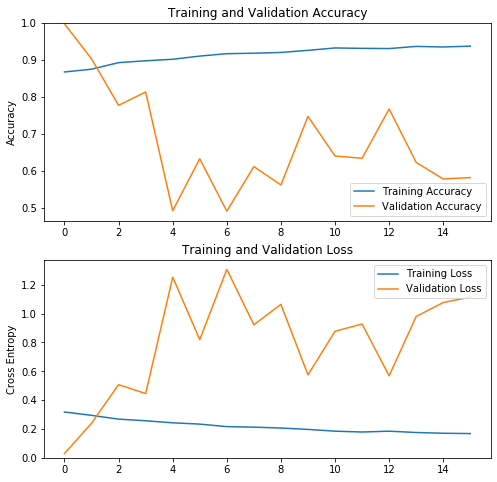

Training Acc:  [0.8675148666374846, 0.8749827133671176, 0.8926842760667153, 0.8976628405641279, 0.9018116443669247, 0.910385838766313, 0.9168856313673396, 0.9181302724793283, 0.9202046743353905, 0.925874706151129, 0.9323744987686414, 0.9312681510659145, 0.9307149772063081, 0.936523302480766, 0.9350020744595813, 0.9372147697578771]



Evaluating model on test set...
Result on test set: 63.41%
Run 4...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 31s - loss: 0.3006 - acc: 0.8721 - val_loss: 0.0344 - val_acc: 0.9913

Epoch 00001: val_loss improved from inf to 0.03440, saving model to checkpoints/GRAZ_sCNN_3_run_4.h5
Epoch 2/100
 - 31s - loss: 0.2911 - acc: 0.8775 - val_loss: 0.1430 - val_acc: 0.9490

Epoch 00002: val_loss did not improve from 0.03440
Epoch 3/100
 - 31s - loss: 0.2577 - acc: 0.8931 - val_loss: 1.0463 - val_acc: 0.5311

Epoch 00003: val_loss did not improve from 0.03440
Epoch 4/100
 - 31s - loss: 0.2391 - acc: 0.9025 - val_loss: 0.9123 - val_acc: 0.5846

Ep

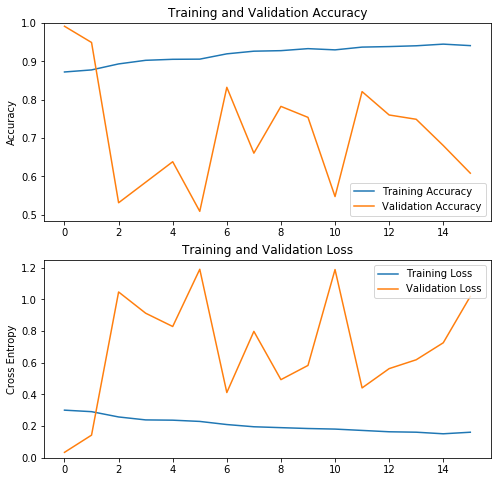

Training Acc:  [0.8720785507917107, 0.8774719955993381, 0.893099156508817, 0.9025031116522788, 0.9051306873926762, 0.9055455677770774, 0.9193749136160458, 0.9262895865437731, 0.9276725210979954, 0.9329276725787903, 0.9297469229787865, 0.9369381828321953, 0.9383211174606041, 0.9403955193331521, 0.9446826165699395, 0.9408103997010674]



Evaluating model on test set...
Result on test set: 63.86%
Run 5...
Train on 7232 samples, validate on 804 samples
Epoch 1/100
 - 31s - loss: 0.2785 - acc: 0.8938 - val_loss: 0.4119 - val_acc: 0.8147

Epoch 00001: val_loss improved from inf to 0.41186, saving model to checkpoints/GRAZ_sCNN_3_run_5.h5
Epoch 2/100
 - 31s - loss: 0.2584 - acc: 0.8966 - val_loss: 0.5947 - val_acc: 0.7388

Epoch 00002: val_loss did not improve from 0.41186
Epoch 3/100
 - 31s - loss: 0.2385 - acc: 0.9060 - val_loss: 0.3017 - val_acc: 0.8694

Epoch 00003: val_loss improved from 0.41186 to 0.30169, saving model to checkpoints/GRAZ_sCNN_3_run_5.h5
Epoch 4/100
 - 30s - loss: 0.227

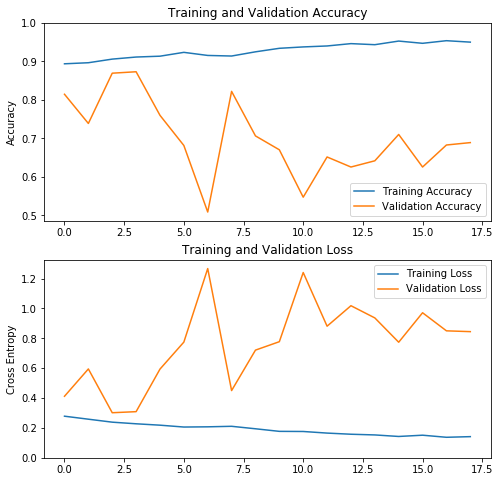

Training Acc:  [0.8938053097345132, 0.896570796460177, 0.9059734513274337, 0.9113661504424779, 0.9135785398230089, 0.9235342920353983, 0.9155143805309734, 0.9139933628318584, 0.9249170353982301, 0.9340431415929203, 0.9376382743362832, 0.9401272123893806, 0.9462112831858407, 0.943445796460177, 0.9528484513274337, 0.9470409292035398, 0.953816371681416, 0.9500829646017699]



Evaluating model on test set...
Result on test set: 86.55%
71.15% (+/- 11.00%)
Saving CV values to file....
CV values successfully saved!



In [0]:
from sklearn.model_selection import StratifiedKFold
from models import LSTM
import datetime
from keras.callbacks import ModelCheckpoint,TensorBoard,EarlyStopping


# define KFOLD-fold cross validation test harness
kfold = StratifiedKFold(n_splits = KFOLD, shuffle = True, random_state = SEED)
cvscores_3 = []
history_3 = []
ii = 1
for train, test in kfold.split(x_subject, y_subject[:, 0]):
    print('Run ' + str(ii) + '...')
    # create callbacks
    model_name_str = 'GRAZ_sCNN_3' + \
                     '_run_' + str(ii)

    # initialize and create the model
    
    # fit model. If you specify monitor=True, then the model will create callbacks
    # and write its state to a HDF5 file
    train_data =  [x_subject[train], y_subject[train]]
    monitor_index = 'val_loss'
    h = run_model(model, model_name_str,100, train_data, 0.1, 256, monitor_index)
    save_model(model, model_name_str, '')
    draw_graphs(h)
    history_3.append(h)

    history.append(h)
    print ('Training Acc: ', h.history['acc'])
    print ('\n\n')
    # evaluate the model
    print('Evaluating model on test set...')
    scores = model.evaluate(x_subject[test], y_subject[test], verbose = 0)
    print("Result on test set: %.2f%%" % ( scores[1] * 100))
    cvscores_3.append(scores[1] * 100)
    ii += 1
    
    
try:
  # print some evaluation statistics and write results to file
  print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_3), np.std(cvscores_3)))
  cv_all_subjects = np.asarray(cvscores)
  print('Saving CV values to file....')
  np.savetxt('GRAZ_CV_' + 'LSTM_' + str(DROPOUT) + 'do'+'.csv', 
              cv_all_subjects, delimiter = ',', fmt = '%2.4f')
  print('CV values successfully saved!\n')
except:
  print ('could not save')

In [0]:
scnn_train_3 = [0.9500829646017699, 0.9408103997010674, 0.9372147697578771, 0.9424699211974573, 0.9383211174523611]

In [0]:
cvscores_3 = [82.23, 59.68, 63.41, 63.86, 86.55]

In [0]:
import pandas as pd
import numpy as np

In [36]:
cap_df = pd.DataFrame(columns=['Capacity (bits)', 'CV Train Acc', 'CV Test Acc'])
cap_df = cap_df.set_index('Capacity (bits)')
cap_df

Empty DataFrame
Columns: [CV Train Acc, CV Test Acc]
Index: []

In [0]:
cap_df.loc['32220', 'CV Train Acc'] = 98.390
cap_df.loc['32220', 'CV Test Acc'] = 65.013

cap_df.loc['16080', 'CV Train Acc'] = 99.035
cap_df.loc['16080', 'CV Test Acc'] = 79.520

cap_df.loc['8630*', 'CV Train Acc'] = 97.157
cap_df.loc['8630*', 'CV Test Acc'] = 75.471

cap_df.loc['3388', 'CV Train Acc'] = 94.886
cap_df.loc['3388', 'CV Test Acc'] =  80.148

cap_df.loc['1770', 'CV Train Acc'] = 93.5308
cap_df.loc['1770', 'CV Test Acc'] = 71.4067

In [38]:
cap_df

CV Train Acc CV Test Acc
Capacity (bits)                         
32220                  98.39      65.013
16080                 99.035       79.52
8630*                 97.157      75.471
3388                  94.886      80.148
1770                 93.5308     71.4067

## Graphs

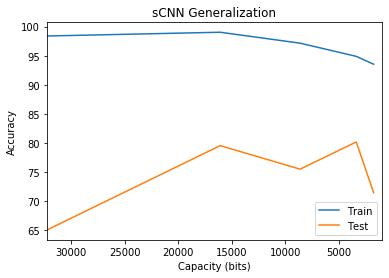

In [40]:
plt.plot([32220, 16080, 8630, 3388, 1770], cap_df['CV Train Acc'], label = 'Train')
plt.plot([32220, 16080, 8630, 3388, 1770], cap_df['CV Test Acc'], label = 'Test')
plt.xlim(32220, 1000)
plt.xlabel('Capacity (bits)')
plt.ylabel('Accuracy')
plt.title('sCNN Generalization')
plt.legend()

# pCNN

In [17]:
x_subject = x_augmented
y_subject = y_augmented
x_subject = np.rollaxis(x_subject, 2, 1)
# x_subject = np.rollaxis(x_subject, 1)
# x_subject = np.rollaxis(x_subject, 2, 1)
x_subject.shape

(10044, 3, 1000)

In [0]:
import keras
from kapre.time_frequency import Spectrogram
from kapre.utils import Normalization2D

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import BatchNormalization, Dropout, Conv2D, MaxPooling2D


## og pCNN

In [0]:
input_shape = x_subject.shape[1:]
model = Sequential()

# spectrogram creation using STFT
model.add(Spectrogram(n_dft = 128, n_hop = 16, input_shape = input_shape,
        return_decibel_spectrogram = False, power_spectrogram = 2.0,
        trainable_kernel = False, name = 'static_stft'))
model.add(Normalization2D(str_axis = 'freq'))

# Conv Block 1
model.add(Conv2D(filters = 24, kernel_size = (12, 12),
                strides = (1, 1), name = 'conv1',
                border_mode = 'same'))
model.add(BatchNormalization(axis = 1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2), padding = 'valid',
                      data_format = 'channels_last'))

# Conv Block 2
model.add(Conv2D(filters = 48, kernel_size = (8, 8),
                name = 'conv2', border_mode = 'same'))
model.add(BatchNormalization(axis = 1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid',
                      data_format = 'channels_last'))

# Conv Block 3
model.add(Conv2D(filters = 96, kernel_size = (4, 4),
                name = 'conv3', border_mode = 'same'))
model.add(BatchNormalization(axis = 1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2),
                      padding = 'valid',
                      data_format = 'channels_last'))
# model.add(Dropout(dropout))

# classificator
model.add(Flatten())
model.add(Dense(2))  # two classes only
model.add(Activation('softmax'))

# compile the model
model.compile(loss = 'categorical_crossentropy',
            optimizer = 'adam',
            metrics = ['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=24, kernel_size=(12, 12), strides=(1, 1), name="conv1", padding="same")`
  del sys.path[0]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=48, kernel_size=(8, 8), name="conv2", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=96, kernel_size=(4, 4), name="conv3", padding="same")`


In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
static_stft (Spectrogram)    (None, 65, 63, 3)         16640     
_________________________________________________________________
normalization2d_1 (Normaliza (None, 65, 63, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 65, 63, 24)        10392     
_________________________________________________________________
batch_normalization_1 (Batch (None, 65, 63, 24)        260       
_________________________________________________________________
activation_1 (Activation)    (None, 65, 63, 24)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 31, 24)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 32, 31, 48)       

Run 1...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 243s - loss: 1.0368 - acc: 0.5403 - val_loss: 0.7989 - val_acc: 0.3669

Epoch 00001: val_loss improved from inf to 0.79889, saving model to checkpoints/GRAZ_pCNN__run_1.h5
Epoch 2/100
 - 244s - loss: 0.6621 - acc: 0.6014 - val_loss: 0.5607 - val_acc: 0.7898

Epoch 00002: val_loss improved from 0.79889 to 0.56069, saving model to checkpoints/GRAZ_pCNN__run_1.h5
Epoch 3/100
 - 243s - loss: 0.6451 - acc: 0.6262 - val_loss: 0.3736 - val_acc: 0.9801

Epoch 00003: val_loss improved from 0.56069 to 0.37364, saving model to checkpoints/GRAZ_pCNN__run_1.h5
Epoch 4/100
 - 244s - loss: 0.6224 - acc: 0.6541 - val_loss: 0.5740 - val_acc: 0.7624

Epoch 00004: val_loss did not improve from 0.37364
Epoch 5/100
 - 244s - loss: 0.5505 - acc: 0.7229 - val_loss: 0.6775 - val_acc: 0.5858

Epoch 00005: val_loss did not improve from 0.37364
Epo

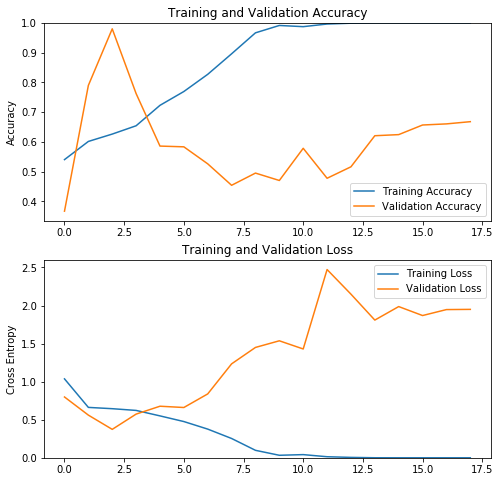

Training Acc:  [0.5403125434310221, 0.6014382521685122, 0.6261927812710423, 0.654128059874661, 0.7228599088252324, 0.7693265109549517, 0.8271331766831761, 0.8961416125264575, 0.9666712764651099, 0.9914258055593971, 0.9874152952647773, 0.9962660766145761, 0.9990319457889641, 1.0, 1.0, 1.0, 1.0, 1.0]



Evaluating model on test set...
Result on test set: 53.31%
Run 2...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 245s - loss: 0.6448 - acc: 0.6410 - val_loss: 0.3451 - val_acc: 0.8930

Epoch 00001: val_loss improved from inf to 0.34505, saving model to checkpoints/GRAZ_pCNN__run_2.h5
Epoch 2/100
 - 247s - loss: 0.5801 - acc: 0.6916 - val_loss: 0.7217 - val_acc: 0.5522

Epoch 00002: val_loss did not improve from 0.34505
Epoch 3/100
 - 244s - loss: 0.4819 - acc: 0.7682 - val_loss: 0.8426 - val_acc: 0.4254

Epoch 00003: val_loss did not improve from 0.34505
Epoch 4/100
 - 244s - loss: 0.3975 - acc: 0.8219 - val_loss: 1.0226 - val_acc: 0.4129

Epoch 00004: val_loss did not im

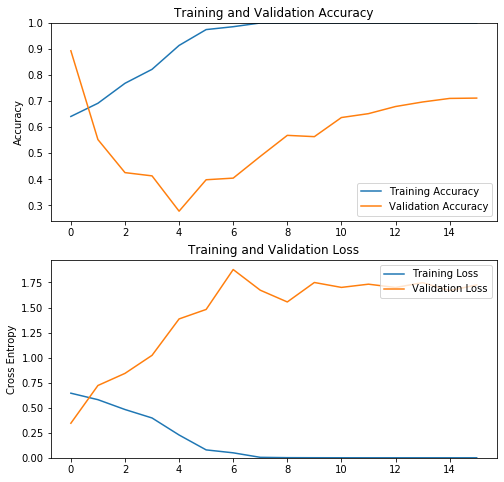

Training Acc:  [0.6409901813787472, 0.6916055871958621, 0.768220163334654, 0.8218780252683247, 0.9135665883168592, 0.9744157101616393, 0.9854791868344628, 0.9997234130825612, 0.9998617065412806, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]



Evaluating model on test set...
Result on test set: 57.44%
Run 3...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 246s - loss: 0.5801 - acc: 0.6902 - val_loss: 1.9757 - val_acc: 0.1032

Epoch 00001: val_loss improved from inf to 1.97573, saving model to checkpoints/GRAZ_pCNN__run_3.h5
Epoch 2/100
 - 244s - loss: 0.5368 - acc: 0.7305 - val_loss: 0.6351 - val_acc: 0.6231

Epoch 00002: val_loss improved from 1.97573 to 0.63508, saving model to checkpoints/GRAZ_pCNN__run_3.h5
Epoch 3/100
 - 246s - loss: 0.3941 - acc: 0.8233 - val_loss: 1.3296 - val_acc: 0.2873

Epoch 00003: val_loss did not improve from 0.63508
Epoch 4/100
 - 246s - loss: 0.2760 - acc: 0.8834 - val_loss: 1.9563 - val_acc: 0.2388

Epoch 00004: val_loss did not improve from 0.6350

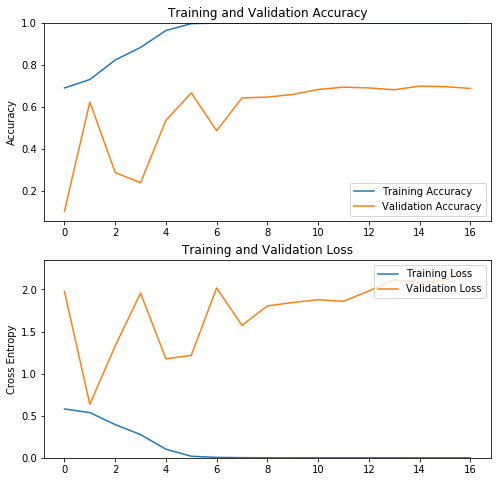

Training Acc:  [0.6902226526004251, 0.7304660490960142, 0.8232609598637617, 0.8834186142995436, 0.9639054072824789, 0.9965426635320149, 0.9990319457889641, 0.9998617065412806, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]



Evaluating model on test set...
Result on test set: 75.01%
Run 4...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 245s - loss: 0.4126 - acc: 0.8140 - val_loss: 0.3014 - val_acc: 0.8694

Epoch 00001: val_loss improved from inf to 0.30138, saving model to checkpoints/GRAZ_pCNN__run_4.h5
Epoch 2/100
 - 245s - loss: 0.2911 - acc: 0.8757 - val_loss: 0.6864 - val_acc: 0.6542

Epoch 00002: val_loss did not improve from 0.30138
Epoch 3/100
 - 248s - loss: 0.1092 - acc: 0.9634 - val_loss: 0.7844 - val_acc: 0.6928

Epoch 00003: val_loss did not improve from 0.30138
Epoch 4/100
 - 247s - loss: 0.0501 - acc: 0.9835 - val_loss: 0.6476 - val_acc: 0.7948

Epoch 00004: val_loss did not improve from 0.30138
Epoch 5/100
 - 247s - loss: 0.0077 - acc: 0.9986 - val_loss:

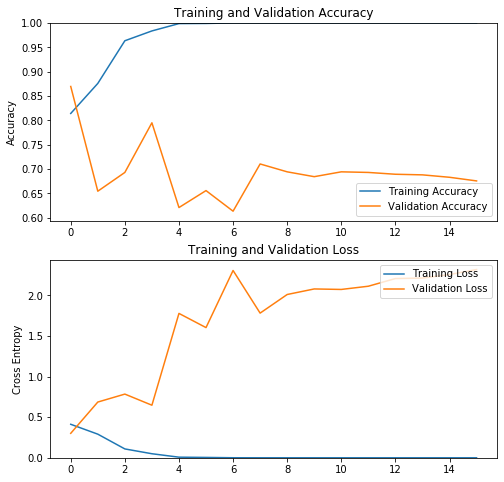

Training Acc:  [0.813995298088347, 0.8756741806936864, 0.9633522334476012, 0.9835430784123911, 0.9986170654128059, 0.9988936523302447, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]



Evaluating model on test set...
Result on test set: 71.78%
Run 5...
Train on 7232 samples, validate on 804 samples
Epoch 1/100
 - 248s - loss: 0.3685 - acc: 0.8309 - val_loss: 1.1259 - val_acc: 0.5211

Epoch 00001: val_loss improved from inf to 1.12587, saving model to checkpoints/GRAZ_pCNN__run_5.h5
Epoch 2/100
 - 248s - loss: 0.1551 - acc: 0.9369 - val_loss: 0.4545 - val_acc: 0.8097

Epoch 00002: val_loss improved from 1.12587 to 0.45450, saving model to checkpoints/GRAZ_pCNN__run_5.h5
Epoch 3/100
 - 248s - loss: 0.0407 - acc: 0.9881 - val_loss: 1.0827 - val_acc: 0.7127

Epoch 00003: val_loss did not improve from 0.45450
Epoch 4/100
 - 245s - loss: 0.0038 - acc: 0.9994 - val_loss: 2.1314 - val_acc: 0.5659

Epoch 00004: val_loss did not improve from 0.45450
Epoch 5/100
 - 245s - loss: 0.0012 - acc: 1

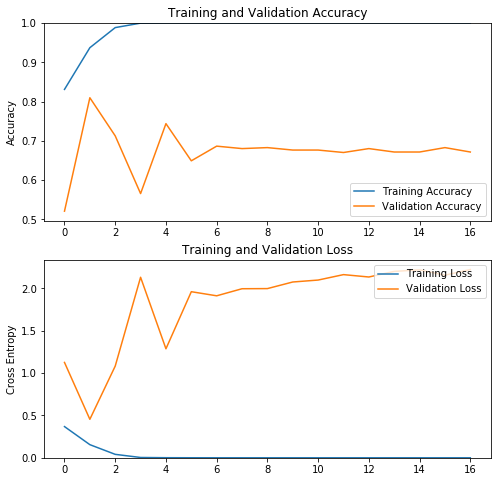

Training Acc:  [0.8308904867256637, 0.9369469026548672, 0.988108407079646, 0.9994469026548672, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]



Evaluating model on test set...
Result on test set: 83.72%
68.25% (+/- 11.29%)
Saving CV values to file....
CV values successfully saved!



In [0]:
from sklearn.model_selection import StratifiedKFold
from models import LSTM
import datetime
from keras.callbacks import ModelCheckpoint,TensorBoard,EarlyStopping


# define KFOLD-fold cross validation test harness
kfold = StratifiedKFold(n_splits = KFOLD, shuffle = True, random_state = SEED)
cvscores = []
history = []
ii = 1
for train, test in kfold.split(x_subject, y_subject[:, 0]):
    print('Run ' + str(ii) + '...')
    # create callbacks
    model_name_str = 'GRAZ_pCNN_' + \
                     '_run_' + str(ii)

    # initialize and create the model
    
    # fit model. If you specify monitor=True, then the model will create callbacks
    # and write its state to a HDF5 file
    train_data =  [x_subject[train], y_subject[train]]
    monitor_index = 'val_loss'
    h = run_model(model, model_name_str,100, train_data, 0.1, 256, monitor_index)
    save_model(model, model_name_str, '')
    draw_graphs(h)
    history.append(h)

    history.append(h)
    print ('Training Acc: ', h.history['acc'])
    print ('\n\n')
    # evaluate the model
    print('Evaluating model on test set...')
    scores = model.evaluate(x_subject[test], y_subject[test], verbose = 0)
    print("Result on test set: %.2f%%" % ( scores[1] * 100))
    cvscores.append(scores[1] * 100)
    ii += 1
    
try:
  # print some evaluation statistics and write results to file
  print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
  cv_all_subjects = np.asarray(cvscores)
  print('Saving CV values to file....')
  np.savetxt('GRAZ_CV_' + 'LSTM_' + str(DROPOUT) + 'do'+'.csv', 
              cv_all_subjects, delimiter = ',', fmt = '%2.4f')
  print('CV values successfully saved!\n')
except:
  print ('could not save')

In [0]:
pcnn_train_acc = [1, 1, 1, 1, 1]
cvscores = [53.31, 57.44, 75.01, 71.78, 83.72]

In [0]:
cap_df = pd.DataFrame(columns = ['Capacity (bits)', 'CV Train Acc', 'CV Test Acc'])
cap_df.loc['pCNN_og', 'CV Test Acc'] = np.mean(cvscores)
cap_df.loc['pCNN_og', 'Capacity (bits)'] = 53192
cap_df.loc['pCNN_og', 'CV Train Acc'] = np.mean(pcnn_train_acc)*100


In [0]:
cap_df

Capacity (bits) CV Train Acc CV Test Acc
pCNN_og           53192          100      68.252

## our pCNN 36450 bits

In [52]:
from kapre.time_frequency import Spectrogram
input_shape = x_subject.shape[1:]
model = Sequential()

# spectrogram creation using STFT
model.add(Spectrogram(n_dft = 128, n_hop = 16, input_shape = input_shape,
        return_decibel_spectrogram = False, power_spectrogram = 2.0,
        trainable_kernel = False, name = 'static_stft'))
model.add(Normalization2D(str_axis = 'freq'))

# Conv Block 1
model.add(Conv2D(filters = 20, kernel_size = (12, 12),
                strides = (1, 1), name = 'conv1',
                border_mode = 'same'))
model.add(BatchNormalization(axis = 1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2), padding = 'valid',
                      data_format = 'channels_last'))

# Conv Block 2
model.add(Conv2D(filters = 12, kernel_size = (8, 8),
                name = 'conv2', border_mode = 'same'))
model.add(BatchNormalization(axis = 1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid',
                      data_format = 'channels_last'))

# Conv Block 3
model.add(Conv2D(filters = 10, kernel_size = (4, 4),
                name = 'conv3', border_mode = 'same'))
model.add(BatchNormalization(axis = 1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2),
                      padding = 'valid',
                      data_format = 'channels_last'))
# model.add(Dropout(dropout))

# classificator
model.add(Flatten())
model.add(Dense(2))  # two classes only
model.add(Activation('softmax'))

# compile the model
model.compile(loss = 'categorical_crossentropy',
            optimizer = 'adam',
            metrics = ['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=20, kernel_size=(12, 12), strides=(1, 1), name="conv1", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=12, kernel_size=(8, 8), name="conv2", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=10, kernel_size=(4, 4), name="conv3", padding="same")`


In [53]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
static_stft (Spectrogram)    (None, 65, 63, 3)         16640     
_________________________________________________________________
normalization2d_2 (Normaliza (None, 65, 63, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 65, 63, 20)        8660      
_________________________________________________________________
batch_normalization_12 (Batc (None, 65, 63, 20)        260       
_________________________________________________________________
activation_25 (Activation)   (None, 65, 63, 20)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 31, 20)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 32, 31, 12)      

Run 1...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 148s - loss: 0.6905 - acc: 0.5710 - val_loss: 0.6460 - val_acc: 0.6580

Epoch 00001: val_loss improved from inf to 0.64598, saving model to checkpoints/GRAZ_pCNN__run_1.h5
Epoch 2/100
 - 147s - loss: 0.6116 - acc: 0.6681 - val_loss: 0.6732 - val_acc: 0.5697

Epoch 00002: val_loss did not improve from 0.64598
Epoch 3/100
 - 145s - loss: 0.4527 - acc: 0.7950 - val_loss: 0.3785 - val_acc: 0.8818

Epoch 00003: val_loss improved from 0.64598 to 0.37854, saving model to checkpoints/GRAZ_pCNN__run_1.h5
Epoch 4/100
 - 143s - loss: 0.2885 - acc: 0.8876 - val_loss: 0.4563 - val_acc: 0.8022

Epoch 00004: val_loss did not improve from 0.37854
Epoch 5/100
 - 142s - loss: 0.1389 - acc: 0.9634 - val_loss: 0.4288 - val_acc: 0.8346

Epoch 00005: val_loss did not improve from 0.37854
Epoch 6/100
 - 143s - loss: 0.0574 - acc: 0.9925 - val_loss: 0.4597 - val_acc: 0.7674

Epoch 00006: val_loss did not improve from 0.37854
Epoch 7/100
 -

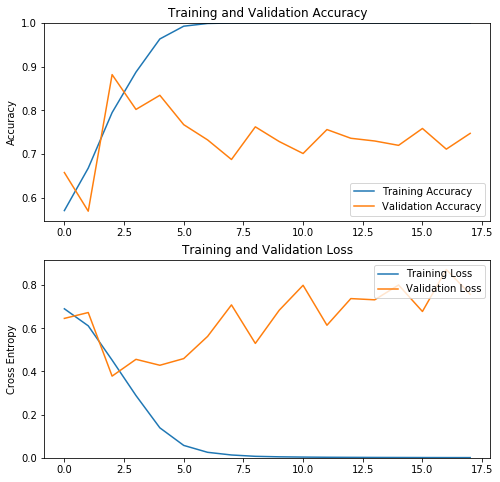

Training Acc:  [0.5710136912584866, 0.6680956992300495, 0.7950490942602747, 0.8875674181023404, 0.9633522334640872, 0.9925321532291522, 0.9987553588715253, 0.9998617065412806, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]



Evaluating model on test set...
Result on test set: 72.08%
Run 2...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 142s - loss: 0.3052 - acc: 0.8800 - val_loss: 1.3139 - val_acc: 0.4192

Epoch 00001: val_loss improved from inf to 1.31388, saving model to checkpoints/GRAZ_pCNN__run_2.h5
Epoch 2/100
 - 141s - loss: 0.1393 - acc: 0.9570 - val_loss: 0.9000 - val_acc: 0.6530

Epoch 00002: val_loss improved from 1.31388 to 0.90004, saving model to checkpoints/GRAZ_pCNN__run_2.h5
Epoch 3/100
 - 142s - loss: 0.0455 - acc: 0.9928 - val_loss: 0.6153 - val_acc: 0.7289

Epoch 00003: val_loss improved from 0.90004 to 0.61532, saving model to checkpoints/GRAZ_pCNN__run_2.h5
Epoch 4/100
 - 143s - loss: 0.0148 - acc: 0.9996 - val_loss: 0.5263 - val_acc: 0.7861



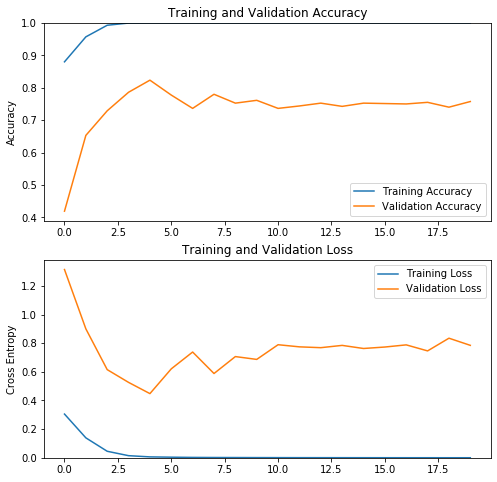

Training Acc:  [0.8799612778645303, 0.9569907343547517, 0.992808740146591, 0.9995851196238418, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]



Evaluating model on test set...
Result on test set: 95.32%
Run 3...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 142s - loss: 0.0052 - acc: 1.0000 - val_loss: 0.7533 - val_acc: 0.7164

Epoch 00001: val_loss improved from inf to 0.75332, saving model to checkpoints/GRAZ_pCNN__run_3.h5
Epoch 2/100
 - 142s - loss: 0.0031 - acc: 1.0000 - val_loss: 1.1380 - val_acc: 0.6306

Epoch 00002: val_loss did not improve from 0.75332
Epoch 3/100
 - 143s - loss: 0.0023 - acc: 1.0000 - val_loss: 1.0881 - val_acc: 0.6455

Epoch 00003: val_loss did not improve from 0.75332
Epoch 4/100
 - 142s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.8523 - val_acc: 0.7002

Epoch 00004: val_loss did not improve from 0.75332
Epoch 5/100
 - 141s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.8658 - val_acc: 0.7015

Epoch 00005: val_lo

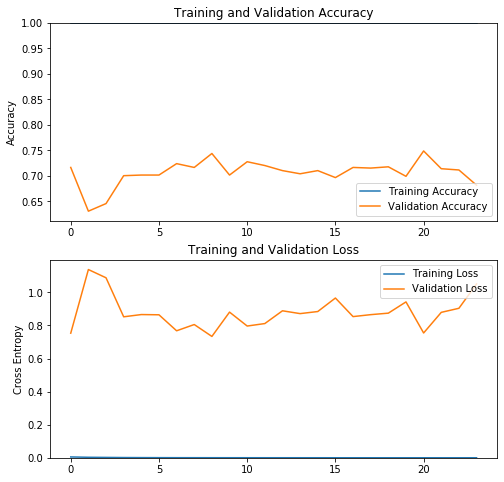

Training Acc:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]



Evaluating model on test set...
Result on test set: 97.36%
Run 4...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 141s - loss: 0.0026 - acc: 0.9997 - val_loss: 1.2030 - val_acc: 0.6443

Epoch 00001: val_loss improved from inf to 1.20298, saving model to checkpoints/GRAZ_pCNN__run_4.h5
Epoch 2/100
 - 141s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.9388 - val_acc: 0.7102

Epoch 00002: val_loss improved from 1.20298 to 0.93883, saving model to checkpoints/GRAZ_pCNN__run_4.h5
Epoch 3/100
 - 139s - loss: 6.9061e-04 - acc: 1.0000 - val_loss: 0.7993 - val_acc: 0.7400

Epoch 00003: val_loss improved from 0.93883 to 0.79928, saving model to checkpoints/GRAZ_pCNN__run_4.h5
Epoch 4/100
 - 139s - loss: 3.8715e-04 - acc: 1.0000 - val_loss: 0.8784 - val_acc: 0.7276

Epoch 00004: val_loss did not improve from 0.79928
Epoch 5/100
 - 137s - loss: 3.2

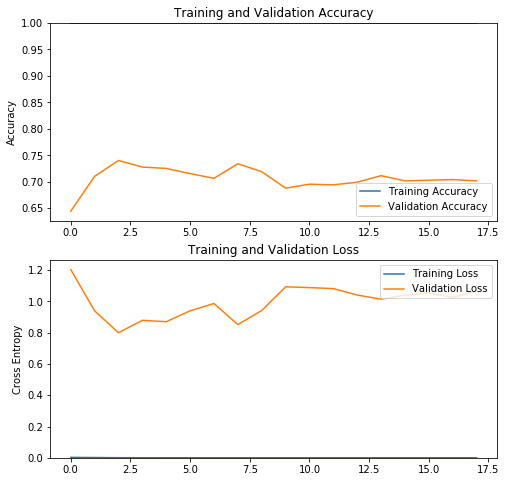

Training Acc:  [0.9997234130825612, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]



Evaluating model on test set...
Result on test set: 97.76%
Run 5...
Train on 7232 samples, validate on 804 samples
Epoch 1/100
 - 134s - loss: 4.4987e-04 - acc: 1.0000 - val_loss: 0.8034 - val_acc: 0.7475

Epoch 00001: val_loss improved from inf to 0.80341, saving model to checkpoints/GRAZ_pCNN__run_5.h5
Epoch 2/100
 - 135s - loss: 3.2792e-04 - acc: 1.0000 - val_loss: 0.7005 - val_acc: 0.7699

Epoch 00002: val_loss improved from 0.80341 to 0.70049, saving model to checkpoints/GRAZ_pCNN__run_5.h5
Epoch 3/100
 - 135s - loss: 2.7967e-04 - acc: 1.0000 - val_loss: 0.8076 - val_acc: 0.7488

Epoch 00003: val_loss did not improve from 0.70049
Epoch 4/100
 - 134s - loss: 2.3715e-04 - acc: 1.0000 - val_loss: 0.8206 - val_acc: 0.7438

Epoch 00004: val_loss did not improve from 0.70049
Epoch 5/100
 - 137s - loss: 1.9641e-04 - acc: 1.0000 - val_loss: 0.8809 - val_acc: 0.7351



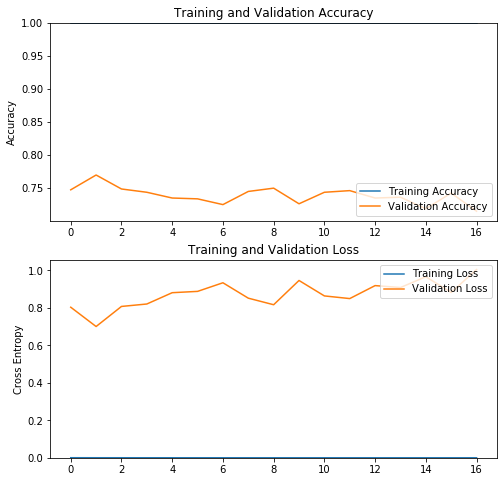

Training Acc:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]



Evaluating model on test set...
Result on test set: 97.11%


In [54]:
from sklearn.model_selection import StratifiedKFold
import datetime
from keras.callbacks import ModelCheckpoint,TensorBoard,EarlyStopping


# define KFOLD-fold cross validation test harness
kfold = StratifiedKFold(n_splits = KFOLD, shuffle = True, random_state = SEED)
cvscores = []
history = []
ii = 1
for train, test in kfold.split(x_subject, y_subject[:, 0]):
    print('Run ' + str(ii) + '...')
    # create callbacks
    model_name_str = 'GRAZ_pCNN_' + \
                     '_run_' + str(ii)

    # initialize and create the model
    
    # fit model. If you specify monitor=True, then the model will create callbacks
    # and write its state to a HDF5 file
    train_data =  [x_subject[train], y_subject[train]]
    monitor_index = 'val_loss'
    h = run_model(model, model_name_str,100, train_data, 0.1, 256, monitor_index)
    save_model(model, model_name_str, '')
    draw_graphs(h)
    history.append(h)

    history.append(h)
    print ('Training Acc: ', h.history['acc'])
    print ('\n\n')
    # evaluate the model
    print('Evaluating model on test set...')
    scores = model.evaluate(x_subject[test], y_subject[test], verbose = 0)
    print("Result on test set: %.2f%%" % ( scores[1] * 100))
    cvscores.append(scores[1] * 100)
    ii += 1


In [19]:
train_acc = [1, 1, 1, 1, 1]
cvscores = [72.08, 95.32, 97.36, 97.76, 97.11]
print ('testscores: ', np.mean(cvscores))
print('trainscores: ', np.mean(train_acc)*100)

testscores:  91.926
trainscores:  100.0


## our pCNN 18418 bits

In [20]:
from kapre.time_frequency import Spectrogram
input_shape = x_subject.shape[1:]
model = Sequential()

# spectrogram creation using STFT
model.add(Spectrogram(n_dft = 64, n_hop = 16, input_shape = input_shape,
        return_decibel_spectrogram = False, power_spectrogram = 2.0,
        trainable_kernel = False, name = 'static_stft'))
model.add(Normalization2D(str_axis = 'freq'))

# Conv Block 1
model.add(Conv2D(filters = 20, kernel_size = (12, 12),
                strides = (1, 1), name = 'conv1',
                border_mode = 'same'))
model.add(BatchNormalization(axis = 1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2), padding = 'valid',
                      data_format = 'channels_last'))

# Conv Block 2
model.add(Conv2D(filters = 12, kernel_size = (8, 8),
                name = 'conv2', border_mode = 'same'))
model.add(BatchNormalization(axis = 1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid',
                      data_format = 'channels_last'))

# Conv Block 3
model.add(Conv2D(filters = 10, kernel_size = (4, 4),
                name = 'conv3', border_mode = 'same'))
model.add(BatchNormalization(axis = 1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2),
                      padding = 'valid',
                      data_format = 'channels_last'))
# model.add(Dropout(dropout))

# classificator
model.add(Flatten())
model.add(Dense(2))  # two classes only
model.add(Activation('softmax'))

# compile the model
model.compile(loss = 'categorical_crossentropy',
            optimizer = 'adam',
            metrics = ['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=20, kernel_size=(12, 12), strides=(1, 1), name="conv1", padding="same")`
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=12, kernel_size=(8, 8), name="conv2", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=10, kernel_size=(4, 4), name="conv3", padding="same")`


In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
static_stft (Spectrogram)    (None, 33, 63, 3)         4224      
_________________________________________________________________
normalization2d_1 (Normaliza (None, 33, 63, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 33, 63, 20)        8660      
_________________________________________________________________
batch_normalization_1 (Batch (None, 33, 63, 20)        132       
_________________________________________________________________
activation_1 (Activation)    (None, 33, 63, 20)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 31, 20)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 16, 31, 12)       

Run 1...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 83s - loss: 0.7110 - acc: 0.5562 - val_loss: 0.7394 - val_acc: 0.3818

Epoch 00001: val_loss improved from inf to 0.73937, saving model to checkpoints/GRAZ_pCNN__run_1.h5
Epoch 2/100
 - 82s - loss: 0.6231 - acc: 0.6483 - val_loss: 0.5929 - val_acc: 0.7040

Epoch 00002: val_loss improved from 0.73937 to 0.59288, saving model to checkpoints/GRAZ_pCNN__run_1.h5
Epoch 3/100
 - 82s - loss: 0.4898 - acc: 0.7697 - val_loss: 0.5686 - val_acc: 0.7239

Epoch 00003: val_loss improved from 0.59288 to 0.56865, saving model to checkpoints/GRAZ_pCNN__run_1.h5
Epoch 4/100
 - 82s - loss: 0.3080 - acc: 0.8801 - val_loss: 0.9377 - val_acc: 0.3433

Epoch 00004: val_loss did not improve from 0.56865
Epoch 5/100
 - 82s - loss: 0.1764 - acc: 0.9443 - val_loss: 0.9428 - val_acc: 0.4366

Epoch 00005: val_loss did not improve from 0.56865
Epoch 6/

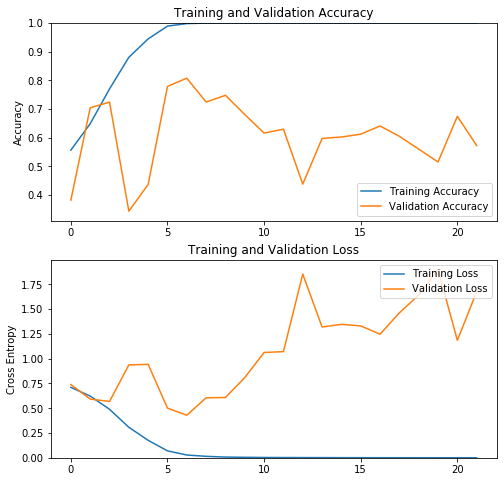

Training Acc:  [0.5562162911260529, 0.6483197346084462, 0.769741391322867, 0.8800995713150067, 0.9442677361608096, 0.9889365233106907, 0.9976490112017702, 0.9994468261651224, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]



Evaluating model on test set...
Result on test set: 86.31%
Run 2...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 82s - loss: 0.0319 - acc: 0.9936 - val_loss: 0.2460 - val_acc: 0.8993

Epoch 00001: val_loss improved from inf to 0.24601, saving model to checkpoints/GRAZ_pCNN__run_2.h5
Epoch 2/100
 - 83s - loss: 0.0337 - acc: 0.9935 - val_loss: 0.6687 - val_acc: 0.7823

Epoch 00002: val_loss did not improve from 0.24601
Epoch 3/100
 - 83s - loss: 0.0096 - acc: 0.9986 - val_loss: 2.2051 - val_acc: 0.4764

Epoch 00003: val_loss did not improve from 0.24601
Epoch 4/100
 - 83s - loss: 0.0039 - acc: 0.9999 - val_loss: 2.6582 - val_acc: 0.3769

Epoch 00004: val_loss did not improve from 0.24601
Epoch 5/100
 - 83s - loss: 0.0016 - acc:

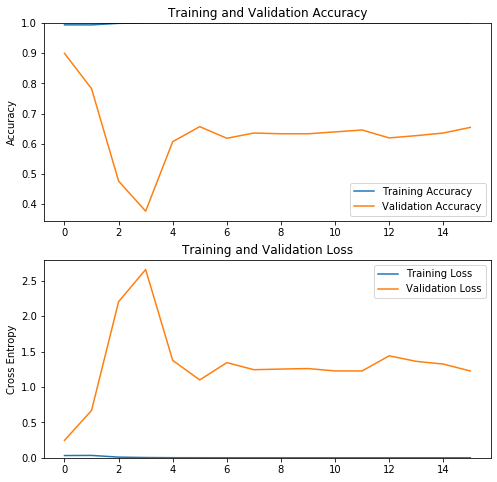

Training Acc:  [0.9936385008989075, 0.9935002074401881, 0.9986170654128059, 0.9998617065412806, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]



Evaluating model on test set...
Result on test set: 81.68%
Run 3...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 81s - loss: 0.1294 - acc: 0.9546 - val_loss: 0.8219 - val_acc: 0.7562

Epoch 00001: val_loss improved from inf to 0.82191, saving model to checkpoints/GRAZ_pCNN__run_3.h5
Epoch 2/100
 - 81s - loss: 0.0252 - acc: 0.9952 - val_loss: 2.5365 - val_acc: 0.3806

Epoch 00002: val_loss did not improve from 0.82191
Epoch 3/100
 - 80s - loss: 0.0054 - acc: 1.0000 - val_loss: 1.4498 - val_acc: 0.5970

Epoch 00003: val_loss did not improve from 0.82191
Epoch 4/100
 - 81s - loss: 0.0025 - acc: 1.0000 - val_loss: 1.2005 - val_acc: 0.6318

Epoch 00004: val_loss did not improve from 0.82191
Epoch 5/100
 - 80s - loss: 0.0015 - acc: 1.0000 - val_loss: 1.4747 - val_acc: 0.5945

Epoch 00005: val_loss did not improve from 

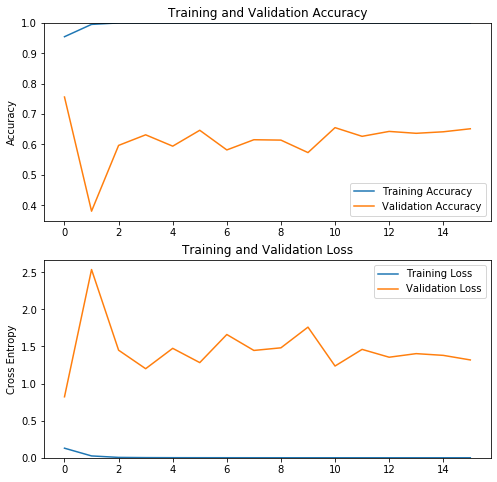

Training Acc:  [0.9546397455482789, 0.995159728944821, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]



Evaluating model on test set...
Result on test set: 93.73%
Run 4...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 79s - loss: 0.0202 - acc: 0.9978 - val_loss: 0.4655 - val_acc: 0.8346

Epoch 00001: val_loss improved from inf to 0.46553, saving model to checkpoints/GRAZ_pCNN__run_4.h5
Epoch 2/100
 - 79s - loss: 0.0050 - acc: 0.9999 - val_loss: 0.9076 - val_acc: 0.7114

Epoch 00002: val_loss did not improve from 0.46553
Epoch 3/100
 - 79s - loss: 0.0024 - acc: 1.0000 - val_loss: 1.2510 - val_acc: 0.6281

Epoch 00003: val_loss did not improve from 0.46553
Epoch 4/100
 - 79s - loss: 0.0017 - acc: 1.0000 - val_loss: 1.2555 - val_acc: 0.6318

Epoch 00004: val_loss did not improve from 0.46553
Epoch 5/100
 - 79s - loss: 9.3537e-04 - acc: 1.0000 - val_loss: 1.9832 - val_acc: 0.5075

Epoch 00005: val_loss did not improve from 0.46553
Epoch 6/100
 - 79s 

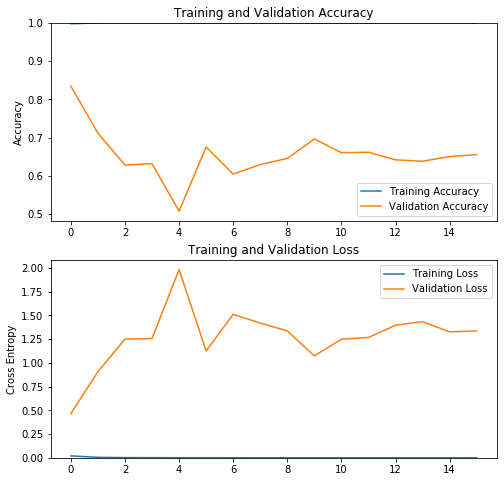

Training Acc:  [0.9977873046604896, 0.9998617065412806, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]



Evaluating model on test set...
Result on test set: 95.17%
Run 5...
Train on 7232 samples, validate on 804 samples
Epoch 1/100
 - 79s - loss: 0.0052 - acc: 0.9999 - val_loss: 0.9220 - val_acc: 0.7015

Epoch 00001: val_loss improved from inf to 0.92196, saving model to checkpoints/GRAZ_pCNN__run_5.h5
Epoch 2/100
 - 79s - loss: 0.0090 - acc: 0.9979 - val_loss: 1.3039 - val_acc: 0.6269

Epoch 00002: val_loss did not improve from 0.92196
Epoch 3/100
 - 79s - loss: 0.0343 - acc: 0.9913 - val_loss: 1.5433 - val_acc: 0.5535

Epoch 00003: val_loss did not improve from 0.92196
Epoch 4/100
 - 79s - loss: 0.0064 - acc: 0.9996 - val_loss: 2.8863 - val_acc: 0.3955

Epoch 00004: val_loss did not improve from 0.92196
Epoch 5/100
 - 79s - loss: 0.0013 - acc: 1.0000 - val_loss: 1.6773 - val_acc: 0.5597

Epoch 00005: val_loss did not improve from 0.92196
Epoch 6/100
 - 78s - l

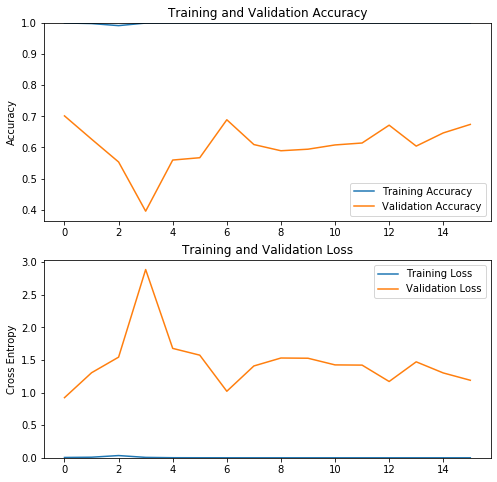

Training Acc:  [0.9998617256637168, 0.9979258849557522, 0.9912887168141593, 0.9995851769911505, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]



Evaluating model on test set...
Result on test set: 95.87%


In [22]:
from sklearn.model_selection import StratifiedKFold
import datetime
from keras.callbacks import ModelCheckpoint,TensorBoard,EarlyStopping


# define KFOLD-fold cross validation test harness
kfold = StratifiedKFold(n_splits = KFOLD, shuffle = True, random_state = SEED)
cvscores = []
history = []
ii = 1
for train, test in kfold.split(x_subject, y_subject[:, 0]):
    print('Run ' + str(ii) + '...')
    # create callbacks
    model_name_str = 'GRAZ_pCNN_' + \
                     '_run_' + str(ii)

    # initialize and create the model
    
    # fit model. If you specify monitor=True, then the model will create callbacks
    # and write its state to a HDF5 file
    train_data =  [x_subject[train], y_subject[train]]
    monitor_index = 'val_loss'
    h = run_model(model, model_name_str,100, train_data, 0.1, 256, monitor_index)
    save_model(model, model_name_str, '')
    draw_graphs(h)
    history.append(h)

    history.append(h)
    print ('Training Acc: ', h.history['acc'])
    print ('\n\n')
    # evaluate the model
    print('Evaluating model on test set...')
    scores = model.evaluate(x_subject[test], y_subject[test], verbose = 0)
    print("Result on test set: %.2f%%" % ( scores[1] * 100))
    cvscores.append(scores[1] * 100)
    ii += 1


In [24]:
import numpy as np
train_acc = [1, 1, 1, 1, 1]
cvscores = [95.87, 95.17, 93.73, 81.68, 86.31]

print ('testscores: ', np.mean(cvscores))
print('trainscores: ', np.mean(train_acc)*100)

testscores:  90.552
trainscores:  100.0


## our pCNN 9346 bits

In [31]:
input_shape = x_subject.shape[1:]
model = Sequential()

# spectrogram creation using STFT
model.add(Spectrogram(n_dft = 64, n_hop = 16, input_shape = input_shape,
        return_decibel_spectrogram = False, power_spectrogram = 2.0,
        trainable_kernel = False, name = 'static_stft'))
model.add(Normalization2D(str_axis = 'freq'))

# Conv Block 1
model.add(Conv2D(filters = 20,  kernel_size = (6, 6),
                 strides = (1, 1), name = 'conv1',
                border_mode = 'same'))
model.add(BatchNormalization(axis = 1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2), padding = 'valid',
                      data_format = 'channels_last'))

# Conv Block 2
model.add(Conv2D(filters = 12, kernel_size = (3, 3),
                name = 'conv2', border_mode = 'same'))
model.add(BatchNormalization(axis = 1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid',
                      data_format = 'channels_last'))


# # Conv Block 3
model.add(Conv2D(filters = 10, kernel_size = (2, 2),
                name = 'conv3', border_mode = 'same'))
model.add(BatchNormalization(axis = 1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2),
                      padding = 'valid',
                      data_format = 'channels_last'))
# model.add(Dropout(dropout))


# classificator
model.add(Flatten())
model.add(Dense(2))  # two classes only
model.add(Activation('softmax'))

# compile the model
model.compile(loss = 'categorical_crossentropy',
            optimizer = 'adam',
            metrics = ['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=20, kernel_size=(6, 6), strides=(1, 1), name="conv1", padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=12, kernel_size=(3, 3), name="conv2", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=10, kernel_size=(2, 2), name="conv3", padding="same")`


In [32]:
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
static_stft (Spectrogram)    (None, 33, 63, 3)         4224      
_________________________________________________________________
normalization2d_6 (Normaliza (None, 33, 63, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 33, 63, 20)        2180      
_________________________________________________________________
batch_normalization_16 (Batc (None, 33, 63, 20)        132       
_________________________________________________________________
activation_21 (Activation)   (None, 33, 63, 20)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 31, 20)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 16, 31, 12)       

Run 1...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 29s - loss: 0.7298 - acc: 0.5616 - val_loss: 0.7520 - val_acc: 0.4353

Epoch 00001: val_loss improved from inf to 0.75198, saving model to checkpoints/GRAZ_pCNN__run_1.h5
Epoch 2/100
 - 27s - loss: 0.6418 - acc: 0.6313 - val_loss: 0.8157 - val_acc: 0.3470

Epoch 00002: val_loss did not improve from 0.75198
Epoch 3/100
 - 27s - loss: 0.5832 - acc: 0.6953 - val_loss: 0.7115 - val_acc: 0.5423

Epoch 00003: val_loss improved from 0.75198 to 0.71149, saving model to checkpoints/GRAZ_pCNN__run_1.h5
Epoch 4/100
 - 27s - loss: 0.4850 - acc: 0.7733 - val_loss: 0.9606 - val_acc: 0.3259

Epoch 00004: val_loss did not improve from 0.71149
Epoch 5/100
 - 27s - loss: 0.3817 - acc: 0.8374 - val_loss: 0.8744 - val_acc: 0.4055

Epoch 00005: val_loss did not improve from 0.71149
Epoch 6/100
 - 27s - loss: 0.2975 - acc: 0.8804 - val_loss: 0.5958 - val_acc: 0.6791

Epoch 00006: val_loss improved from 0.71149 to 0.59584, saving model to

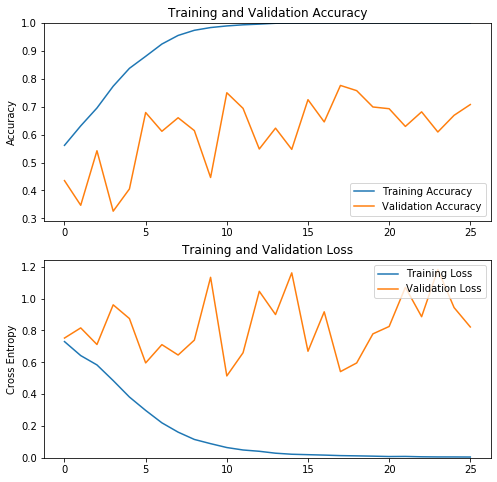

Training Acc:  [0.56160973607381, 0.6313096392354173, 0.6953395105730431, 0.7733370212495715, 0.837366892620169, 0.8803761582571744, 0.9243534780969727, 0.9551929194161283, 0.973585949392837, 0.9834047849784004, 0.9892131102198866, 0.9932236205227493, 0.9957129027796985, 0.9987553588797683, 0.9994468261651224, 0.9994468261651224, 0.9997234130825612, 0.9998617065412806, 0.9997234130825612, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]



Evaluating model on test set...
Result on test set: 86.96%
Run 2...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 28s - loss: 0.0650 - acc: 0.9867 - val_loss: 1.3689 - val_acc: 0.4975

Epoch 00001: val_loss improved from inf to 1.36885, saving model to checkpoints/GRAZ_pCNN__run_2.h5
Epoch 2/100
 - 28s - loss: 0.0490 - acc: 0.9909 - val_loss: 2.0520 - val_acc: 0.3321

Epoch 00002: val_loss did not improve from 1.36885
Epoch 3/100
 - 28s - loss: 0.0368 - acc: 0.9952 - val_loss: 1.9784 - val_acc: 0.3607

Epoch 00003: val_loss did not improve from 1.3

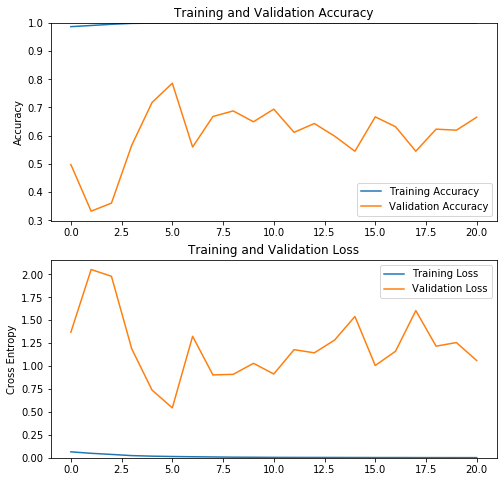

Training Acc:  [0.9867238279711803, 0.9908726317327624, 0.9951597289530638, 0.9983404784953672, 0.9991702392476836, 0.9997234130825612, 0.9998617065412806, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]



Evaluating model on test set...
Result on test set: 88.05%
Run 3...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 28s - loss: 0.0155 - acc: 0.9986 - val_loss: 1.4517 - val_acc: 0.5510

Epoch 00001: val_loss improved from inf to 1.45166, saving model to checkpoints/GRAZ_pCNN__run_3.h5
Epoch 2/100
 - 28s - loss: 0.0086 - acc: 1.0000 - val_loss: 1.2328 - val_acc: 0.6020

Epoch 00002: val_loss improved from 1.45166 to 1.23280, saving model to checkpoints/GRAZ_pCNN__run_3.h5
Epoch 3/100
 - 28s - loss: 0.0078 - acc: 0.9999 - val_loss: 1.0158 - val_acc: 0.6629

Epoch 00003: val_loss improved from 1.23280 to 1.01580, saving model to checkpoints/GRAZ_pCNN__run_3.h5
Epoch 4/100
 - 28s - loss: 0.0059 - acc: 1.0000 - val_loss: 1.4227 - val_acc: 0.5709

Epoc

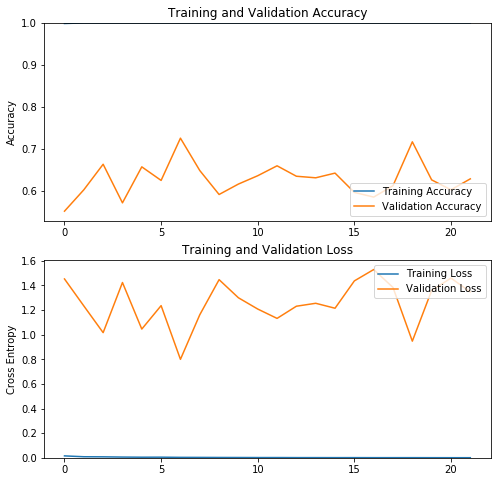

Training Acc:  [0.9986170654128059, 1.0, 0.9998617065412806, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]



Evaluating model on test set...
Result on test set: 93.23%
Run 4...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 28s - loss: 0.0041 - acc: 0.9999 - val_loss: 0.7536 - val_acc: 0.7500

Epoch 00001: val_loss improved from inf to 0.75363, saving model to checkpoints/GRAZ_pCNN__run_4.h5
Epoch 2/100
 - 28s - loss: 0.1522 - acc: 0.9465 - val_loss: 1.6461 - val_acc: 0.5547

Epoch 00002: val_loss did not improve from 0.75363
Epoch 3/100
 - 28s - loss: 0.0277 - acc: 0.9942 - val_loss: 1.1641 - val_acc: 0.6629

Epoch 00003: val_loss did not improve from 0.75363
Epoch 4/100
 - 28s - loss: 0.0085 - acc: 0.9997 - val_loss: 1.1654 - val_acc: 0.6430

Epoch 00004: val_loss did not improve from 0.75363
Epoch 5/100
 - 28s - loss: 0.0046 - acc: 1.0000 - val_loss: 1.0508 - val_acc: 0.6828

Epoch 00005: val_loss did not improve from 

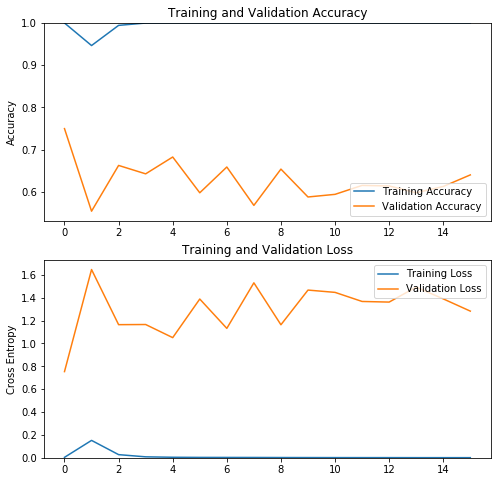

Training Acc:  [0.9998617065412806, 0.9464804314755912, 0.9941916747337851, 0.9997234130825612, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]



Evaluating model on test set...
Result on test set: 90.54%
Run 5...
Train on 7232 samples, validate on 804 samples
Epoch 1/100
 - 28s - loss: 0.0062 - acc: 0.9996 - val_loss: 2.1220 - val_acc: 0.4465

Epoch 00001: val_loss improved from inf to 2.12199, saving model to checkpoints/GRAZ_pCNN__run_5.h5
Epoch 2/100
 - 28s - loss: 0.0051 - acc: 1.0000 - val_loss: 1.3036 - val_acc: 0.5771

Epoch 00002: val_loss improved from 2.12199 to 1.30356, saving model to checkpoints/GRAZ_pCNN__run_5.h5
Epoch 3/100
 - 28s - loss: 0.0027 - acc: 1.0000 - val_loss: 1.3725 - val_acc: 0.5746

Epoch 00003: val_loss did not improve from 1.30356
Epoch 4/100
 - 28s - loss: 0.0023 - acc: 1.0000 - val_loss: 1.3478 - val_acc: 0.5933

Epoch 00004: val_loss did not improve from 1.30356
Epoch 5/100
 - 28s - loss: 0.0018 - acc: 1.0000 - val_loss: 1.3606 - val_acc

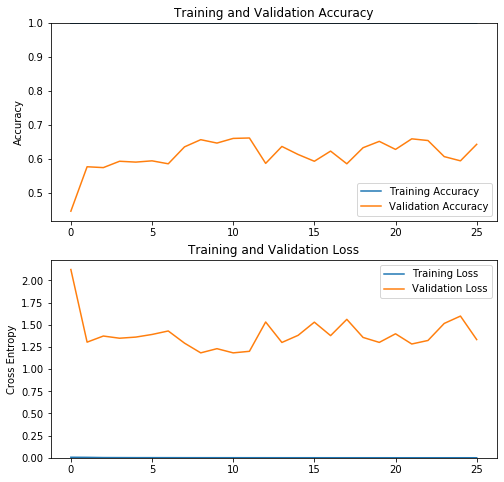

Training Acc:  [0.9995851769911505, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]



Evaluating model on test set...
Result on test set: 93.33%


In [33]:
from sklearn.model_selection import StratifiedKFold
import datetime
from keras.callbacks import ModelCheckpoint,TensorBoard,EarlyStopping


# define KFOLD-fold cross validation test harness
kfold = StratifiedKFold(n_splits = KFOLD, shuffle = True, random_state = SEED)
cvscores = []
history = []
ii = 1
for train, test in kfold.split(x_subject, y_subject[:, 0]):
    print('Run ' + str(ii) + '...')
    # create callbacks
    model_name_str = 'GRAZ_pCNN_' + \
                     '_run_' + str(ii)

    # initialize and create the model
    
    # fit model. If you specify monitor=True, then the model will create callbacks
    # and write its state to a HDF5 file
    train_data =  [x_subject[train], y_subject[train]]
    monitor_index = 'val_loss'
    h = run_model(model, model_name_str,100, train_data, 0.1, 256, monitor_index)
    save_model(model, model_name_str, '')
    draw_graphs(h)
    history.append(h)

    history.append(h)
    print ('Training Acc: ', h.history['acc'])
    print ('\n\n')
    # evaluate the model
    print('Evaluating model on test set...')
    scores = model.evaluate(x_subject[test], y_subject[test], verbose = 0)
    print("Result on test set: %.2f%%" % ( scores[1] * 100))
    cvscores.append(scores[1] * 100)
    ii += 1


In [34]:
train_acc = [1, 1, 1, 1, 1]

print ('testscores: ', np.mean(cvscores))
print('trainscores: ', np.mean(train_acc)*100)

testscores:  90.4224317223996
trainscores:  100.0


## our pCNN  3670 bits

In [0]:
input_shape = x_subject.shape[1:]
model = Sequential()

# spectrogram creation using STFT
model.add(Spectrogram(n_dft = 32, n_hop = 16, input_shape = input_shape,
        return_decibel_spectrogram = False, power_spectrogram = 2.0,
        trainable_kernel = False, name = 'static_stft'))
model.add(Normalization2D(str_axis = 'freq'))

# Conv Block 1
model.add(Conv2D(filters = 20,  kernel_size = (4, 4),
                strides = (1, 1), name = 'conv1',
                border_mode = 'same'))
model.add(BatchNormalization(axis = 1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2), padding = 'valid',
                      data_format = 'channels_last'))

# Conv Block 2
model.add(Conv2D(filters = 12, kernel_size = (2, 2),
                name = 'conv2', border_mode = 'same'))
model.add(BatchNormalization(axis = 1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid',
                      data_format = 'channels_last'))


# # Conv Block 3
model.add(Conv2D(filters = 10, kernel_size = (2, 2),
                name = 'conv3', border_mode = 'same'))
model.add(BatchNormalization(axis = 1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2),
                      padding = 'valid',
                      data_format = 'channels_last'))
# model.add(Dropout(dropout))
model.summary()

# classificator
model.add(Flatten())
model.add(Dense(2))  # two classes only
model.add(Activation('softmax'))

# compile the model
model.compile(loss = 'categorical_crossentropy',
            optimizer = 'adam',
            metrics = ['accuracy'])

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=20, kernel_size=(4, 4), strides=(1, 1), name="conv1", padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=12, kernel_size=(2, 2), name="conv2", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=10, kernel_size=(2, 2), name="conv3", padding="same")`


Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
static_stft (Spectrogram)    (None, 17, 63, 3)         1088      
_________________________________________________________________
normalization2d_25 (Normaliz (None, 17, 63, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 17, 63, 20)        980       
_________________________________________________________________
batch_normalization_54 (Batc (None, 17, 63, 20)        68        
_________________________________________________________________
activation_61 (Activation)   (None, 17, 63, 20)        0         
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 8, 31, 20)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 8, 31, 12)       

Run 1...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 15s - loss: 0.7080 - acc: 0.5405 - val_loss: 0.8229 - val_acc: 0.2998

Epoch 00001: val_loss improved from inf to 0.82292, saving model to checkpoints/GRAZ_pCNN__run_1.h5
Epoch 2/100
 - 10s - loss: 0.6677 - acc: 0.5876 - val_loss: 0.8815 - val_acc: 0.1841

Epoch 00002: val_loss did not improve from 0.82292
Epoch 3/100
 - 10s - loss: 0.6439 - acc: 0.6338 - val_loss: 0.6927 - val_acc: 0.5398

Epoch 00003: val_loss improved from 0.82292 to 0.69270, saving model to checkpoints/GRAZ_pCNN__run_1.h5
Epoch 4/100
 - 10s - loss: 0.6069 - acc: 0.6804 - val_loss: 0.6190 - val_acc: 0.6853

Epoch 00004: val_loss improved from 0.69270 to 0.61901, saving model to checkpoints/GRAZ_pCNN__run_1.h5
Epoch 5/100
 - 10s - loss: 0.5498 - acc: 0.7295 - val_loss: 0.4953 - val_acc: 0.8234

Epoch 00005: val_loss improved from 0.61901 to 0.49530, sav

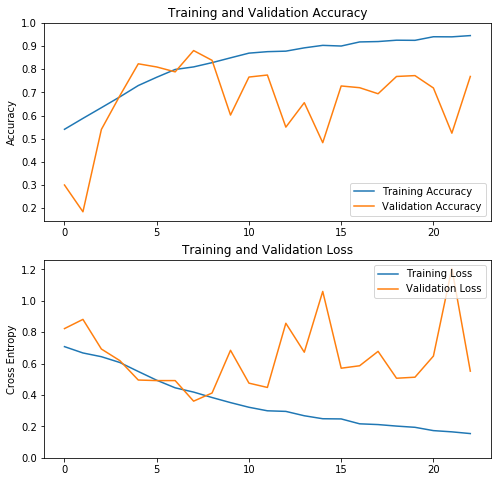

Training Acc:  [0.5404508368732557, 0.5876089062965719, 0.633798921442909, 0.6804038170725623, 0.7294979949014643, 0.7653160006768178, 0.7989213111538755, 0.8099847878184561, 0.8283778178363795, 0.8491218365948323, 0.8694509750513133, 0.8758124741111911, 0.8780251694424587, 0.8922693956905571, 0.9030562854953993, 0.9001521228293201, 0.9178536855536465, 0.9195132070912512, 0.9253215323244943, 0.9247683585225884, 0.940257225849704, 0.9398423454900316, 0.9452357904048171]



Evaluating model on test set...
Result on test set: 73.07%
Run 2...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 10s - loss: 0.4025 - acc: 0.8163 - val_loss: 0.4900 - val_acc: 0.7649

Epoch 00001: val_loss improved from inf to 0.49003, saving model to checkpoints/GRAZ_pCNN__run_2.h5
Epoch 2/100
 - 10s - loss: 0.3786 - acc: 0.8367 - val_loss: 0.6154 - val_acc: 0.6878

Epoch 00002: val_loss did not improve from 0.49003
Epoch 3/100
 - 10s - loss: 0.3583 - acc: 0.8465 - val_loss: 0.6173 - val_acc: 0.6791


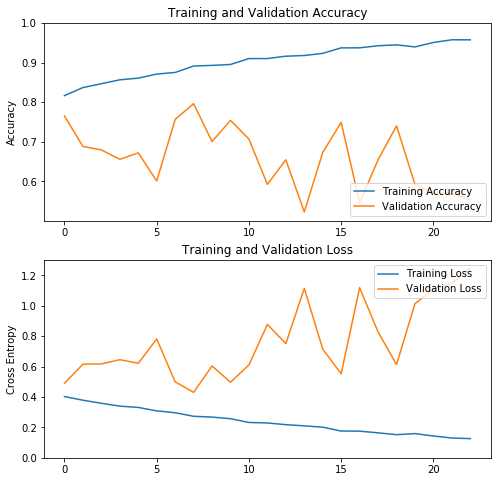

Training Acc:  [0.8163462869195486, 0.8366754253430578, 0.8464942608874066, 0.856313096481213, 0.8604619001933375, 0.8708339096137785, 0.8748444198919124, 0.8911630480455307, 0.89268427610793, 0.8950352648567023, 0.9099709584148836, 0.9099709584396124, 0.9159175771810326, 0.9177153921114131, 0.9231088369849839, 0.93693818287341, 0.9370764762909147, 0.942331627730495, 0.9445443231029772, 0.9394274651303592, 0.9506292352454162, 0.9574056147638816, 0.9572673212639475]



Evaluating model on test set...
Result on test set: 79.44%
Run 3...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 11s - loss: 0.2813 - acc: 0.8836 - val_loss: 0.8195 - val_acc: 0.6206

Epoch 00001: val_loss improved from inf to 0.81946, saving model to checkpoints/GRAZ_pCNN__run_3.h5
Epoch 2/100
 - 11s - loss: 0.2553 - acc: 0.8981 - val_loss: 0.6319 - val_acc: 0.7015

Epoch 00002: val_loss improved from 0.81946 to 0.63192, saving model to checkpoints/GRAZ_pCNN__run_3.h5
Epoch 3/100
 - 11s - loss: 0.2414 - 

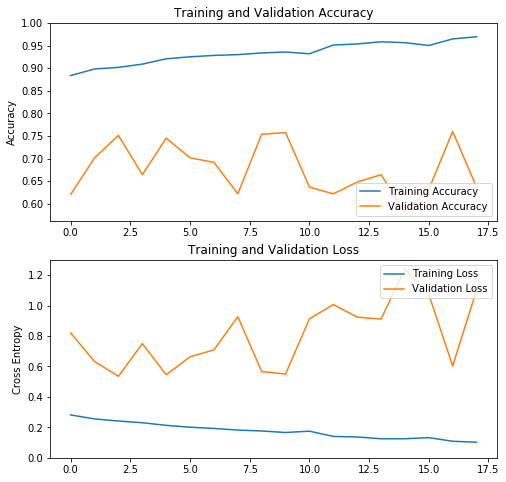

Training Acc:  [0.8835569078324494, 0.8980777209732579, 0.9016733508834766, 0.9088646107533713, 0.9206195547610064, 0.9250449454152985, 0.9280874015236112, 0.9298852164539917, 0.9336191398723873, 0.9355552482367584, 0.9318213248843062, 0.9510441156875179, 0.9535333978867666, 0.9582353754997122, 0.9562992670776406, 0.9500760614270245, 0.9645968746008047, 0.9692988521725355]



Evaluating model on test set...
Result on test set: 81.33%
Run 4...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 10s - loss: 0.2436 - acc: 0.9014 - val_loss: 1.0808 - val_acc: 0.5373

Epoch 00001: val_loss improved from inf to 1.08081, saving model to checkpoints/GRAZ_pCNN__run_4.h5
Epoch 2/100
 - 10s - loss: 0.2341 - acc: 0.9051 - val_loss: 0.8650 - val_acc: 0.6032

Epoch 00002: val_loss improved from 1.08081 to 0.86501, saving model to checkpoints/GRAZ_pCNN__run_4.h5
Epoch 3/100
 - 10s - loss: 0.2175 - acc: 0.9156 - val_loss: 0.5750 - val_acc: 0.7276

Epoch 00003: val_loss improved from 0.86501 

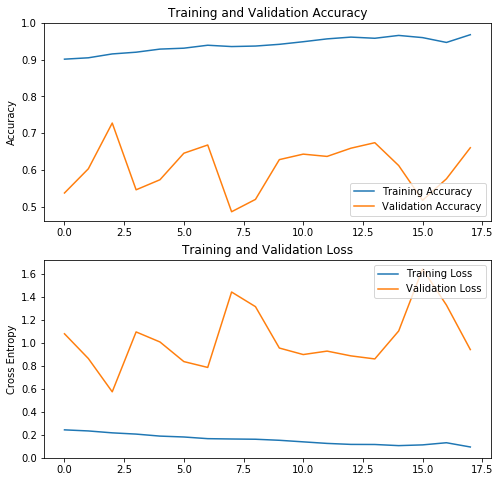

Training Acc:  [0.9013967639742806, 0.9051306873514615, 0.9156409902306221, 0.9203429678105959, 0.9287788688007224, 0.9312681510246998, 0.939289171655154, 0.9356935417366925, 0.9370764763403724, 0.9417784538956174, 0.948831420282064, 0.9565758539785935, 0.9614161250420155, 0.9582353754914692, 0.9659798091879988, 0.9600331904795503, 0.9468953118599923, 0.9679159175935844]



Evaluating model on test set...
Result on test set: 83.08%
Run 5...
Train on 7232 samples, validate on 804 samples
Epoch 1/100
 - 11s - loss: 0.2099 - acc: 0.9188 - val_loss: 0.8620 - val_acc: 0.6206

Epoch 00001: val_loss improved from inf to 0.86203, saving model to checkpoints/GRAZ_pCNN__run_5.h5
Epoch 2/100
 - 11s - loss: 0.1982 - acc: 0.9245 - val_loss: 0.9444 - val_acc: 0.6082

Epoch 00002: val_loss did not improve from 0.86203
Epoch 3/100
 - 11s - loss: 0.1852 - acc: 0.9317 - val_loss: 0.7218 - val_acc: 0.6940

Epoch 00003: val_loss improved from 0.86203 to 0.72181, saving model to checkpoints/GRAZ_pCNN__run_

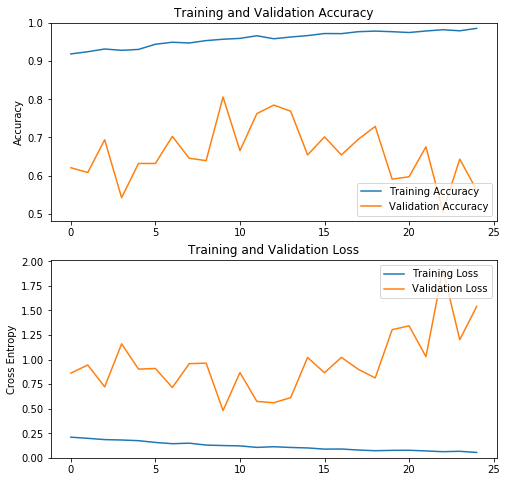

Training Acc:  [0.9188329646017699, 0.9245022123893806, 0.9316924778761062, 0.9282356194690266, 0.9305862831858407, 0.9441371681415929, 0.949391592920354, 0.9474557522123894, 0.9536780973451328, 0.9572732300884956, 0.9594856194690266, 0.9663993362831859, 0.9585176991150443, 0.9630807522123894, 0.9668141592920354, 0.9722068584070797, 0.9719303097345132, 0.9770464601769911, 0.9785674778761062, 0.9770464601769911, 0.9748340707964602, 0.9788440265486725, 0.9821626106194691, 0.9793971238938053, 0.9857577433628318]



Evaluating model on test set...
Result on test set: 81.27%
79.64% (+/- 3.48%)
Saving CV values to file....
CV values successfully saved!



In [0]:
from sklearn.model_selection import StratifiedKFold
from models import LSTM
import datetime
from keras.callbacks import ModelCheckpoint,TensorBoard,EarlyStopping


# define KFOLD-fold cross validation test harness
kfold = StratifiedKFold(n_splits = KFOLD, shuffle = True, random_state = SEED)
cvscores_1 = []
history_1 = []
ii = 1
for train, test in kfold.split(x_subject, y_subject[:, 0]):
    print('Run ' + str(ii) + '...')
    # create callbacks
    model_name_str = 'GRAZ_pCNN_' + \
                     '_run_' + str(ii)

    # initialize and create the model
    
    # fit model. If you specify monitor=True, then the model will create callbacks
    # and write its state to a HDF5 file
    train_data =  [x_subject[train], y_subject[train]]
    monitor_index = 'val_loss'
    h = run_model(model, model_name_str,100, train_data, 0.1, 256, monitor_index)
    save_model(model, model_name_str, '')
    draw_graphs(h)
    history_1.append(h)

    history_1.append(h)
    print ('Training Acc: ', h.history['acc'])
    print ('\n\n')
    # evaluate the model
    print('Evaluating model on test set...')
    scores = model.evaluate(x_subject[test], y_subject[test], verbose = 0)
    print("Result on test set: %.2f%%" % ( scores[1] * 100))
    cvscores_1.append(scores[1] * 100)
    ii += 1
    
try:
  # print some evaluation statistics and write results to file
  print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_1), np.std(cvscores_1)))
  cv_all_subjects = np.asarray(cvscores_1)
  print('Saving CV values to file....')
  np.savetxt('GRAZ_CV_' + 'LSTM_' + str(DROPOUT) + 'do'+'.csv', 
              cv_all_subjects, delimiter = ',', fmt = '%2.4f')
  print('CV values successfully saved!\n')
except:
  print ('could not save')

In [0]:
pcnn_train_acc_1 = [ 0.9857577433628318, 0.9679159175935844,  0.9692988521725355, 0.9572673212639475,  0.9452357904048171]

In [0]:
cap_df.loc['pCNN_1', 'CV Test Acc'] = np.mean(cvscores_1)
cap_df.loc['pCNN_1', 'Capacity (bits)'] = 3670
cap_df.loc['pCNN_1', 'CV Train Acc'] = np.mean(pcnn_train_acc_1)*100


In [0]:
cap_df

Capacity (bits) CV Train Acc CV Test Acc
pCNN_og           53192          100      68.252
pCNN_1             3670      96.5095     79.6397

## our pCNN 3304 bits

In [0]:
input_shape = x_subject.shape[1:]
model = Sequential()

# spectrogram creation using STFT
model.add(Spectrogram(n_dft = 32, n_hop = 16, input_shape = input_shape,
        return_decibel_spectrogram = False, power_spectrogram = 2.0,
        trainable_kernel = False, name = 'static_stft'))
model.add(Normalization2D(str_axis = 'freq'))

# Conv Block 1
model.add(Conv2D(filters = 18,  kernel_size = (4, 4),
                strides = (1, 1), name = 'conv1',
                border_mode = 'same'))
model.add(BatchNormalization(axis = 1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2), padding = 'valid',
                      data_format = 'channels_last'))

# Conv Block 2
model.add(Conv2D(filters = 11, kernel_size = (2, 2),
                name = 'conv2', border_mode = 'same'))
model.add(BatchNormalization(axis = 1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid',
                      data_format = 'channels_last'))


# # Conv Block 3
model.add(Conv2D(filters = 9, kernel_size = (2, 2),
                name = 'conv3', border_mode = 'same'))
model.add(BatchNormalization(axis = 1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2),
                      padding = 'valid',
                      data_format = 'channels_last'))
# model.add(Dropout(dropout))


# classificator
model.add(Flatten())
model.add(Dense(2))  # two classes only
model.add(Activation('softmax'))

# compile the model
model.compile(loss = 'categorical_crossentropy',
            optimizer = 'adam',
            metrics = ['accuracy'])

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=18, kernel_size=(4, 4), strides=(1, 1), name="conv1", padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=11, kernel_size=(2, 2), name="conv2", padding="same")`


Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
static_stft (Spectrogram)    (None, 17, 63, 3)         1088      
_________________________________________________________________
normalization2d_29 (Normaliz (None, 17, 63, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 17, 63, 18)        882       
_________________________________________________________________
batch_normalization_66 (Batc (None, 17, 63, 18)        68        
_________________________________________________________________
activation_77 (Activation)   (None, 17, 63, 18)        0         
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 8, 31, 18)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 8, 31, 11)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=9, kernel_size=(2, 2), name="conv3", padding="same")`


Run 1...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 14s - loss: 0.7672 - acc: 0.5564 - val_loss: 1.1276 - val_acc: 0.1331

Epoch 00001: val_loss improved from inf to 1.12756, saving model to checkpoints/GRAZ_pCNN__run_1.h5
Epoch 2/100
 - 11s - loss: 0.6683 - acc: 0.5926 - val_loss: 1.0350 - val_acc: 0.1368

Epoch 00002: val_loss improved from 1.12756 to 1.03499, saving model to checkpoints/GRAZ_pCNN__run_1.h5
Epoch 3/100
 - 11s - loss: 0.6455 - acc: 0.6330 - val_loss: 0.9255 - val_acc: 0.2276

Epoch 00003: val_loss improved from 1.03499 to 0.92545, saving model to checkpoints/GRAZ_pCNN__run_1.h5
Epoch 4/100
 - 11s - loss: 0.6213 - acc: 0.6563 - val_loss: 0.7958 - val_acc: 0.4067

Epoch 00004: val_loss improved from 0.92545 to 0.79580, saving model to checkpoints/GRAZ_pCNN__run_1.h5
Epoch 5/100
 - 11s - loss: 0.5914 - acc: 0.6888 - val_loss: 0.8283 - val_acc: 0.4017

Epoch 00005: val_loss did not improve from 0.79580
Epoch 6/100
 - 10s - loss: 0.5542 - acc: 0.7197 - v

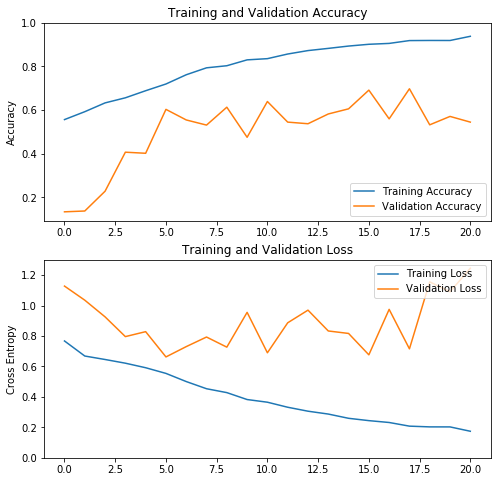

Training Acc:  [0.5563545846012581, 0.5925874708187133, 0.6329691607730218, 0.6563407553295726, 0.6888397180626887, 0.7196791593488726, 0.7621352511097857, 0.7939427466152483, 0.8034849952339154, 0.8304522197501423, 0.835983958024732, 0.8572811506757629, 0.8730466049697748, 0.8831420274398053, 0.8937906237529564, 0.901949937833887, 0.9059604481285067, 0.9189600332398877, 0.9195132070582794, 0.9193749136737465, 0.938597704361557]



Evaluating model on test set...
Result on test set: 66.65%
Run 2...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 11s - loss: 0.5184 - acc: 0.7498 - val_loss: 0.8720 - val_acc: 0.5037

Epoch 00001: val_loss improved from inf to 0.87196, saving model to checkpoints/GRAZ_pCNN__run_2.h5
Epoch 2/100
 - 11s - loss: 0.4897 - acc: 0.7703 - val_loss: 0.7298 - val_acc: 0.5920

Epoch 00002: val_loss improved from 0.87196 to 0.72979, saving model to checkpoints/GRAZ_pCNN__run_2.h5
Epoch 3/100
 - 11s - loss: 0.4643 - acc: 0.7866 - val_loss: 0.8669 - val_

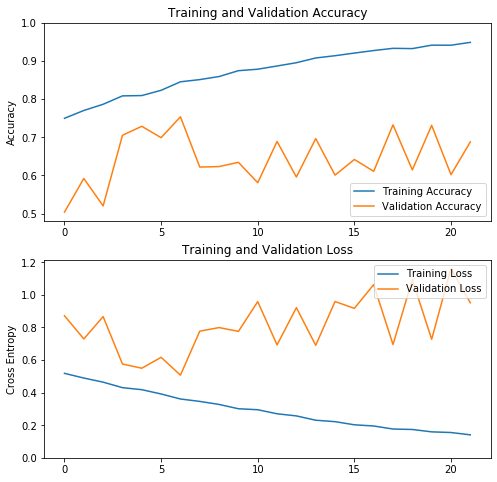

Training Acc:  [0.7498271333332165, 0.7702945651989592, 0.78661319330312, 0.8086018531982903, 0.8094316139588497, 0.82326095983079, 0.8455262066598849, 0.8513345319920433, 0.8593555525647969, 0.8747061264826506, 0.8785783433185509, 0.8870142442757057, 0.8955884387080657, 0.9080348500257837, 0.9139814687342321, 0.9208961416866881, 0.9275342276722477, 0.9333425529302197, 0.9326510856448657, 0.941640160436898, 0.9415018670029074, 0.9489697137490263]



Evaluating model on test set...
Result on test set: 76.95%
Run 3...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 11s - loss: 0.3577 - acc: 0.8390 - val_loss: 0.8422 - val_acc: 0.6405

Epoch 00001: val_loss improved from inf to 0.84216, saving model to checkpoints/GRAZ_pCNN__run_3.h5
Epoch 2/100
 - 11s - loss: 0.3318 - acc: 0.8555 - val_loss: 0.7960 - val_acc: 0.6555

Epoch 00002: val_loss improved from 0.84216 to 0.79596, saving model to checkpoints/GRAZ_pCNN__run_3.h5
Epoch 3/100
 - 11s - loss: 0.3139 - acc: 0.8639 - val_l

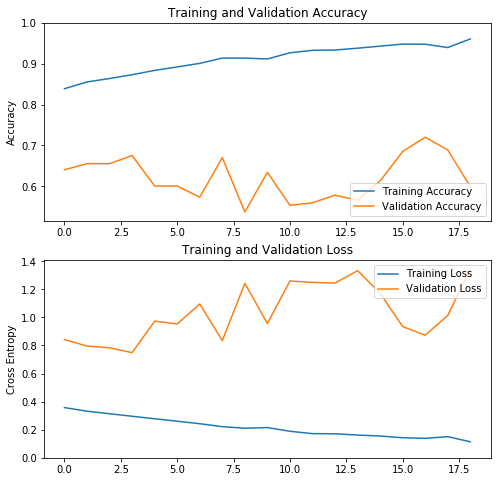

Training Acc:  [0.8390264141577736, 0.8554833357288966, 0.8639192366695655, 0.8731848983707937, 0.8838334947498883, 0.892269395715286, 0.9009818835733936, 0.9139814687259892, 0.9138431752260552, 0.9117687733699928, 0.9268427603621648, 0.9329276725540615, 0.9336191398559014, 0.9381828239853988, 0.9431613885240261, 0.948139952980224, 0.9478633661452146, 0.9397040520148263, 0.9607246577566614]



Evaluating model on test set...
Result on test set: 79.44%
Run 4...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 11s - loss: 0.2940 - acc: 0.8790 - val_loss: 0.6689 - val_acc: 0.7127

Epoch 00001: val_loss improved from inf to 0.66892, saving model to checkpoints/GRAZ_pCNN__run_4.h5
Epoch 2/100
 - 11s - loss: 0.2677 - acc: 0.8881 - val_loss: 0.7475 - val_acc: 0.6878

Epoch 00002: val_loss did not improve from 0.66892
Epoch 3/100
 - 10s - loss: 0.2536 - acc: 0.8939 - val_loss: 0.9448 - val_acc: 0.6231

Epoch 00003: val_loss did not improve from 0.66892
Epoch 4/100
 - 11s - loss: 0

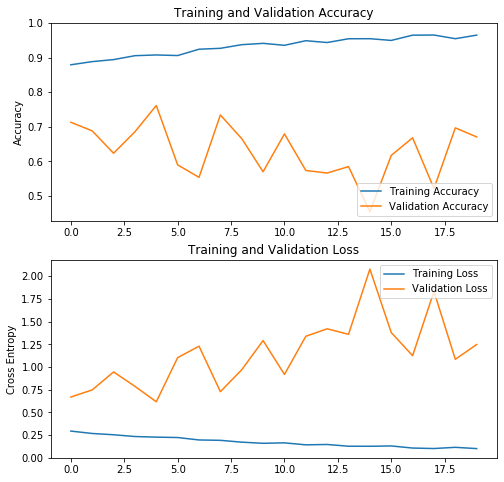

Training Acc:  [0.8789932236534945, 0.8881205919537039, 0.8939289172116758, 0.9052689808596386, 0.9073433827651584, 0.9056838612028251, 0.9239385977373004, 0.9265661734199973, 0.9370764763238865, 0.9409486931680298, 0.9352786613440484, 0.9485548333563822, 0.9432996819497738, 0.9542248651886065, 0.954363158639083, 0.9493845941169415, 0.9645968745843188, 0.9650117549687199, 0.9543631586555689, 0.9647351680347953]



Evaluating model on test set...
Result on test set: 82.28%
Run 5...
Train on 7232 samples, validate on 804 samples
Epoch 1/100
 - 11s - loss: 0.2222 - acc: 0.9100 - val_loss: 0.8130 - val_acc: 0.6878

Epoch 00001: val_loss improved from inf to 0.81304, saving model to checkpoints/GRAZ_pCNN__run_5.h5
Epoch 2/100
 - 10s - loss: 0.2096 - acc: 0.9155 - val_loss: 0.7026 - val_acc: 0.7400

Epoch 00002: val_loss improved from 0.81304 to 0.70264, saving model to checkpoints/GRAZ_pCNN__run_5.h5
Epoch 3/100
 - 10s - loss: 0.1895 - acc: 0.9246 - val_loss: 1.0324 - val_acc: 0.6343

Epoch

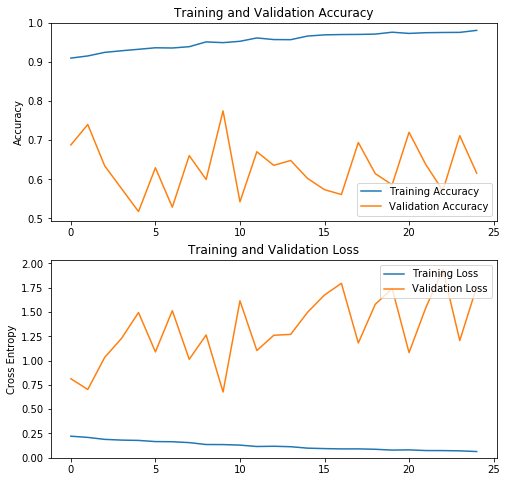

Training Acc:  [0.909983407079646, 0.9155143805309734, 0.9246404867256637, 0.9287887168141593, 0.9325221238938053, 0.9363938053097345, 0.9358407079646017, 0.9391592920353983, 0.9514657079646017, 0.9495298672566371, 0.9529867256637168, 0.9615597345132744, 0.9574115044247787, 0.9571349557522124, 0.9663993362831859, 0.969441371681416, 0.9702710176991151, 0.9705475663716814, 0.9713772123893806, 0.9762168141592921, 0.973174778761062, 0.9749723451327433, 0.9755254424778761, 0.9758019911504425, 0.9809181415929203]



Evaluating model on test set...
Result on test set: 81.82%
77.43% (+/- 5.71%)
Saving CV values to file....
CV values successfully saved!



In [0]:
from sklearn.model_selection import StratifiedKFold
from models import LSTM
import datetime
from keras.callbacks import ModelCheckpoint,TensorBoard,EarlyStopping


# define KFOLD-fold cross validation test harness
kfold = StratifiedKFold(n_splits = KFOLD, shuffle = True, random_state = SEED)
cvscores_2 = []
history_2 = []
ii = 1
for train, test in kfold.split(x_subject, y_subject[:, 0]):
    print('Run ' + str(ii) + '...')
    # create callbacks
    model_name_str = 'GRAZ_pCNN_' + \
                     '_run_' + str(ii)

    # initialize and create the model
    
    # fit model. If you specify monitor=True, then the model will create callbacks
    # and write its state to a HDF5 file
    train_data =  [x_subject[train], y_subject[train]]
    monitor_index = 'val_loss'
    h = run_model(model, model_name_str,100, train_data, 0.1, 256, monitor_index)
    save_model(model, model_name_str, '')
    draw_graphs(h)
    history_2.append(h)

    history_2.append(h)
    print ('Training Acc: ', h.history['acc'])
    print ('\n\n')
    # evaluate the model
    print('Evaluating model on test set...')
    scores = model.evaluate(x_subject[test], y_subject[test], verbose = 0)
    print("Result on test set: %.2f%%" % ( scores[1] * 100))
    cvscores_2.append(scores[1] * 100)
    ii += 1
    
try:
  # print some evaluation statistics and write results to file
  print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_2), np.std(cvscores_2)))
  cv_all_subjects = np.asarray(cvscores_2)
  print('Saving CV values to file....')
  np.savetxt('GRAZ_CV_' + 'LSTM_' + str(DROPOUT) + 'do'+'.csv', 
              cv_all_subjects, delimiter = ',', fmt = '%2.4f')
  print('CV values successfully saved!\n')
except:
  print ('could not save')

In [0]:
pcnn_train_acc_2 = [0.9809181415929203, 0.9647351680347953,0.9607246577566614,  0.9489697137490263, 0.938597704361557]

In [0]:
cap_df.loc['pCNN_2', 'CV Test Acc'] = np.mean(cvscores_2)
cap_df.loc['pCNN_2', 'Capacity (bits)'] = 3304
cap_df.loc['pCNN_2', 'CV Train Acc'] = np.mean(pcnn_train_acc_2)*100


In [0]:
cap_df

Capacity (bits) CV Train Acc CV Test Acc
pCNN_og           53192          100      68.252
pCNN_1             3670      96.5095     79.6397
pCNN_2             3304      95.8789     77.4297

In [0]:
cvscores_2

[66.65007465066098,
 76.95370832742773,
 79.44250874640397,
 82.27974115289106,
 81.82270913959975]

## our pCNN 3051 bits

In [0]:
input_shape = x_subject.shape[1:]
model = Sequential()

# spectrogram creation using STFT
model.add(Spectrogram(n_dft = 32, n_hop = 16, input_shape = input_shape,
        return_decibel_spectrogram = False, power_spectrogram = 2.0,
        trainable_kernel = False, name = 'static_stft'))
model.add(Normalization2D(str_axis = 'freq'))

# Conv Block 1
model.add(Conv2D(filters = 17,  kernel_size = (4, 4),
                strides = (1, 1), name = 'conv1',
                border_mode = 'same'))
model.add(BatchNormalization(axis = 1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2), padding = 'valid',
                      data_format = 'channels_last'))

# Conv Block 2
model.add(Conv2D(filters = 10, kernel_size = (2, 2),
                name = 'conv2', border_mode = 'same'))
model.add(BatchNormalization(axis = 1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid',
                      data_format = 'channels_last'))


# # Conv Block 3
model.add(Conv2D(filters = 8, kernel_size = (2, 2),
                name = 'conv3', border_mode = 'same'))
model.add(BatchNormalization(axis = 1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2),
                      padding = 'valid',
                      data_format = 'channels_last'))
# model.add(Dropout(dropout))


# classificator
model.add(Flatten())
model.add(Dense(2))  # two classes only
model.add(Activation('softmax'))

# compile the model
model.compile(loss = 'categorical_crossentropy',
            optimizer = 'adam',
            metrics = ['accuracy'])

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=17, kernel_size=(4, 4), strides=(1, 1), name="conv1", padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=10, kernel_size=(2, 2), name="conv2", padding="same")`


Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
static_stft (Spectrogram)    (None, 17, 63, 3)         1088      
_________________________________________________________________
normalization2d_32 (Normaliz (None, 17, 63, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 17, 63, 17)        833       
_________________________________________________________________
batch_normalization_75 (Batc (None, 17, 63, 17)        68        
_________________________________________________________________
activation_89 (Activation)   (None, 17, 63, 17)        0         
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 8, 31, 17)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 8, 31, 10)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=8, kernel_size=(2, 2), name="conv3", padding="same")`


Run 1...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 14s - loss: 0.7710 - acc: 0.5008 - val_loss: 0.7988 - val_acc: 0.2786

Epoch 00001: val_loss improved from inf to 0.79881, saving model to checkpoints/GRAZ_pCNN__run_1.h5
Epoch 2/100
 - 10s - loss: 0.6950 - acc: 0.5440 - val_loss: 0.8387 - val_acc: 0.1617

Epoch 00002: val_loss did not improve from 0.79881
Epoch 3/100
 - 10s - loss: 0.6861 - acc: 0.5565 - val_loss: 0.8013 - val_acc: 0.2139

Epoch 00003: val_loss did not improve from 0.79881
Epoch 4/100
 - 10s - loss: 0.6811 - acc: 0.5630 - val_loss: 0.7484 - val_acc: 0.3420

Epoch 00004: val_loss improved from 0.79881 to 0.74842, saving model to checkpoints/GRAZ_pCNN__run_1.h5
Epoch 5/100
 - 10s - loss: 0.6742 - acc: 0.5790 - val_loss: 0.7691 - val_acc: 0.2960

Epoch 00005: val_loss did not improve from 0.74842
Epoch 6/100
 - 10s - loss: 0.6649 - acc: 0.5969 - val_loss: 0.8698 - val_acc: 0.1443

Epoch 00006: val_loss did not improve from 0.74842
Epoch 7/100
 - 10s -

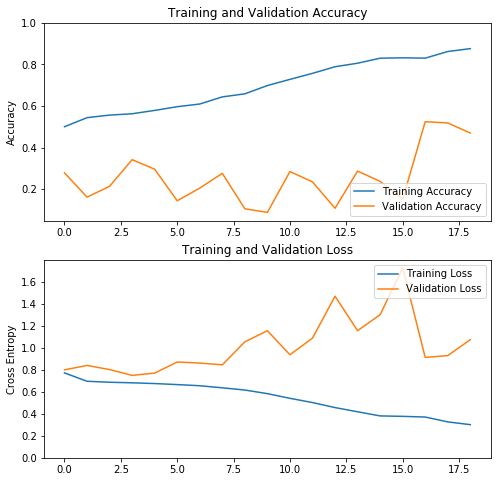

Training Acc:  [0.5007606140682929, 0.5440464668494177, 0.5564928781011922, 0.5629926706774899, 0.5790347118642118, 0.5968745680390148, 0.6098741531586387, 0.6440326374128735, 0.6588300375205783, 0.6986585535905516, 0.728391647231709, 0.7572949800793354, 0.7892407690023028, 0.8061125709825557, 0.830313926274937, 0.8321117411970747, 0.8304522197171705, 0.8623980086566237, 0.8763656479707975]



Evaluating model on test set...
Result on test set: 50.47%
Run 2...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 10s - loss: 0.6784 - acc: 0.5645 - val_loss: 0.7858 - val_acc: 0.3831

Epoch 00001: val_loss improved from inf to 0.78579, saving model to checkpoints/GRAZ_pCNN__run_2.h5
Epoch 2/100
 - 10s - loss: 0.6775 - acc: 0.5648 - val_loss: 0.8596 - val_acc: 0.2326

Epoch 00002: val_loss did not improve from 0.78579
Epoch 3/100
 - 10s - loss: 0.6733 - acc: 0.5736 - val_loss: 0.8237 - val_acc: 0.2736

Epoch 00003: val_loss did not improve from 0.78579
Epoch 4/100
 - 10s - loss: 0

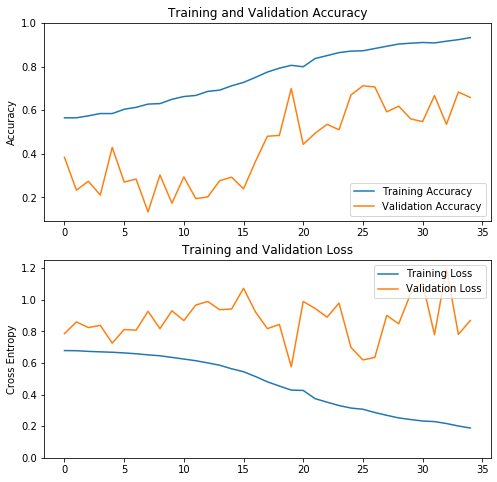

Training Acc:  [0.5645138986986746, 0.5647904856243563, 0.5736412667722033, 0.5842898632790633, 0.5841515698698015, 0.603789240966742, 0.6127783157835032, 0.6275757158747222, 0.6297884112142327, 0.6495643757781354, 0.6622873740545069, 0.6672659385271907, 0.6857972619708619, 0.691605587220591, 0.7113815517597649, 0.7271470060949915, 0.750242013676403, 0.7745816623533173, 0.7922832251106154, 0.8054211036807157, 0.798921311112661, 0.8366754253430578, 0.8500898908058682, 0.8637809432685466, 0.8706956161880308, 0.8720785507834679, 0.8825888536214136, 0.8929608630418546, 0.9030562854789135, 0.9069285022983279, 0.9102475453405653, 0.9081731434845031, 0.9161941640490138, 0.9231088370179557, 0.9325127921779033]



Evaluating model on test set...
Result on test set: 71.13%
Run 3...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 10s - loss: 0.4311 - acc: 0.7992 - val_loss: 0.9712 - val_acc: 0.5336

Epoch 00001: val_loss improved from inf to 0.97117, saving model to checkpoints/GRAZ

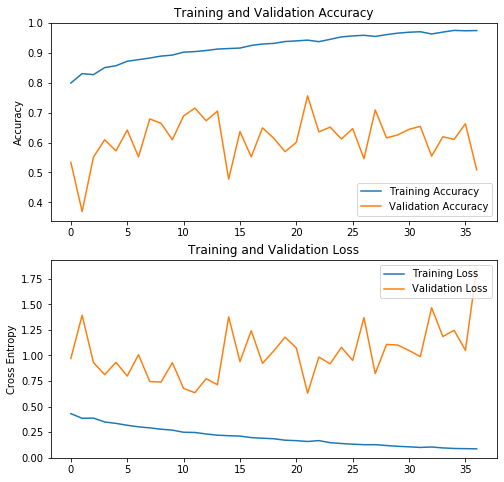

Training Acc:  [0.7991978980300998, 0.8304522197089277, 0.8269948832244567, 0.8506430646737175, 0.8568662702831189, 0.8718019638165714, 0.8771954086983852, 0.8825888536131706, 0.8890886462141973, 0.8924076891657624, 0.90222652473484, 0.9041626331404258, 0.9077582630671303, 0.9125985341140663, 0.9143963491103904, 0.9159175771563037, 0.9246300650226544, 0.9294703360778335, 0.9315447379586245, 0.9377679436009977, 0.9399806389322651, 0.942469921238672, 0.9373530632413253, 0.9450974969213689, 0.9532568109858136, 0.9565758539785935, 0.9586502558593845, 0.9547780389987554, 0.9608629512071378, 0.9658415157127934, 0.9688839718046203, 0.9705434933010102, 0.9630756465631342, 0.9692988521807785, 0.974968883988274, 0.9737242428597994, 0.9744157101533963]



Evaluating model on test set...
Result on test set: 78.99%
Run 4...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 10s - loss: 0.2037 - acc: 0.9176 - val_loss: 1.1038 - val_acc: 0.6095

Epoch 00001: val_loss improved from inf to 1

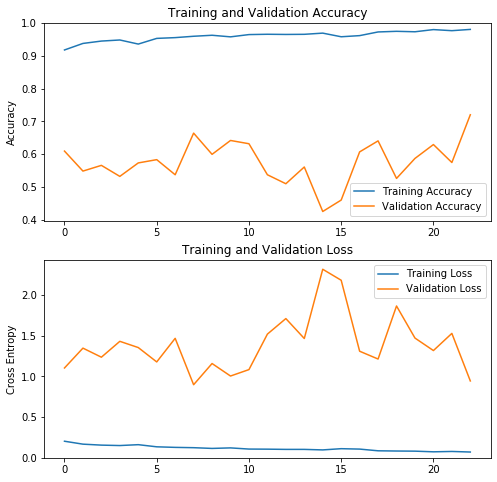

Training Acc:  [0.9175770986444507, 0.9374913567000447, 0.9446826165534536, 0.9480016595462334, 0.9355552482614872, 0.9528419305931696, 0.9551929194078853, 0.9593417231529815, 0.9623841792530513, 0.9575439081896293, 0.9644585811338423, 0.9654266353366352, 0.9648734615100005, 0.9652883418861588, 0.9688839717881345, 0.9578204950988252, 0.9612778315750532, 0.9724796017395677, 0.9744157101616393, 0.9730327755579594, 0.9796708615764907, 0.9763518186001968, 0.9802240354031254]



Evaluating model on test set...
Result on test set: 83.82%
Run 5...
Train on 7232 samples, validate on 804 samples
Epoch 1/100
 - 10s - loss: 0.1325 - acc: 0.9537 - val_loss: 1.4446 - val_acc: 0.5336

Epoch 00001: val_loss improved from inf to 1.44459, saving model to checkpoints/GRAZ_pCNN__run_5.h5
Epoch 2/100
 - 10s - loss: 0.1204 - acc: 0.9582 - val_loss: 1.5514 - val_acc: 0.5187

Epoch 00002: val_loss did not improve from 1.44459
Epoch 3/100
 - 10s - loss: 0.1141 - acc: 0.9621 - val_loss: 1.4301 - val_acc: 0.544

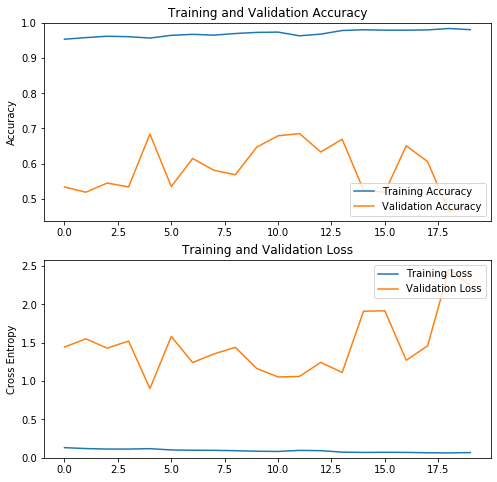

Training Acc:  [0.9536780973451328, 0.9582411504424779, 0.9621128318584071, 0.9608683628318584, 0.9569966814159292, 0.9647400442477876, 0.9675055309734514, 0.9652931415929203, 0.9698561946902655, 0.9730365044247787, 0.9738661504424779, 0.9633573008849557, 0.9681969026548672, 0.978429203539823, 0.9805033185840708, 0.9793971238938053, 0.9792588495575221, 0.9800884955752213, 0.9840984513274337, 0.9807798672566371]



Evaluating model on test set...
Result on test set: 84.06%
73.70% (+/- 12.52%)
Saving CV values to file....
CV values successfully saved!



In [0]:
from sklearn.model_selection import StratifiedKFold
from models import LSTM
import datetime
from keras.callbacks import ModelCheckpoint,TensorBoard,EarlyStopping


# define KFOLD-fold cross validation test harness
kfold = StratifiedKFold(n_splits = KFOLD, shuffle = True, random_state = SEED)
cvscores_3 = []
history_3 = []
ii = 1
for train, test in kfold.split(x_subject, y_subject[:, 0]):
    print('Run ' + str(ii) + '...')
    # create callbacks
    model_name_str = 'GRAZ_pCNN_' + \
                     '_run_' + str(ii)

    # initialize and create the model
    
    # fit model. If you specify monitor=True, then the model will create callbacks
    # and write its state to a HDF5 file
    train_data =  [x_subject[train], y_subject[train]]
    monitor_index = 'val_loss'
    h = run_model(model, model_name_str,100, train_data, 0.1, 256, monitor_index)
    save_model(model, model_name_str, '')
    draw_graphs(h)
    history_3.append(h)

    history_3.append(h)
    print ('Training Acc: ', h.history['acc'])
    print ('\n\n')
    # evaluate the model
    print('Evaluating model on test set...')
    scores = model.evaluate(x_subject[test], y_subject[test], verbose = 0)
    print("Result on test set: %.2f%%" % ( scores[1] * 100))
    cvscores_3.append(scores[1] * 100)
    ii += 1
    
try:
  # print some evaluation statistics and write results to file
  print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_3), np.std(cvscores_3)))
  cv_all_subjects = np.asarray(cvscores_3)
  print('Saving CV values to file....')
  np.savetxt('GRAZ_CV_' + 'LSTM_' + str(DROPOUT) + 'do'+'.csv', 
              cv_all_subjects, delimiter = ',', fmt = '%2.4f')
  print('CV values successfully saved!\n')
except:
  print ('could not save')

In [0]:
pcnn_train_acc_3 = [0.9807798672566371, 0.9802240354031254, 0.9744157101533963, 0.9325127921779033, 0.8763656479707975 ]

In [0]:
cap_df.loc['pCNN_3', 'CV Test Acc'] = np.mean(cvscores_3)
cap_df.loc['pCNN_3', 'Capacity (bits)'] = 3304
cap_df.loc['pCNN_3', 'CV Train Acc'] = np.mean(pcnn_train_acc_3)*100


In [0]:
cap_df

Capacity (bits) CV Train Acc CV Test Acc
pCNN_og           53192          100      68.252
pCNN_1             3670      96.5095     79.6397
pCNN_2             3304      95.8789     77.4297
pCNN_3             3304       94.886     73.6968

In [0]:
cap_df = cap_df.rename(index={'pCNN_3': 'pCNN_4'})

In [0]:
cap_df = cap_df.rename(index={'pCNN_2': 'pCNN_3'})

## our pCNN 3510 bits

In [0]:
input_shape = x_subject.shape[1:]
model = Sequential()

# spectrogram creation using STFT
model.add(Spectrogram(n_dft = 32, n_hop = 16, input_shape = input_shape,
        return_decibel_spectrogram = False, power_spectrogram = 2.0,
        trainable_kernel = False, name = 'static_stft'))
model.add(Normalization2D(str_axis = 'freq'))

# Conv Block 1
model.add(Conv2D(filters = 19,  kernel_size = (4, 4),
                strides = (1, 1), name = 'conv1',
                border_mode = 'same'))
model.add(BatchNormalization(axis = 1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2), padding = 'valid',
                      data_format = 'channels_last'))

# Conv Block 2
model.add(Conv2D(filters = 12, kernel_size = (2, 2),
                name = 'conv2', border_mode = 'same'))
model.add(BatchNormalization(axis = 1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid',
                      data_format = 'channels_last'))


# # Conv Block 3
model.add(Conv2D(filters = 9, kernel_size = (2, 2),
                name = 'conv3', border_mode = 'same'))
model.add(BatchNormalization(axis = 1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2),
                      padding = 'valid',
                      data_format = 'channels_last'))
# model.add(Dropout(dropout))


# classificator
model.add(Flatten())
model.add(Dense(2))  # two classes only
model.add(Activation('softmax'))

# compile the model
model.compile(loss = 'categorical_crossentropy',
            optimizer = 'adam',
            metrics = ['accuracy'])

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=19, kernel_size=(4, 4), strides=(1, 1), name="conv1", padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=12, kernel_size=(2, 2), name="conv2", padding="same")`


Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
static_stft (Spectrogram)    (None, 17, 63, 3)         1088      
_________________________________________________________________
normalization2d_36 (Normaliz (None, 17, 63, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 17, 63, 19)        931       
_________________________________________________________________
batch_normalization_87 (Batc (None, 17, 63, 19)        68        
_________________________________________________________________
activation_105 (Activation)  (None, 17, 63, 19)        0         
_________________________________________________________________
max_pooling2d_87 (MaxPooling (None, 8, 31, 19)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 8, 31, 12)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=9, kernel_size=(2, 2), name="conv3", padding="same")`


Run 1...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 11s - loss: 0.6882 - acc: 0.5471 - val_loss: 0.7436 - val_acc: 0.3259

Epoch 00001: val_loss improved from inf to 0.74361, saving model to checkpoints/GRAZ_pCNN__run_1.h5
Epoch 2/100
 - 11s - loss: 0.6757 - acc: 0.5739 - val_loss: 0.7577 - val_acc: 0.3085

Epoch 00002: val_loss did not improve from 0.74361
Epoch 3/100
 - 11s - loss: 0.6562 - acc: 0.6095 - val_loss: 0.7184 - val_acc: 0.4701

Epoch 00003: val_loss improved from 0.74361 to 0.71842, saving model to checkpoints/GRAZ_pCNN__run_1.h5
Epoch 4/100
 - 11s - loss: 0.6149 - acc: 0.6678 - val_loss: 0.6790 - val_acc: 0.5609

Epoch 00004: val_loss improved from 0.71842 to 0.67899, saving model to checkpoints/GRAZ_pCNN__run_1.h5
Epoch 5/100
 - 11s - loss: 0.5431 - acc: 0.7307 - val_loss: 0.7670 - val_acc: 0.4378

Epoch 00005: val_loss did not improve from 0.67899
Epoch 6/100
 - 11s - loss: 0.4756 - acc: 0.7720 - val_loss: 0.8338 - val_acc: 0.3955

Epoch 00006: val_l

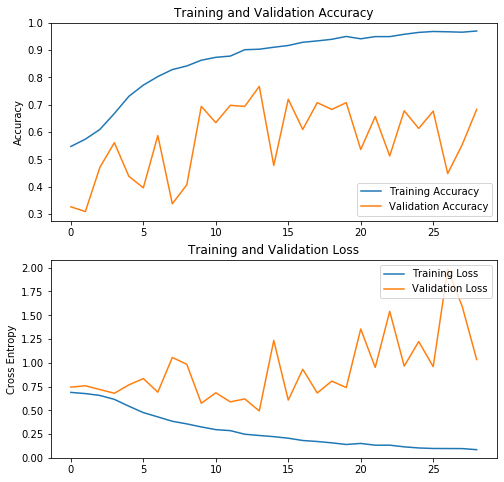

Training Acc:  [0.5470889227145639, 0.5739178539328087, 0.609459272708294, 0.6678191123043679, 0.7307426360052102, 0.7719540866623774, 0.8033467017834389, 0.8289309916382854, 0.8422071636671051, 0.8632277693677255, 0.8738763657138483, 0.8784400498351027, 0.9018116443504388, 0.9036094593302769, 0.9108007191754429, 0.9173005117434978, 0.9290554557099182, 0.9340340202567884, 0.9399806389734798, 0.9503526483527062, 0.9417784539203462, 0.9497994745425574, 0.9497994745095857, 0.9583736689501886, 0.9651500484274393, 0.9686073848871815, 0.9675010372256692, 0.9659798091797558, 0.9704051998340478]



Evaluating model on test set...
Result on test set: 77.40%
Run 2...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 11s - loss: 0.2678 - acc: 0.8849 - val_loss: 0.5791 - val_acc: 0.7575

Epoch 00001: val_loss improved from inf to 0.57905, saving model to checkpoints/GRAZ_pCNN__run_2.h5
Epoch 2/100
 - 11s - loss: 0.2245 - acc: 0.9049 - val_loss: 0.6341 - val_acc: 0.7425

Epoch 00002: va

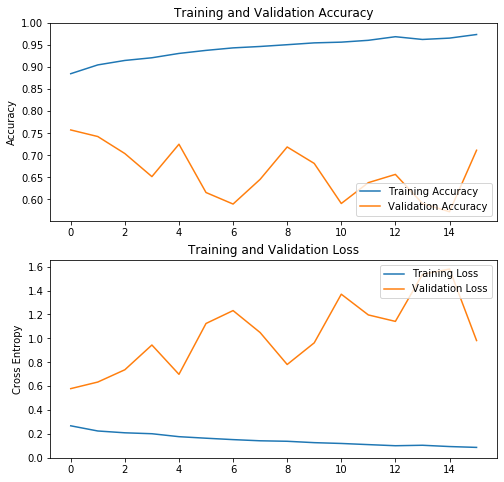

Training Acc:  [0.8849398424196434, 0.9048541004422657, 0.914949522937025, 0.9210344351371645, 0.9308532706897563, 0.9377679436092405, 0.9434379754167361, 0.9466187249590394, 0.9506292352619021, 0.9547780390152413, 0.9564375605116311, 0.9605863642814562, 0.9687456783623868, 0.9625224727282565, 0.9655649287953546, 0.9737242428845282]



Evaluating model on test set...
Result on test set: 82.58%
Run 3...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 11s - loss: 0.2257 - acc: 0.9062 - val_loss: 0.9935 - val_acc: 0.6231

Epoch 00001: val_loss improved from inf to 0.99351, saving model to checkpoints/GRAZ_pCNN__run_3.h5
Epoch 2/100
 - 11s - loss: 0.2068 - acc: 0.9169 - val_loss: 0.8526 - val_acc: 0.6766

Epoch 00002: val_loss improved from 0.99351 to 0.85263, saving model to checkpoints/GRAZ_pCNN__run_3.h5
Epoch 3/100
 - 11s - loss: 0.1982 - acc: 0.9185 - val_loss: 1.1953 - val_acc: 0.5659

Epoch 00003: val_loss did not improve from 0.85263
Epoch 4/100
 - 11s - loss: 0.1816 

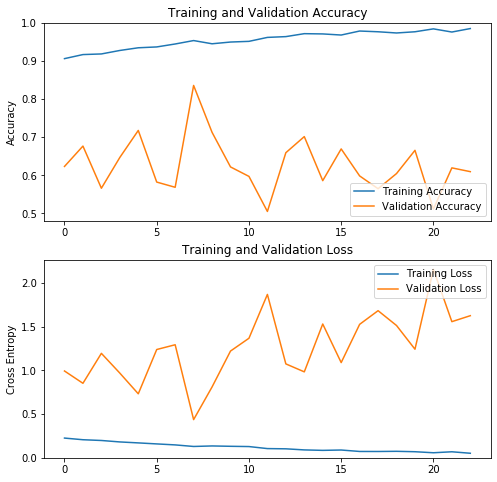

Training Acc:  [0.9062370350459455, 0.9168856313261249, 0.9185451528637295, 0.9276725211144813, 0.9347254875256567, 0.9369381828651671, 0.9446826165369677, 0.9536716913702148, 0.9452357903800883, 0.9497994745672862, 0.9515972894894238, 0.9619692988768931, 0.9640437007494412, 0.9717881344377277, 0.9710966671276449, 0.9681925045192662, 0.9787028073654549, 0.9767666989433833, 0.97358594940108, 0.9767666989516263, 0.9843728391811933, 0.9760752316415433, 0.9852025999335098]



Evaluating model on test set...
Result on test set: 80.54%
Run 4...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 11s - loss: 0.1679 - acc: 0.9315 - val_loss: 1.2747 - val_acc: 0.6007

Epoch 00001: val_loss improved from inf to 1.27468, saving model to checkpoints/GRAZ_pCNN__run_4.h5
Epoch 2/100
 - 11s - loss: 0.1385 - acc: 0.9461 - val_loss: 0.8591 - val_acc: 0.6953

Epoch 00002: val_loss improved from 1.27468 to 0.85907, saving model to checkpoints/GRAZ_pCNN__run_4.h5
Epoch 3/100
 - 11s - loss: 0.118

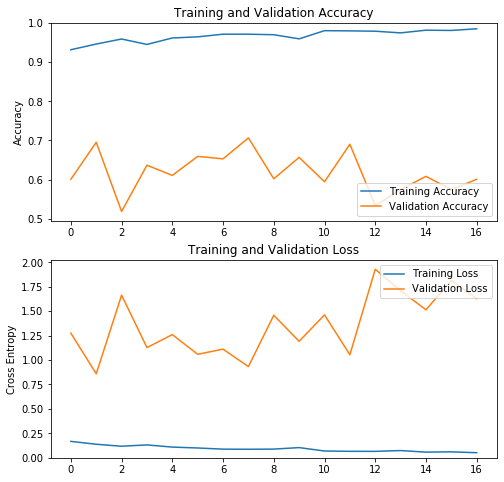

Training Acc:  [0.9315447379586245, 0.9460655511159188, 0.9589268427685804, 0.945097496913126, 0.9615544185089778, 0.9644585811420853, 0.9712349606028501, 0.9712349606028501, 0.9698520260321419, 0.9593417231447385, 0.9802240354031254, 0.9796708615682478, 0.9788411008241743, 0.9745540036038729, 0.9814686765480859, 0.9807772092709748, 0.9850643064665474]



Evaluating model on test set...
Result on test set: 86.26%
Run 5...
Train on 7232 samples, validate on 804 samples
Epoch 1/100
 - 11s - loss: 0.1288 - acc: 0.9515 - val_loss: 1.5206 - val_acc: 0.5361

Epoch 00001: val_loss improved from inf to 1.52056, saving model to checkpoints/GRAZ_pCNN__run_5.h5
Epoch 2/100
 - 11s - loss: 0.1207 - acc: 0.9541 - val_loss: 1.1886 - val_acc: 0.6294

Epoch 00002: val_loss improved from 1.52056 to 1.18864, saving model to checkpoints/GRAZ_pCNN__run_5.h5
Epoch 3/100
 - 11s - loss: 0.1067 - acc: 0.9636 - val_loss: 0.9491 - val_acc: 0.6915

Epoch 00003: val_loss improved from 1.18864 to 0.94911, saving mo

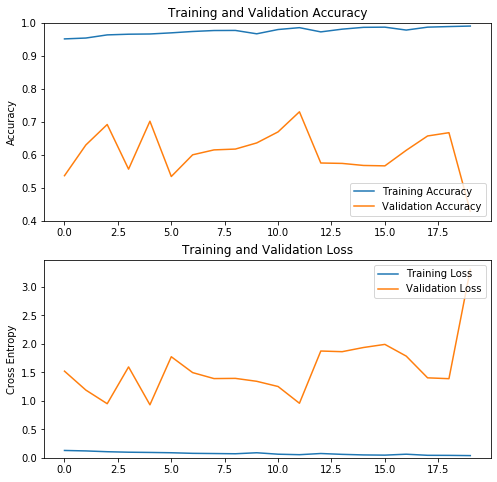

Training Acc:  [0.9514657079646017, 0.9540929203539823, 0.9636338495575221, 0.9657079646017699, 0.9663993362831859, 0.9698561946902655, 0.974004424778761, 0.9769081858407079, 0.9771847345132744, 0.9669524336283186, 0.979950221238938, 0.9856194690265486, 0.9727599557522124, 0.9810564159292036, 0.9865873893805309, 0.9871404867256637, 0.9782909292035398, 0.9871404867256637, 0.9889380530973452, 0.9904590707964602]



Evaluating model on test set...
Result on test set: 85.46%
82.45% (+/- 3.25%)
Saving CV values to file....
CV values successfully saved!



In [0]:
from sklearn.model_selection import StratifiedKFold
from models import LSTM
import datetime
from keras.callbacks import ModelCheckpoint,TensorBoard,EarlyStopping


# define KFOLD-fold cross validation test harness
kfold = StratifiedKFold(n_splits = KFOLD, shuffle = True, random_state = SEED)
cvscores_2 = []
history_2 = []
ii = 1
for train, test in kfold.split(x_subject, y_subject[:, 0]):
    print('Run ' + str(ii) + '...')
    # create callbacks
    model_name_str = 'GRAZ_pCNN_' + \
                     '_run_' + str(ii)

    # initialize and create the model
    
    # fit model. If you specify monitor=True, then the model will create callbacks
    # and write its state to a HDF5 file
    train_data =  [x_subject[train], y_subject[train]]
    monitor_index = 'val_loss'
    h = run_model(model, model_name_str,100, train_data, 0.1, 256, monitor_index)
    save_model(model, model_name_str, '')
    draw_graphs(h)
    history_2.append(h)

    history_2.append(h)
    print ('Training Acc: ', h.history['acc'])
    print ('\n\n')
    # evaluate the model
    print('Evaluating model on test set...')
    scores = model.evaluate(x_subject[test], y_subject[test], verbose = 0)
    print("Result on test set: %.2f%%" % ( scores[1] * 100))
    cvscores_2.append(scores[1] * 100)
    ii += 1
    
try:
  # print some evaluation statistics and write results to file
  print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_2), np.std(cvscores_2)))
  cv_all_subjects = np.asarray(cvscores_2)
  print('Saving CV values to file....')
  np.savetxt('GRAZ_CV_' + 'LSTM_' + str(DROPOUT) + 'do'+'.csv', 
              cv_all_subjects, delimiter = ',', fmt = '%2.4f')
  print('CV values successfully saved!\n')
except:
  print ('could not save')

In [0]:
pcnn_train_acc_2 =[ 0.9704051998340478,0.9737242428845282, 0.9852025999335098, 0.9850643064665474, 0.9904590707964602]

In [0]:
cap_df.loc['pCNN_2', 'CV Test Acc'] = np.mean(cvscores_2)
cap_df.loc['pCNN_2', 'Capacity (bits)'] = 3510
cap_df.loc['pCNN_2', 'CV Train Acc'] = np.mean(pcnn_train_acc_2)*100


In [0]:
cap_df.loc['pCNN_4', 'Capacity (bits)'] = 3051

In [0]:
cap_df.sort_values('Capacity (bits)',ascending = False)

Capacity (bits) CV Train Acc CV Test Acc
pCNN_og           53192          100      68.252
pCNN_1             3670      96.5095     79.6397
pCNN_2             3510      98.0971     82.4475
pCNN_3             3413      97.8233      82.099
pCNN_4             3051       94.886     73.6968

## our pCNN 3413 bits

In [0]:
input_shape = x_subject.shape[1:]
model = Sequential()

# spectrogram creation using STFT
model.add(Spectrogram(n_dft = 32, n_hop = 16, input_shape = input_shape,
        return_decibel_spectrogram = False, power_spectrogram = 2.0,
        trainable_kernel = False, name = 'static_stft'))
model.add(Normalization2D(str_axis = 'freq'))

# Conv Block 1
model.add(Conv2D(filters = 18,  kernel_size = (4, 4),
                strides = (1, 1), name = 'conv1',
                border_mode = 'same'))
model.add(BatchNormalization(axis = 1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2), padding = 'valid',
                      data_format = 'channels_last'))

# Conv Block 2
model.add(Conv2D(filters = 12, kernel_size = (2, 2),
                name = 'conv2', border_mode = 'same'))
model.add(BatchNormalization(axis = 1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid',
                      data_format = 'channels_last'))


# # Conv Block 3
model.add(Conv2D(filters = 9, kernel_size = (2, 2),
                name = 'conv3', border_mode = 'same'))
model.add(BatchNormalization(axis = 1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2),
                      padding = 'valid',
                      data_format = 'channels_last'))
# model.add(Dropout(dropout))


# classificator
model.add(Flatten())
model.add(Dense(2))  # two classes only
model.add(Activation('softmax'))

# compile the model
model.compile(loss = 'categorical_crossentropy',
            optimizer = 'adam',
            metrics = ['accuracy'])

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=18, kernel_size=(4, 4), strides=(1, 1), name="conv1", padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=12, kernel_size=(2, 2), name="conv2", padding="same")`


Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
static_stft (Spectrogram)    (None, 17, 63, 3)         1088      
_________________________________________________________________
normalization2d_35 (Normaliz (None, 17, 63, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 17, 63, 18)        882       
_________________________________________________________________
batch_normalization_84 (Batc (None, 17, 63, 18)        68        
_________________________________________________________________
activation_101 (Activation)  (None, 17, 63, 18)        0         
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 8, 31, 18)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 8, 31, 12)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=9, kernel_size=(2, 2), name="conv3", padding="same")`


Run 1...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 15s - loss: 0.7617 - acc: 0.5138 - val_loss: 0.7672 - val_acc: 0.4005

Epoch 00001: val_loss improved from inf to 0.76724, saving model to checkpoints/GRAZ_pCNN__run_1.h5
Epoch 2/100
 - 10s - loss: 0.6890 - acc: 0.5515 - val_loss: 0.8293 - val_acc: 0.2550

Epoch 00002: val_loss did not improve from 0.76724
Epoch 3/100
 - 10s - loss: 0.6783 - acc: 0.5682 - val_loss: 0.7810 - val_acc: 0.3209

Epoch 00003: val_loss did not improve from 0.76724
Epoch 4/100
 - 10s - loss: 0.6717 - acc: 0.5893 - val_loss: 0.8137 - val_acc: 0.2612

Epoch 00004: val_loss did not improve from 0.76724
Epoch 5/100
 - 10s - loss: 0.6637 - acc: 0.6050 - val_loss: 0.7584 - val_acc: 0.3868

Epoch 00005: val_loss improved from 0.76724 to 0.75838, saving model to checkpoints/GRAZ_pCNN__run_1.h5
Epoch 6/100
 - 10s - loss: 0.6500 - acc: 0.6277 - val_loss: 0.7813 - val_acc: 0.3644

Epoch 00006: val_loss did not improve from 0.75838
Epoch 7/100
 - 10s -

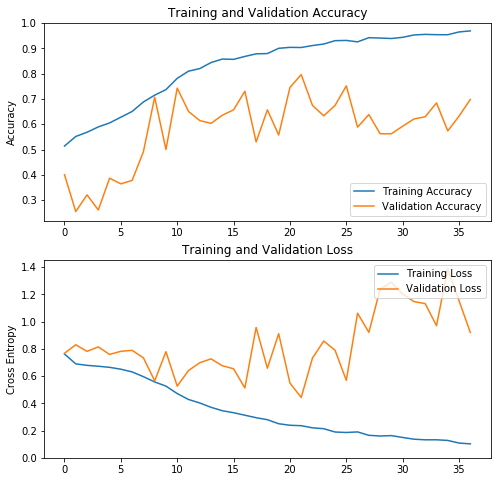

Training Acc:  [0.5137601993981115, 0.5515143135872937, 0.5682478218903896, 0.5892684276074959, 0.605033882062245, 0.6277140093004698, 0.6502558430222749, 0.6878716638021953, 0.7145623013267971, 0.7365509612302104, 0.7810814549543439, 0.8094316140165502, 0.8196653299040855, 0.8434518048038226, 0.8572811506592771, 0.8560365095308025, 0.867653160096204, 0.8778868760002251, 0.8789932237276809, 0.8997372424943766, 0.9034711658962863, 0.9029179920696516, 0.9106624257167235, 0.9166090444581437, 0.9298852164539917, 0.9308532706815134, 0.9251832388822608, 0.9416401604451409, 0.9402572258579469, 0.9384594109193235, 0.9431613884992973, 0.9524270502334973, 0.9547780390564559, 0.9535333978950096, 0.953395104452776, 0.9643202876503941, 0.968469091436705]



Evaluating model on test set...
Result on test set: 77.15%
Run 2...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 10s - loss: 0.2411 - acc: 0.8990 - val_loss: 1.2082 - val_acc: 0.5249

Epoch 00001: val_loss improved from inf to 1

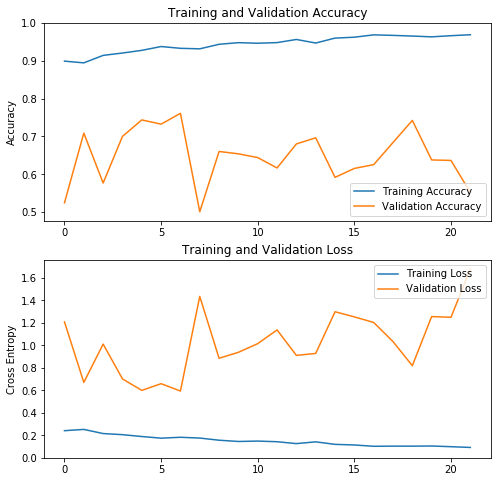

Training Acc:  [0.8990457752007796, 0.8944820910383104, 0.914258055635185, 0.9204812612775581, 0.9275342276475189, 0.9376296501340353, 0.9329276725705473, 0.9315447379833534, 0.9435762688672126, 0.9478633661122429, 0.9463421380498436, 0.9480016595462334, 0.9562992670611546, 0.9468953118599923, 0.9598948969796162, 0.9622458857860889, 0.9684690914119762, 0.9670861568495109, 0.9652883418696729, 0.9632139399806389, 0.9662563960724657, 0.9687456783541438]



Evaluating model on test set...
Result on test set: 80.09%
Run 3...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 10s - loss: 0.2395 - acc: 0.8992 - val_loss: 1.3548 - val_acc: 0.5323

Epoch 00001: val_loss improved from inf to 1.35476, saving model to checkpoints/GRAZ_pCNN__run_3.h5
Epoch 2/100
 - 10s - loss: 0.1825 - acc: 0.9304 - val_loss: 1.5702 - val_acc: 0.4876

Epoch 00002: val_loss did not improve from 1.35476
Epoch 3/100
 - 10s - loss: 0.1908 - acc: 0.9234 - val_loss: 0.9710 - val_acc: 0.6356

Epoch 00003: val_l

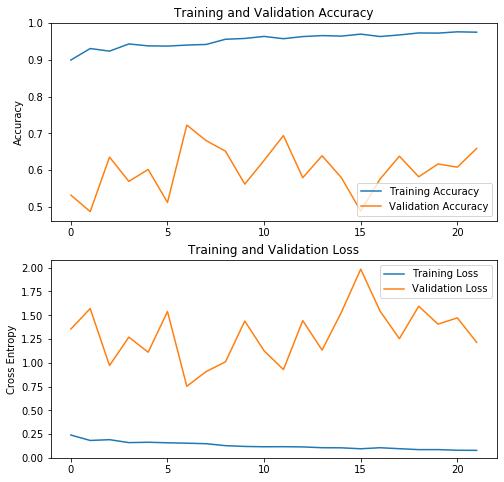

Training Acc:  [0.8991840686017984, 0.9304383903053551, 0.9233854239024227, 0.9428848015736155, 0.9376296501999788, 0.9370764762991577, 0.9398423454817887, 0.9415018670029074, 0.9556077997840435, 0.9578204951070681, 0.96335223347233, 0.9571290278464428, 0.962937353071443, 0.9655649287871116, 0.9641819942081606, 0.9695754390982173, 0.9630756465796201, 0.9673627437504639, 0.9727561886487636, 0.9723413082561195, 0.9757986447570762, 0.9748305905213117]



Evaluating model on test set...
Result on test set: 83.37%
Run 4...
Train on 7231 samples, validate on 804 samples
Epoch 1/100
 - 10s - loss: 0.1637 - acc: 0.9332 - val_loss: 1.0460 - val_acc: 0.6555

Epoch 00001: val_loss improved from inf to 1.04600, saving model to checkpoints/GRAZ_pCNN__run_4.h5
Epoch 2/100
 - 10s - loss: 0.1653 - acc: 0.9311 - val_loss: 1.7777 - val_acc: 0.4863

Epoch 00002: val_loss did not improve from 1.04600
Epoch 3/100
 - 10s - loss: 0.1330 - acc: 0.9520 - val_loss: 1.4402 - val_acc: 0.5585

Epoch 00003: val_los

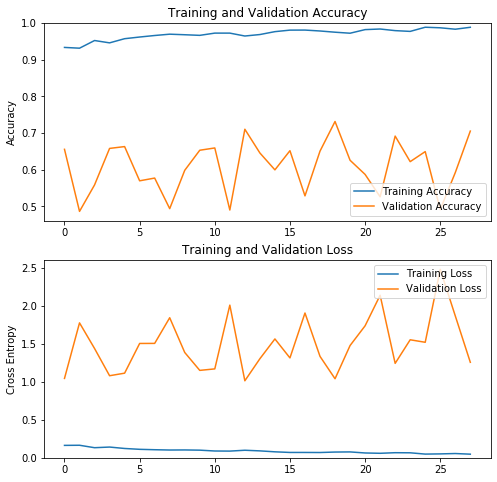

Training Acc:  [0.9332042594632574, 0.9311298575824664, 0.9520121698820678, 0.9456506707397606, 0.9569907343465087, 0.9615544184760061, 0.965703222245831, 0.9692988522055073, 0.9677776241266222, 0.9661181026219893, 0.972203014805643, 0.9722030148303719, 0.9643202876586371, 0.9683307980109573, 0.9762135251249916, 0.9803623288700878, 0.9805006223370502, 0.978011340063615, 0.9746922970543493, 0.9719264278964471, 0.9817452634490389, 0.9834047849619146, 0.9789793942993796, 0.9769049924185885, 0.9882450560088508, 0.9867238279711803, 0.982851611118794, 0.9881067625501314]



Evaluating model on test set...
Result on test set: 85.56%
Run 5...
Train on 7232 samples, validate on 804 samples
Epoch 1/100
 - 10s - loss: 0.0990 - acc: 0.9658 - val_loss: 1.4356 - val_acc: 0.6057

Epoch 00001: val_loss improved from inf to 1.43556, saving model to checkpoints/GRAZ_pCNN__run_5.h5
Epoch 2/100
 - 10s - loss: 0.1009 - acc: 0.9647 - val_loss: 1.4484 - val_acc: 0.6095

Epoch 00002: val_loss did not improve 

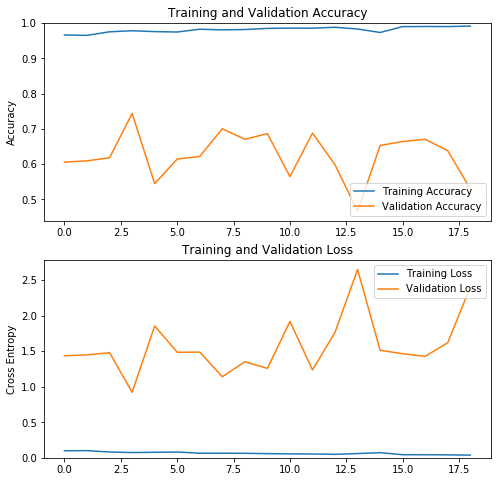

Training Acc:  [0.9658462389380531, 0.9647400442477876, 0.9748340707964602, 0.9778761061946902, 0.9753871681415929, 0.9742809734513275, 0.9821626106194691, 0.9803650442477876, 0.9813329646017699, 0.9845132743362832, 0.9853429203539823, 0.985066371681416, 0.9876935840707964, 0.9827157079646017, 0.9728982300884956, 0.9894911504424779, 0.9899059734513275, 0.989629424778761, 0.9910121681415929]



Evaluating model on test set...
Result on test set: 84.31%
82.10% (+/- 3.07%)
Saving CV values to file....
CV values successfully saved!



In [0]:
from sklearn.model_selection import StratifiedKFold
from models import LSTM
import datetime
from keras.callbacks import ModelCheckpoint,TensorBoard,EarlyStopping


# define KFOLD-fold cross validation test harness
kfold = StratifiedKFold(n_splits = KFOLD, shuffle = True, random_state = SEED)
cvscores_3 = []
history_3 = []
ii = 1
for train, test in kfold.split(x_subject, y_subject[:, 0]):
    print('Run ' + str(ii) + '...')
    # create callbacks
    model_name_str = 'GRAZ_pCNN_' + \
                     '_run_' + str(ii)

    # initialize and create the model
    
    # fit model. If you specify monitor=True, then the model will create callbacks
    # and write its state to a HDF5 file
    train_data =  [x_subject[train], y_subject[train]]
    monitor_index = 'val_loss'
    h = run_model(model, model_name_str,100, train_data, 0.1, 256, monitor_index)
    save_model(model, model_name_str, '')
    draw_graphs(h)
    history_3.append(h)

    history_3.append(h)
    print ('Training Acc: ', h.history['acc'])
    print ('\n\n')
    # evaluate the model
    print('Evaluating model on test set...')
    scores = model.evaluate(x_subject[test], y_subject[test], verbose = 0)
    print("Result on test set: %.2f%%" % ( scores[1] * 100))
    cvscores_3.append(scores[1] * 100)
    ii += 1
    
try:
  # print some evaluation statistics and write results to file
  print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_3), np.std(cvscores_3)))
  cv_all_subjects = np.asarray(cvscores_3)
  print('Saving CV values to file....')
  np.savetxt('GRAZ_CV_' + 'LSTM_' + str(DROPOUT) + 'do'+'.csv', 
              cv_all_subjects, delimiter = ',', fmt = '%2.4f')
  print('CV values successfully saved!\n')
except:
  print ('could not save')

In [0]:
pcnn_train_acc_3 = [0.9910121681415929, 0.9881067625501314, 0.9748305905213117, 0.9687456783541438, 0.968469091436705]

In [0]:
cap_df.loc['pCNN_3', 'CV Test Acc'] = np.mean(cvscores_3)
cap_df.loc['pCNN_3', 'Capacity (bits)'] = 3413
cap_df.loc['pCNN_3', 'CV Train Acc'] = np.mean(pcnn_train_acc_3)*100


In [0]:
cap_df.loc['pCNN_4', 'CV Test Acc'] = 77.4297
cap_df.loc['pCNN_4', 'Capacity (bits)'] = 3304
cap_df.loc['pCNN_4', 'CV Train Acc'] = 94.886


In [0]:
cap_df = cap_df.sort_values('Capacity (bits)', ascending = False)

## Graphs

In [49]:
cap_df = pd.DataFrame(columns=['Capacity (bits)', 'CV Train Acc', 'CV Test Acc'])
cap_df = cap_df.set_index('Capacity (bits)')
cap_df

Empty DataFrame
Columns: [CV Train Acc, CV Test Acc]
Index: []

In [50]:
cap_df.loc['53192*', 'CV Train Acc'] = 100
cap_df.loc['53192*', 'CV Test Acc'] = 68.252

cap_df.loc['36450', 'CV Train Acc'] = 100
cap_df.loc['36450', 'CV Test Acc'] = 91.926

cap_df.loc['18418', 'CV Train Acc'] = 100
cap_df.loc['18418', 'CV Test Acc'] = 90.552

cap_df.loc['9346', 'CV Train Acc'] = 100
cap_df.loc['9346', 'CV Test Acc'] =  90.442

cap_df.loc['3670', 'CV Train Acc'] = 96.510
cap_df.loc['3670', 'CV Test Acc'] = 79.640

cap_df

CV Train Acc CV Test Acc
Capacity (bits)                         
53192*                   100      68.252
36450                    100      91.926
18418                    100      90.552
9346                     100      90.442
3670                   96.51       79.64

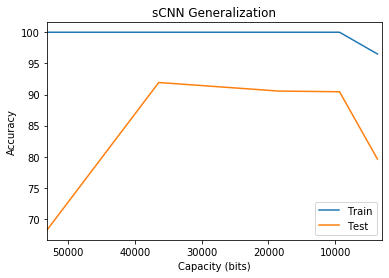

In [51]:
plt.plot([53192, 36450,18418, 9346, 3670], cap_df['CV Train Acc'], label = 'Train')
plt.plot([53192, 36450,18418, 9346, 3670], cap_df['CV Test Acc'], label = 'Test')
plt.xlim(53192, 3000)
plt.xlabel('Capacity (bits)')
plt.ylabel('Accuracy')
plt.title('sCNN Generalization')
plt.legend()

In [0]:
np.savetxt("B01_x_0channel.csv", x_augmented[:, :, 0], delimiter=",")


In [0]:
from google.colab import files
files.download('B01_x_0channel.csv')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 36530, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

In [0]:
from sklearn.model_selection import StratifiedKFold
import datetime
from keras.callbacks import ModelCheckpoint,TensorBoard,EarlyStopping


# define KFOLD-fold cross validation test harness
kfold = StratifiedKFold(n_splits = KFOLD, shuffle = True, random_state = SEED)
cvscores = []

In [0]:
kfold.split(x_subject, y_subject[:, 0])